<a href="https://colab.research.google.com/github/peterp-58/peterp-58/blob/main/CIND820_PP_BankrupcyV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Pythons Programs

In [544]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer

#Uploading and setting up the Polish Dataset

uploading and renaming the columns for further review of the polish dataset.

In [545]:
#pulling data from the website.
polishData=pd.read_csv("https://archive.ics.uci.edu/static/public/365/data.csv")
#adding the data into a dataframe
polish_Dataset = pd.DataFrame(polishData)

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Set display width to avoid wrapping of wide DataFrames
pd.set_option('display.width', None)

# Set option to display full content of each column
pd.set_option('display.max_colwidth', None)
polish_Dataset.head(10)

year    A1    A2    A3     A4      A5    A6    A7     A8    A9   A10   A11    A12   A13   A14  \
0     1 0.201 0.380 0.396  2.047  32.351 0.388 0.250  1.331 1.139 0.505 0.250  0.660 0.167 0.250   
1     1 0.209 0.500 0.472  1.945  14.786 0.000 0.258  0.996 1.700 0.498 0.261  0.517 0.158 0.258   
2     1 0.249 0.696 0.267  1.555  -1.152 0.000 0.309  0.437 1.309 0.304 0.313  0.642 0.244 0.309   
3     1 0.081 0.307 0.459  2.493  51.952 0.150 0.093  1.866 1.057 0.574 0.093  0.302 0.094 0.093   
4     1 0.187 0.613 0.230  1.406  -7.313 0.187 0.187  0.631 1.156 0.387 0.187  0.331 0.122 0.187   
5     1 0.228 0.498 0.360  1.750 -47.717 0.000 0.281  1.008 1.979 0.502 0.286  0.587 0.148 0.281   
6     1 0.111 0.647 0.290  1.470   2.535 0.000 0.111  0.545 1.735 0.353 0.126  0.180 0.310 0.111   
7     1 0.532 0.027 0.706 53.954 299.580 0.000 0.652 35.957 0.653 0.973 0.694 48.966 1.060 0.652   
8     1 0.009 0.632 0.054  1.126 -37.842 0.000 0.014  0.582 1.333 0.368 0.043  0.034 0.039 0.014   
9     1 0.124 0.838 0.142  1.169 -91.883 0.000 0.153  0.193 2.116 0.162 0.185  0.183 0.075 0.153   

       A15    A16    A17   A18   A19     A20   A21   A22   A23   A24   A25    A26    A27    A28  \
0  497.420  0.734  2.635 0.250 0.149  43.370 1.248 0.214 0.120 0.477 0.505  0.604  1.458  1.762   
1  677.960  0.538  2.001 0.258 0.152  87.981 1.429 0.248 0.123   NaN 0.395  0.440 88.444 16.946   
2  794.160  0.460  1.437 0.309 0.236  73.133 1.428 0.303 0.190   NaN 0.289  0.373 86.011  1.063   
3  917.010  0.398  3.254 0.093 0.071  79.788 1.507 0.116 0.063 0.172 0.574  0.362  0.941  1.962   
4 1133.200  0.322  1.631 0.187 0.116  57.045   NaN 0.198 0.116 0.187 0.387  0.322  1.414  1.118   
5  620.140  0.589  2.008 0.281 0.142 107.260 1.728 0.281 0.115   NaN 0.500  0.482 55.511  2.236   
6  439.940  0.830  1.544 0.111 0.064  57.733 0.568 0.000 0.064   NaN 0.315  0.830  0.000  3.065   
7   14.272 25.575 36.957 0.652 0.999  39.978   NaN 0.671 0.816   NaN 0.970 21.137 16.158  2.510   
8 4443.700  0.082  1.582 0.014 0.011  36.623 1.075 0.031 0.007 0.000 0.348  0.074  1.071  0.103   
9 1918.100  0.190  1.193 0.153 0.072 109.970 1.587 0.158 0.059   NaN 0.154  0.155  5.059  7.229   

    A29    A30   A31     A32    A33    A34   A35   A36     A37   A38   A39    A40   A41   A42  \
0 5.944  0.118 0.149  94.140  3.877  0.564 0.214 1.741 593.270 0.506 0.128  0.663 0.051 0.128   
1 3.688  0.270 0.152 122.170  2.988  2.988 0.206 1.700     NaN 0.498 0.121  0.086 0.064 0.146   
2 4.375  0.419 0.238 176.930  2.063  1.427 0.316 1.309   2.302 0.515 0.241  0.322 0.074 0.231   
3 4.651  0.143 0.071  91.370  3.995  0.376 0.116 1.356     NaN 0.574 0.089  0.401 0.070 0.089   
4 4.142  0.279 0.116 147.040  2.482  0.323 0.198 1.628  11.247 0.435 0.122  0.293 0.097 0.122   
5 4.326  0.234 0.144 102.760  3.552  3.420 0.276 1.979  22.312 0.514 0.139  0.079 0.057 0.142   
6 3.677  0.361 0.142 328.730  1.110  1.056 0.025 1.735     NaN 0.353 0.014  0.057 0.051 0.000   
7 4.243 -0.676 1.000   8.158 44.742 22.031 0.057 0.653  50.430 0.986 0.087 47.991 0.001 1.028   
8 5.948  0.474 0.011 142.090  2.628  1.770 0.240 1.333   2.754 0.493 0.180  0.073 0.309 0.023   
9 3.843  0.388 0.077 157.150  2.323  2.322 0.169 2.116     NaN 0.162 0.080  0.021 0.170 0.075   

      A43     A44   A45    A46     A47    A48    A49    A50   A51   A52    A53    A54        A55  \
0 114.420  71.050 1.010  1.522  49.394  0.185  0.111  2.042 0.379 0.258  2.244  2.248 348690.000   
1 199.490 111.510 0.510  1.125 100.130  0.237  0.140  1.945 0.500 0.335 17.866 17.866   2304.600   
2 165.510  92.381 0.948  1.010  96.372  0.292  0.223  1.076 0.482 0.485  1.210  2.050   6332.700   
3 180.770 100.980 0.287  1.570  84.344  0.086  0.066  2.493 0.307 0.250  2.452  2.452  20545.000   
4 141.620  84.574 0.739  0.958  65.936  0.188  0.116  1.296 0.565 0.403  1.884  2.118   3186.600   
5 147.840  40.578 0.393  0.537 124.630  0.269  0.136  1.685 0.479 0.282  3.121  3.193   7616.800   
6 183.170 125.440 0.405  1.025 146.490 -0.42

In [546]:
#The orginal dataset did not have named columns. It provided an explantion to each attribute in their reserach paper. The code below is to add the proper names.
#replacing the column name with actual names.

new_Column_names={
    'A1':'net_profit/total assets',
    "A2":'Total_Liabilities/total_assets',
    "A3":'Working_Capital_to_Total_Assets_Ratio',
    "A4":'Current_Ratio',
    "A5":"Defensive_Interval_Ratio",
    "A6":'Retained_Earnings_to_Total_Assets_Ratio',
    "A7":"Operating_Income_to_Total_Asset_ratio",
    "A8":"book_value_of_equity/total_liabilities",
    "A9":'Asset_Turnover_Ratio',
    "A10":'Equity_to_Total_Assets_Ratio',
    "A11":'gross_profit+extraordinary_items+financial_expenses)/total',
    "A12":'gross_profit/short-term_liabilities',
    "A13":'(gross_profit+depreciation)/sales',
    "A14":'(gross_profit+interest)/total_assets',
    "A15":'(total_liabilities∗365)/(gross_profit+depreciation)',
    "A16":'(gross profit+depreciation)/total_liabilities',
    "A17":'total_assets/total_liabilities',
    "A18":'gross_profit/total_assets',
    "A19":'gross_profit/sales',
    "A20":'(inventory∗365)/sales',
    "A21":'sales(n)/sales(n-1)',
    "A22":'profit_on_operating_activities/total_assets',
    "A23":'net_profit/sales',
    "A24":'gross_profit(in3years)/total_assets',
    "A25":'(equity-share_capital)/total_assets',
    "A26":'(net_profit+depreciation)/total_liabilities',
    "A27":'profit_on_operating_activities/financial_expenses',
    "A28":'working_capital/fixed_assets',
    "A29":'logarithm_of_total_assets',
    "A30":'(total_liabilities-cash)/sales',
    "A31":'(gross_profit+interest)/sales',
    "A32":'(current_liabilities∗365)/cost_of_products_sold',
    "A33":'operating_expenses/short-term_liabilities',
    "A34":'operating_expenses_/_total_liabilities',
    "A35":'profit_on_sales/total_assets',
    "A36":'total_sales/total_assets',
    "A37":'(current_assets-inventories)/long-term_liabilities',
    "A38":'constant_capital/total_assets',
    "A39":'profit_on_sales/sales',
    "A40":'(current_assets-inventory-receivables)/short-term liabilities',
    "A41":'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    "A42":'profit_on_operating_activities/sales',
    "A43":'rotation_receivables+inventory_turnover_in_days',
    "A44":'(receivables∗365)/sales',
    "A45": 'net_profit/inventory',
    "A46":'(current_assets-inventory)/short-term_liabilities',
    "A47":'(inventory∗365)/cost_of_products_sold',
    "A48":'EBITDA_(profit_on_operating_activities-depreciation)/total_assets',
    "A49":'EBITDA_(profit_on_operating_activities-depreciation)/sales',
    "A50":'current_assets/total_liabilities',
    "A51":'short-term_liabilities/total_assets',
    "A52":'(short-term_liabilities∗365)/cost_of_products_sold)',
    "A53":'equity/fixed_assets',
    "A54":'constant_capital/fixed_assets',
    "A55":'working_capital',
    "A56":'(sales-cost_of_products_sold)/sales',
    "A57":'(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)',
    "A58":'total_costs/total_sales',
    "A59":'long-term_liabilities/equity',
    "A60":'sales/inventory',
    "A61":'sales/receivables',
    "A62":'(short-term_liabilities∗365)/sales',
    "A63":'sales/short-term liabilities',
    "A64":'sales/fixed assets',
                          }





In [547]:
polish_Dataset =polish_Dataset.rename(columns=new_Column_names)


In [548]:
#based on the intial review of all the attributes type, it was noted that the class ratio was listed as int.
#making the class into a categorial data type from int
polish_Dataset['class']=polish_Dataset['class'].astype('category')

In [549]:
#snapshot of the features after change in data type 'class'
polish_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column                                                                               Non-Null Count  Dtype   
---  ------                                                                               --------------  -----   
 0   year                                                                                 43405 non-null  int64   
 1   net_profit/total assets                                                              43397 non-null  float64 
 2   Total_Liabilities/total_assets                                                       43397 non-null  float64 
 3   Working_Capital_to_Total_Assets_Ratio                                                43397 non-null  float64 
 4   Current_Ratio                                                                        43271 non-null  float64 
 5   Defensive_Interval_Ratio                                                         

#Variable Additions
This research paper was to introduce financial ratios that can help identify financial stress. This analysis was done by reviewing all attributes and seeing what can be added.

The following additions are based on using exisitng variables to create these additions. This is based on existing and industry knowledge.

In [550]:
#The introduction of this variable is to get an understanding of how much of interest paid is to sales.
#A high proportion of interest to sales will indicate that a good portion of their sales earned will go towards paying the interest and other cost may not be covered.
#Variable 1
Interest_to_Sales = (polish_Dataset['(gross_profit+interest)/sales']-polish_Dataset['gross_profit/sales'])
Interest_to_Sales.replace([np.inf, -np.inf], np.NaN, inplace=True )
Interest_to_Sales
polish_Dataset['Interest_to_Sales'] = Interest_to_Sales


In [551]:
#To gain an understanding on liquidity compared to all assets. Cash is the most liquid asset and can be
#used to cover debt/interest in the short term.
#variable 2
Cash_to_assets  = (polish_Dataset['Total_Liabilities/total_assets']-(polish_Dataset['(total_liabilities-cash)/sales'] * polish_Dataset['total_sales/total_assets'] ))
Cash_to_assets.replace([np.inf, -np.inf], np.NaN, inplace=True )
Cash_to_assets
polish_Dataset['Cash_to_assets'] = Cash_to_assets


In [552]:
#This is to gain an understanding on how much cash can cover total liabilities. Too high can tell us that the company may have a hard time covering their liabilities.
#variable 3
Total_liabilities_to_Cash = (polish_Dataset['Total_Liabilities/total_assets']/ polish_Dataset['Cash_to_assets'] )
Total_liabilities_to_Cash.replace([np.inf, -np.inf], np.NaN, inplace=True )
Total_liabilities_to_Cash
polish_Dataset['Total_liabilities_to_Cash'] = Total_liabilities_to_Cash

In [553]:
#Tells us how much interest can be covered by cash. A high number gives comfort that the company can cover their interest obligations
#variable 4
cash_to_interest = (polish_Dataset['Cash_to_assets']/ polish_Dataset['total_sales/total_assets'] * (1/polish_Dataset['Interest_to_Sales']))
cash_to_interest.replace([np.inf, -np.inf], np.NaN, inplace=True )
cash_to_interest
polish_Dataset['cash_to_interest'] = cash_to_interest

In [554]:
#After initial analysis, I realized that not all companies have debt/paid interest during their fiscal year.
#This is ratio is taking the inverse.
#variable 5
Interest_to_cash = 1 /(polish_Dataset['cash_to_interest'])
Interest_to_cash.replace([np.inf, -np.inf], np.NaN, inplace=True )
Interest_to_cash
polish_Dataset['Interest_to_cash'] = Interest_to_cash

In [555]:
#This ratio to review how much financial expense is covered by total assets. a high number indicates to me that the company has taken on too much debt and may find trouble as assets
#may not be enough relative to debt. this ratio can be used with asset turnover to provide more direction.
#variable 6
Financial_Expense_To_Total_Asset = (polish_Dataset['profit_on_operating_activities/total_assets'] / polish_Dataset['profit_on_operating_activities/financial_expenses'])
Financial_Expense_To_Total_Asset.replace([np.inf, -np.inf], np.NaN, inplace=True )
Financial_Expense_To_Total_Asset
polish_Dataset['Financial_Expense_To_Total_Asset'] = Financial_Expense_To_Total_Asset

In [556]:
#variable 6
Financial_expense_to_operating = (polish_Dataset['profit_on_operating_activities/total_assets'] / (polish_Dataset["Operating_Income_to_Total_Asset_ratio"]*polish_Dataset['profit_on_operating_activities/financial_expenses']))
Financial_expense_to_operating.replace([np.inf, -np.inf], np.NaN, inplace=True )
Financial_expense_to_operating
polish_Dataset['Financial_expense_to_operating']=Financial_expense_to_operating

In [557]:
#this ratio gives me an idea on how much operating income can cover the interst for the fiscal period. a high ratio is a good indicator.
#variable 7
Debt_Coverage_Ratio = ((polish_Dataset["Operating_Income_to_Total_Asset_ratio"]*polish_Dataset['profit_on_operating_activities/financial_expenses']) / polish_Dataset['profit_on_operating_activities/total_assets'])
Debt_Coverage_Ratio.replace([np.inf, -np.inf], np.NaN, inplace=True )
Debt_Coverage_Ratio
polish_Dataset['Debt_Coverage_Ratio'] = Debt_Coverage_Ratio

In [558]:
#operating income can be viewed as cash flow from operating. it it not however, but in its place it can give the reader an idea.
#THis give us the percentage that is avaiable to firm after all expenses are paid from sales for the fiscal
#variable 8
Operating_income_Margin = (polish_Dataset['Operating_Income_to_Total_Asset_ratio'] / polish_Dataset['total_sales/total_assets'])
Operating_income_Margin.replace([np.inf, -np.inf], np.NaN, inplace=True )
Operating_income_Margin
polish_Dataset['Operating_income_Margin'] = Operating_income_Margin

In [559]:
#this ratio tells us how many days  cash is recieved from the momement it is used to pay for inventory and accounts payble, as well as cash recieved from buyers. The lower the number the better
#Variable 9 Cash Conversion Cycle Formula = DIO + DSO – DPO.
Cash_conversion_cycle = ((polish_Dataset['(inventory∗365)/cost_of_products_sold']) + (polish_Dataset['(receivables∗365)/sales']) - (polish_Dataset['(short-term_liabilities∗365)/cost_of_products_sold)']))
Cash_conversion_cycle.replace([np.inf, -np.inf], np.NaN, inplace=True )
Cash_conversion_cycle
polish_Dataset['Cash_conversion_cycle'] = Cash_conversion_cycle

In [560]:
#This ratio is used to determine how much cash can be used to cover financial expense. since cash is the most liquid asset, a high number indicates
#the ability to cover financial expenses
#variable 10
Cash_to_Financial_expense = (polish_Dataset['Cash_to_assets'] / polish_Dataset['Financial_Expense_To_Total_Asset'])
Cash_to_Financial_expense.replace([np.inf, -np.inf], np.NaN, inplace=True )
polish_Dataset['Cash_to_Financial_Expense']= Cash_to_Financial_expense

In [561]:
#Used as part of the dupont formula (i.e Return on equity), gives us indication how much leverage is used.

#variable 11
Equity_multipler= 1/ polish_Dataset['Equity_to_Total_Assets_Ratio']
Equity_multipler.replace([np.inf, -np.inf], np.NaN, inplace=True )
polish_Dataset['Financial_Leverage'] = Equity_multipler

In [562]:
#not addition but transforming an existing attribute to 1,0. if working capital is postive, it will be given a 1, if negative it will given a 0.
#making working capital into a indicator. 1 = postive values, 0 = negative
polish_Dataset['working_capital_indicator'] =np.where(polish_Dataset['working_capital']<=0,0,1)
polish_Dataset['working_capital_indicator']=polish_Dataset['working_capital_indicator'].astype('category')

In [563]:
#final ratio is return on equity. this is to gauge on management perfromance on how much they retun to shareholders.
#since this ratio is the result of the dupoint formula, it helps us determine what goes into the results for shareholders. such as
#asset turnover and financial leverage. a high financial leverage tell us that the results are coming from debt.
#Variable12
Return_On_equity =polish_Dataset['net_profit/sales'] * polish_Dataset['total_sales/total_assets'] *polish_Dataset['Financial_Leverage']
Return_On_equity.replace([np.inf, -np.inf], np.NaN, inplace=True )
polish_Dataset['Return_On_equity'] = Return_On_equity

In [564]:
#Review of all financial ratios in the polish dataset
polish_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 80 columns):
 #   Column                                                                               Non-Null Count  Dtype   
---  ------                                                                               --------------  -----   
 0   year                                                                                 43405 non-null  int64   
 1   net_profit/total assets                                                              43397 non-null  float64 
 2   Total_Liabilities/total_assets                                                       43397 non-null  float64 
 3   Working_Capital_to_Total_Assets_Ratio                                                43397 non-null  float64 
 4   Current_Ratio                                                                        43271 non-null  float64 
 5   Defensive_Interval_Ratio                                                         

In [565]:
polish_Dataset.head()

year  net_profit/total assets  Total_Liabilities/total_assets  \
0     1                    0.201                           0.380   
1     1                    0.209                           0.500   
2     1                    0.249                           0.696   
3     1                    0.081                           0.307   
4     1                    0.187                           0.613   

   Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
0                                  0.396          2.047                    32.351   
1                                  0.472          1.945                    14.786   
2                                  0.267          1.555                    -1.152   
3                                  0.459          2.493                    51.952   
4                                  0.230          1.406                    -7.313   

   Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
0                                    0.388                                  0.250   
1                                    0.000                                  0.258   
2                                    0.000                                  0.309   
3                                    0.150                                  0.093   
4                                    0.187                                  0.187   

   book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
0                                   1.331                 1.139                         0.505   
1                                   0.996                 1.700                         0.498   
2                                   0.437                 1.309                         0.304   
3                                   1.866                 1.057                         0.574   
4                                   0.631                 1.156                         0.387   

   gross_profit+extraordinary_items+financial_expenses)/total  \
0                                                       0.250   
1                                                       0.261   
2                                                       0.313   
3                                                       0.093   
4                                                       0.187   

   gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
0                                0.660                              0.167   
1                                0.517                              0.158   
2                                0.642                              0.244   
3                                0.302                              0.094   
4                                0.331                              0.122   

   (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
0                                 0.250                                              497.420   
1                                 0.258                                              677.960   
2                                 0.309                                              794.160   
3                                 0.093                                              917.010   
4                                 0.187                                             1133.200   

   (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
0                                          0.734                           2.635   
1                                          0.538                           2.001   
2                                          0.460                           1.437   
3                                          0.398                           3.254   
4                                          0.322                           1.631   

   gross_profit/total_assets  gross_profit/sales  (in

In [566]:
polish_Dataset.tail()

year  net_profit/total assets  Total_Liabilities/total_assets  \
43400     5                    0.013                           0.706   
43401     5                   -0.578                           0.967   
43402     5                   -0.179                           1.255   
43403     5                   -0.109                           0.744   
43404     5                   -0.105                           0.536   

       Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
43400                                  0.039          1.172                   -18.907   
43401                                 -0.801          0.166                   -67.365   
43402                                 -0.276          0.746                  -120.440   
43403                                  0.015          1.088                   -17.003   
43404                                 -0.046          0.915                   -56.068   

       Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
43400                                    0.000                                  0.014   
43401                                   -0.578                                 -0.578   
43402                                   -0.179                                 -0.155   
43403                                   -0.109                                 -0.109   
43404                                   -0.105                                 -0.110   

       book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
43400                                   0.416                 1.677                         0.294   
43401                                  -0.403                 0.940                        -0.390   
43402                                  -0.260                 1.175                        -0.327   
43403                                   0.125                 0.845                         0.093   
43404                                   0.865                 0.950                         0.464   

       gross_profit+extraordinary_items+financial_expenses)/total  \
43400                                                       0.042   
43401                                                      -0.578   
43402                                                      -0.155   
43403                                                      -0.109   
43404                                                      -0.110   

       gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
43400                                0.062                              0.024   
43401                               -0.602                             -0.110   
43402                               -0.143                             -0.073   
43403                               -0.620                             -0.066   
43404                               -0.206                             -0.067   

       (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
43400                                 0.014                                             6507.600   
43401                                -0.578                                             -742.280   
43402                                -0.155                                            -3298.200   
43403                                -0.109                                            -5352.100   
43404                                -0.110                                            -2055.900   

       (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
43400                                          0.056                           1.416   
43401                                         -0.492                           1.034   
43402                                         -0.111                           0.797   
43403                                     

In [567]:
#filename='alldata.csv'
#polish_Dataset.to_csv(filename,index=False)

In [568]:
#files.download('alldata.csv')

# Initial Description Analysis





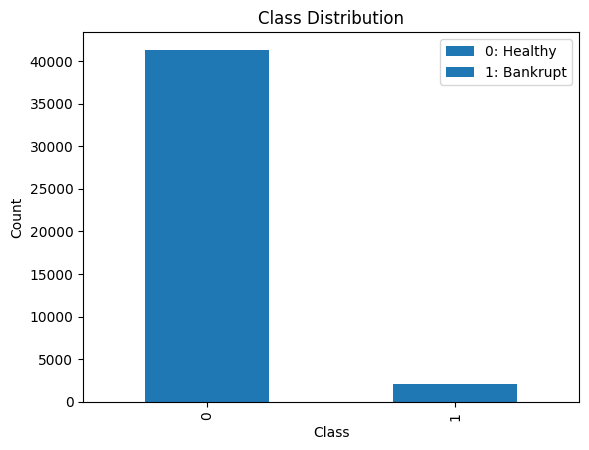

In [623]:
category_counts = polish_Dataset['class'].value_counts()
ax = category_counts.plot(kind='bar')
category_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(['0: Healthy', '1: Bankrupt'])
plt.show()

In [624]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20, 5))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

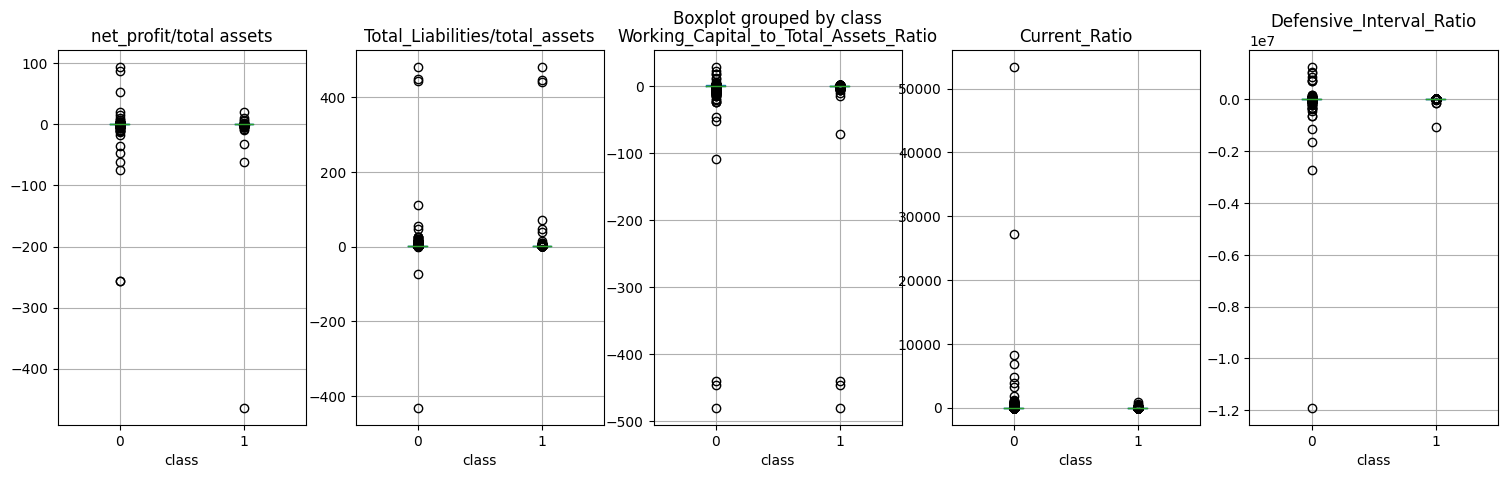

In [625]:
import matplotlib.pyplot as plt

continuous_cols = ['net_profit/total assets','Total_Liabilities/total_assets','Working_Capital_to_Total_Assets_Ratio','Current_Ratio','Defensive_Interval_Ratio']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

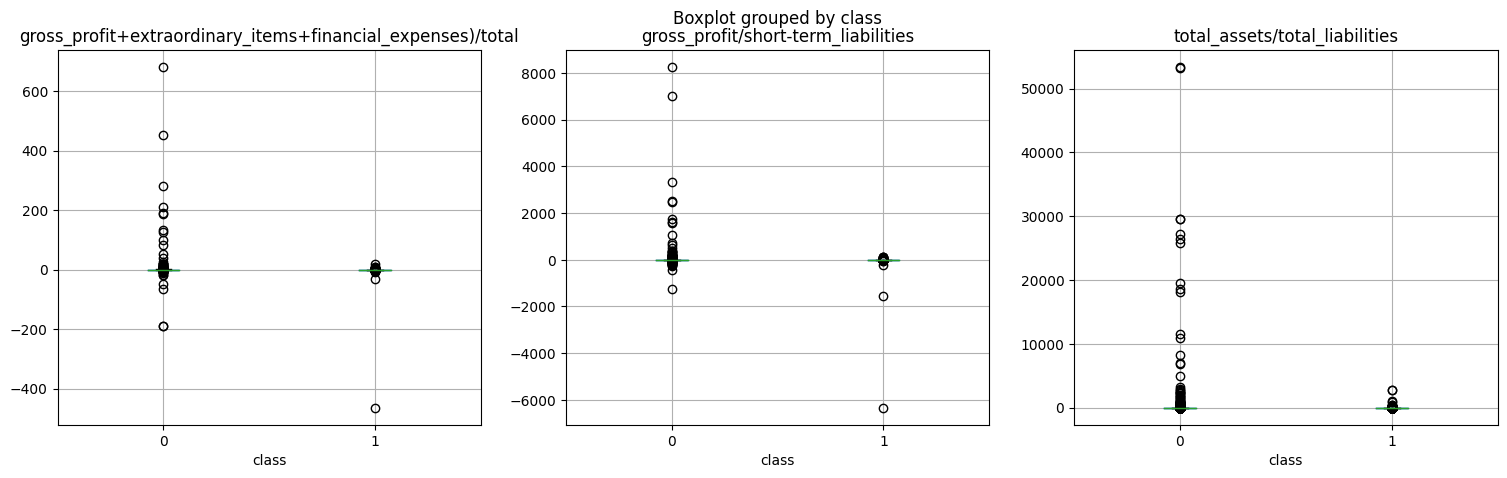

In [626]:
continuous_cols = ['gross_profit+extraordinary_items+financial_expenses)/total','gross_profit/short-term_liabilities','total_assets/total_liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

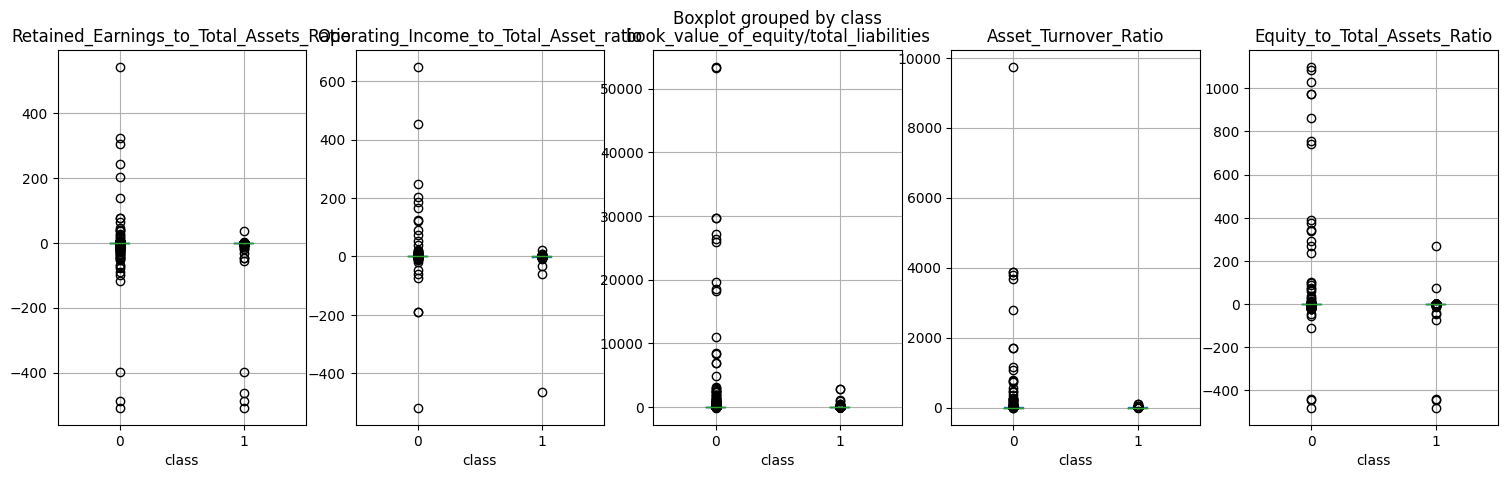

In [627]:
continuous_cols = ['Retained_Earnings_to_Total_Assets_Ratio','Operating_Income_to_Total_Asset_ratio','book_value_of_equity/total_liabilities','Asset_Turnover_Ratio','Equity_to_Total_Assets_Ratio']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

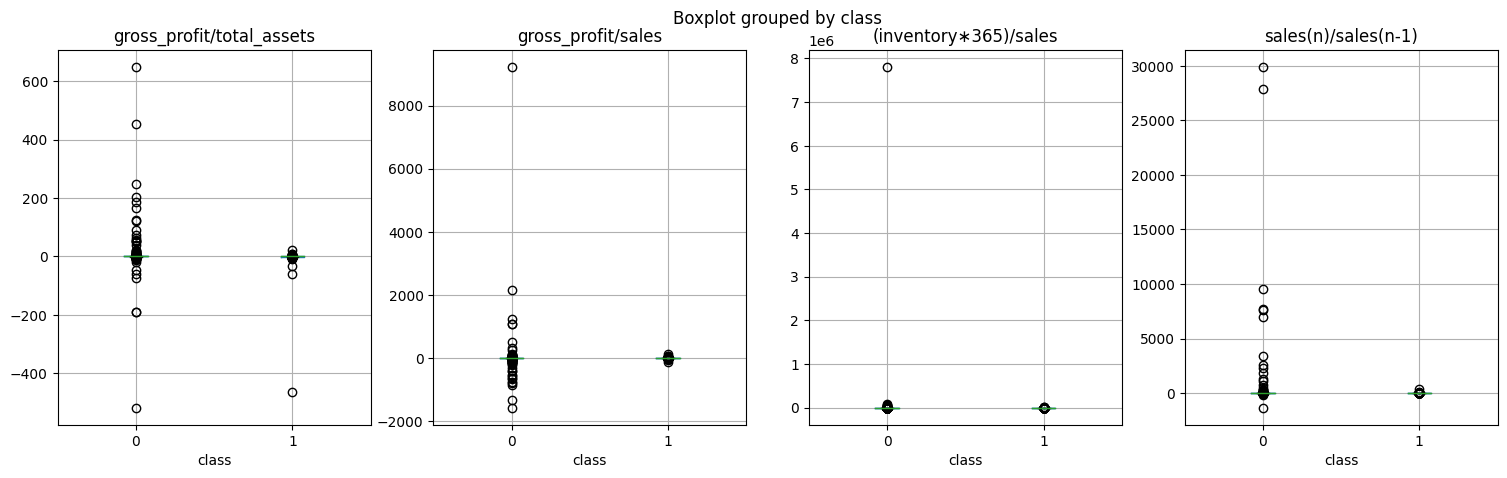

In [628]:
continuous_cols = ['gross_profit/total_assets','gross_profit/sales','(inventory∗365)/sales','sales(n)/sales(n-1)']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

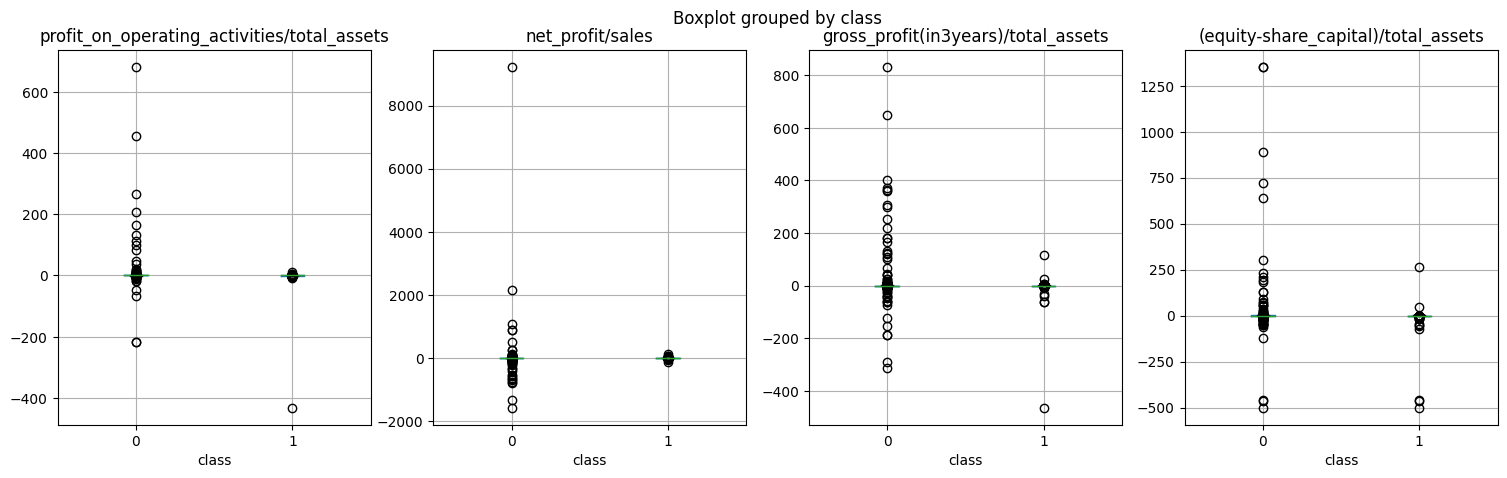

In [629]:
continuous_cols = ['profit_on_operating_activities/total_assets','net_profit/sales','gross_profit(in3years)/total_assets','(equity-share_capital)/total_assets']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

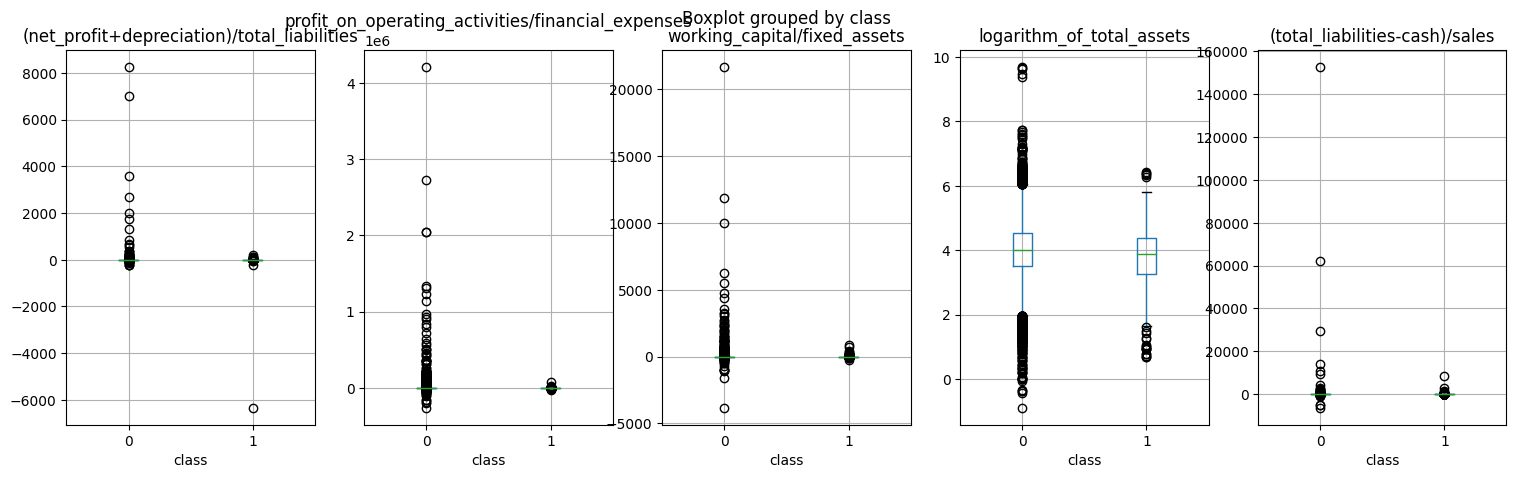

In [630]:
continuous_cols = ['(net_profit+depreciation)/total_liabilities','profit_on_operating_activities/financial_expenses','working_capital/fixed_assets','logarithm_of_total_assets','(total_liabilities-cash)/sales']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

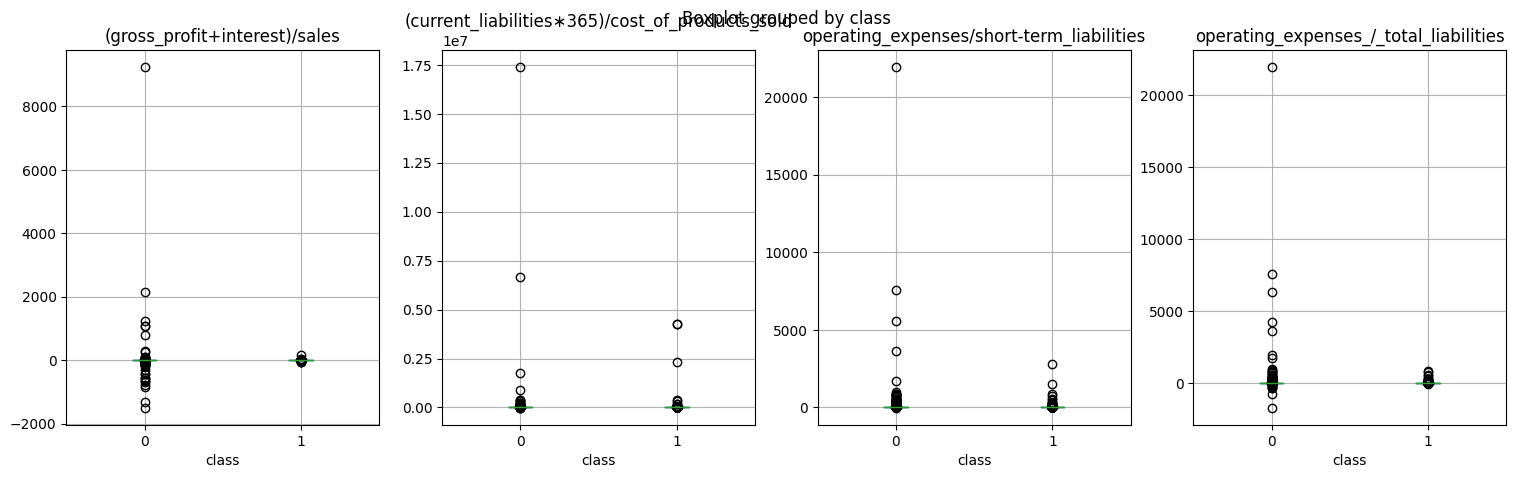

In [631]:
continuous_cols = ['(gross_profit+interest)/sales','(current_liabilities∗365)/cost_of_products_sold','operating_expenses/short-term_liabilities','operating_expenses_/_total_liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

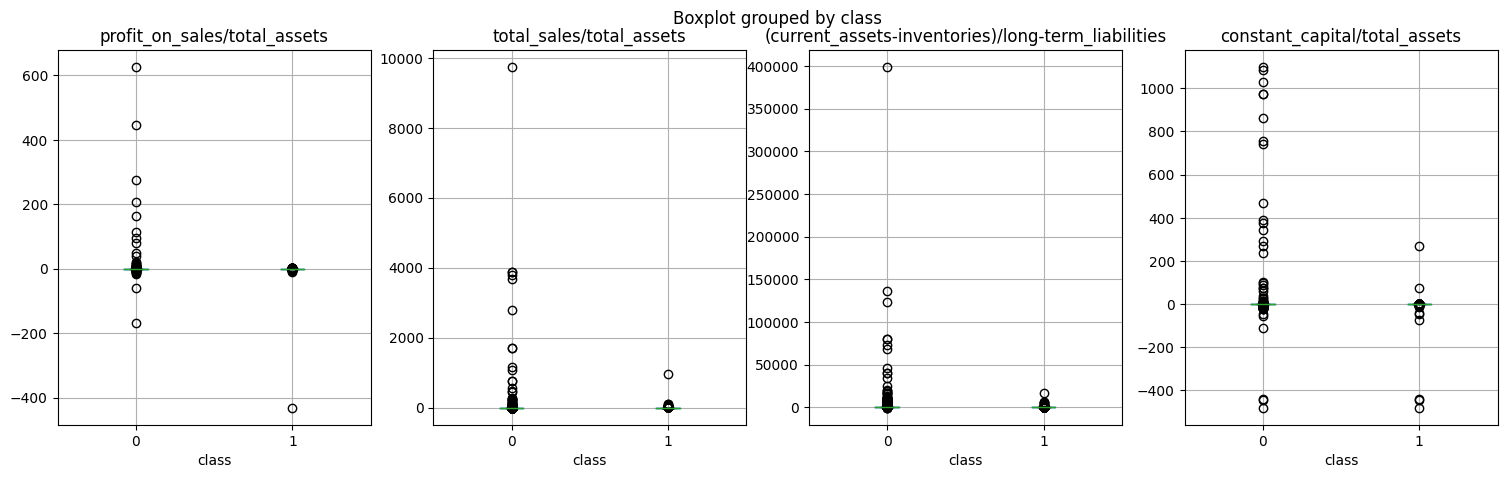

In [632]:
continuous_cols = ['profit_on_sales/total_assets','total_sales/total_assets','(current_assets-inventories)/long-term_liabilities','constant_capital/total_assets']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

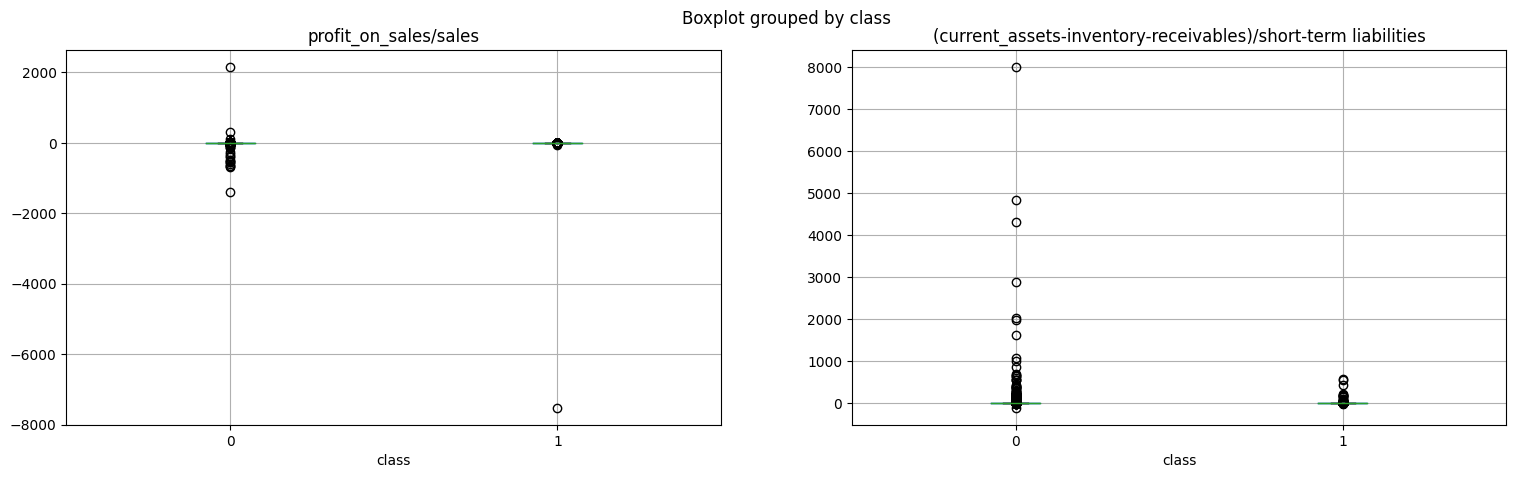

In [633]:
continuous_cols = ['profit_on_sales/sales','(current_assets-inventory-receivables)/short-term liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

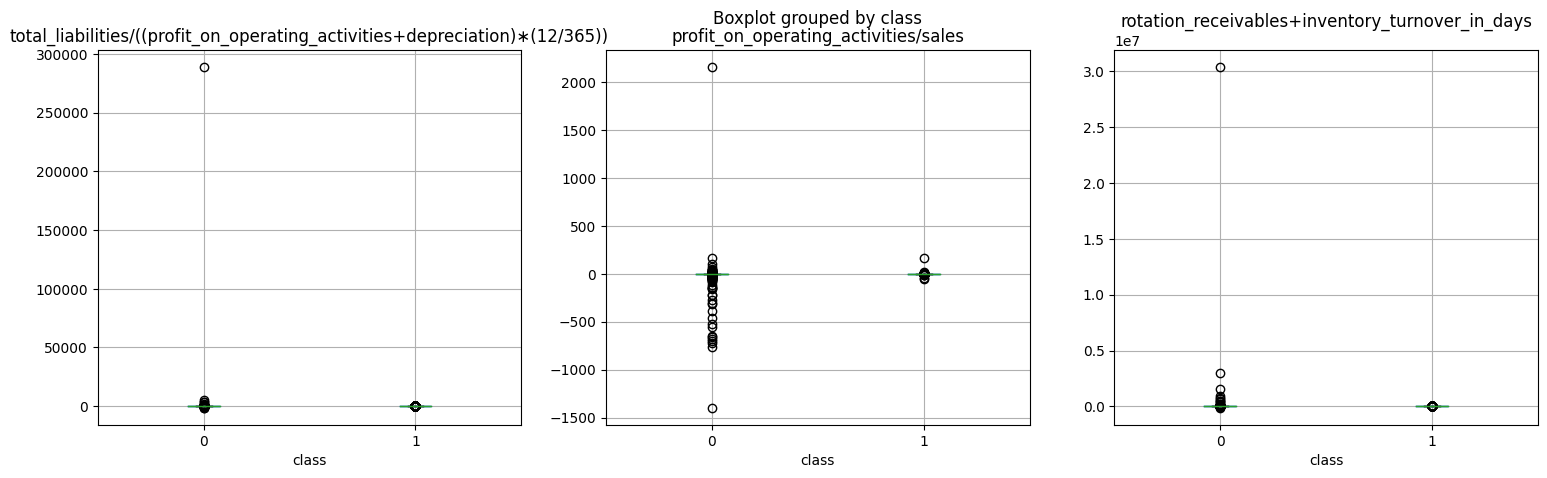

In [634]:
continuous_cols = ['total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))','profit_on_operating_activities/sales','rotation_receivables+inventory_turnover_in_days']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

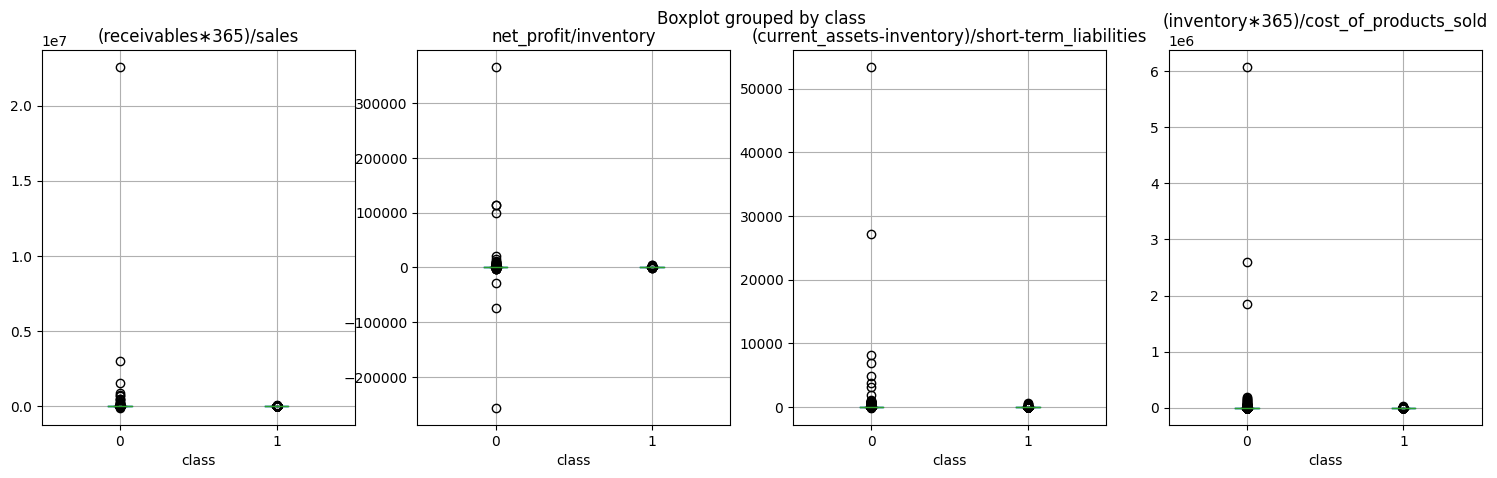

In [635]:
continuous_cols = ['(receivables∗365)/sales','net_profit/inventory','(current_assets-inventory)/short-term_liabilities','(inventory∗365)/cost_of_products_sold']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

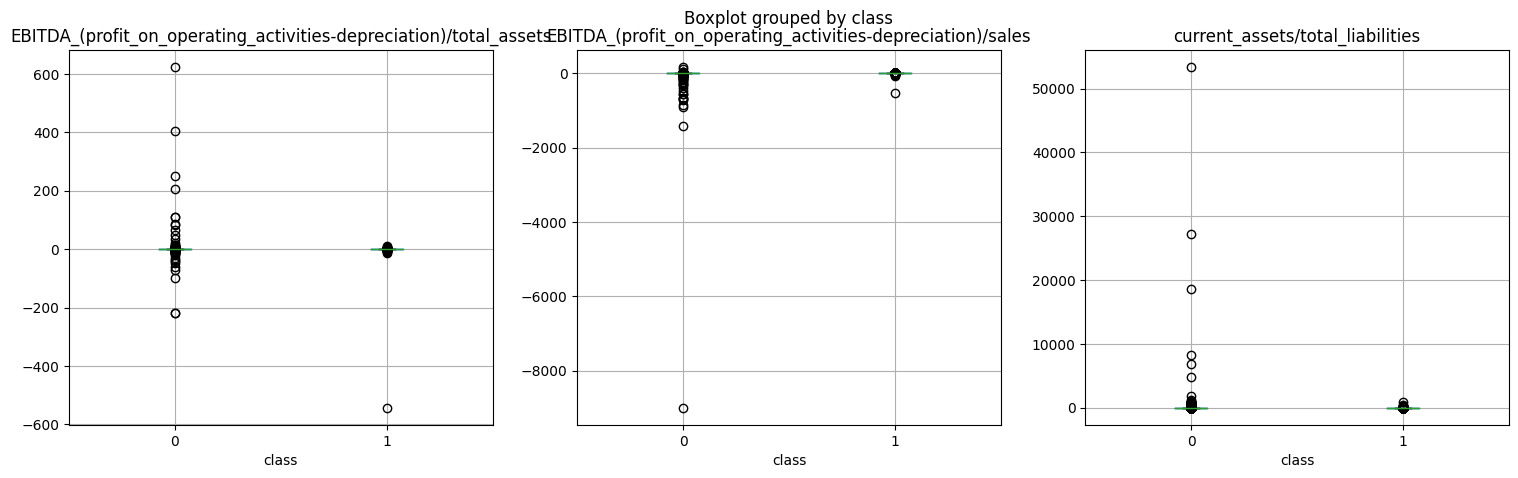

In [636]:
continuous_cols = ['EBITDA_(profit_on_operating_activities-depreciation)/total_assets','EBITDA_(profit_on_operating_activities-depreciation)/sales','current_assets/total_liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

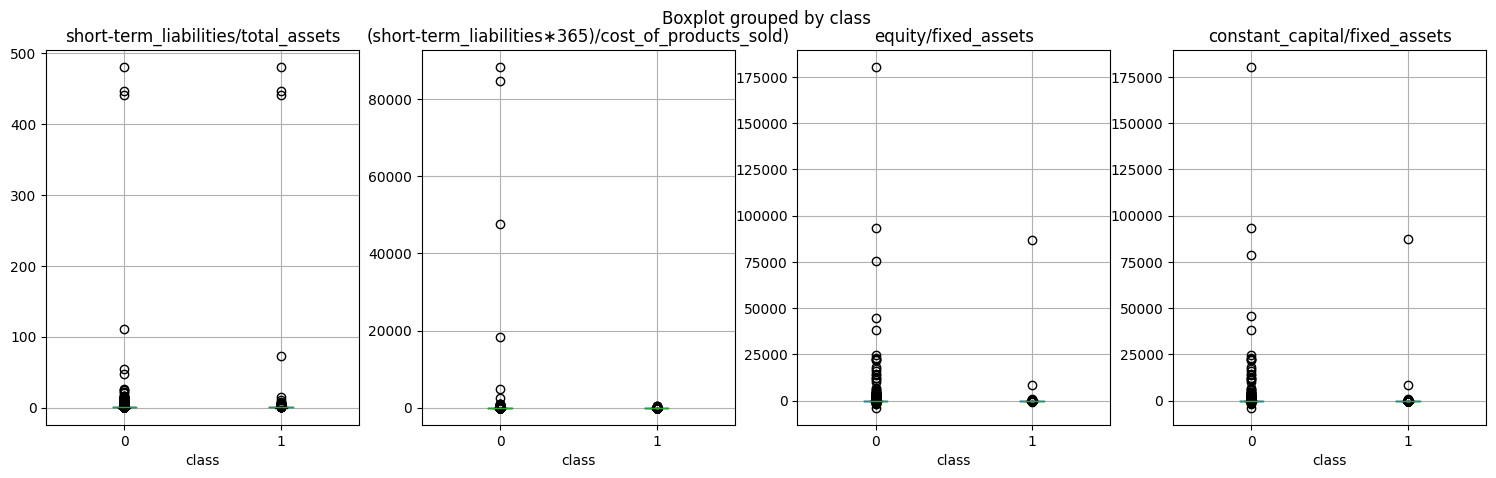

In [637]:
continuous_cols = ['short-term_liabilities/total_assets','(short-term_liabilities∗365)/cost_of_products_sold)','equity/fixed_assets','constant_capital/fixed_assets']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

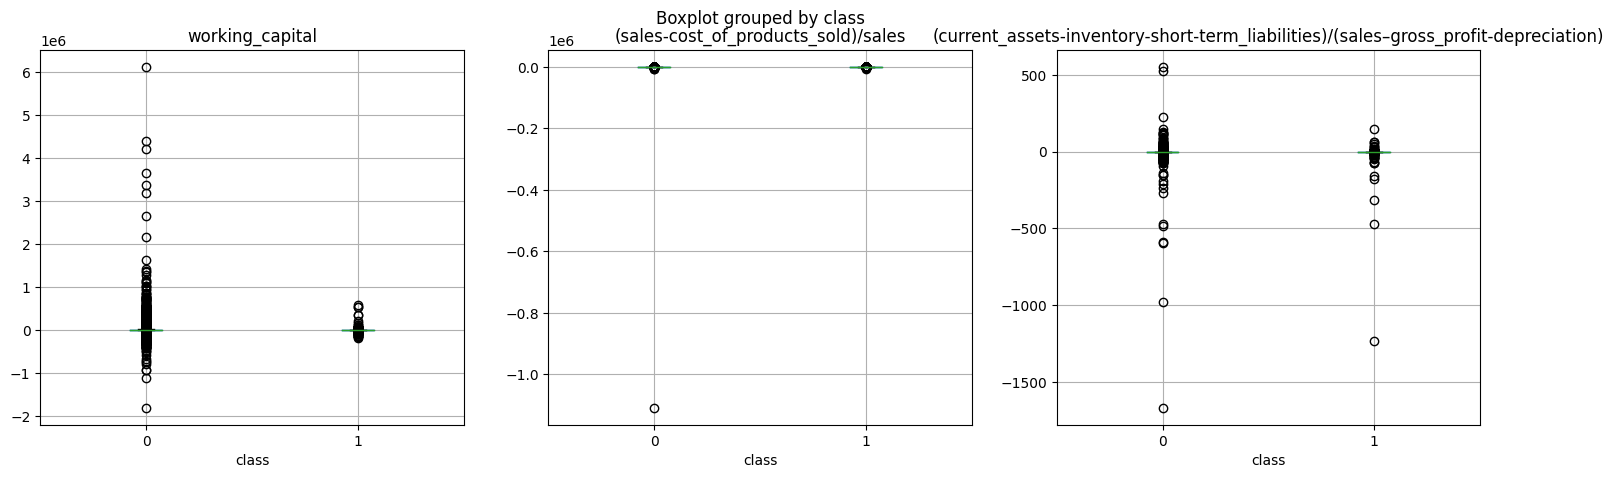

In [638]:
continuous_cols = ['working_capital','(sales-cost_of_products_sold)/sales','(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

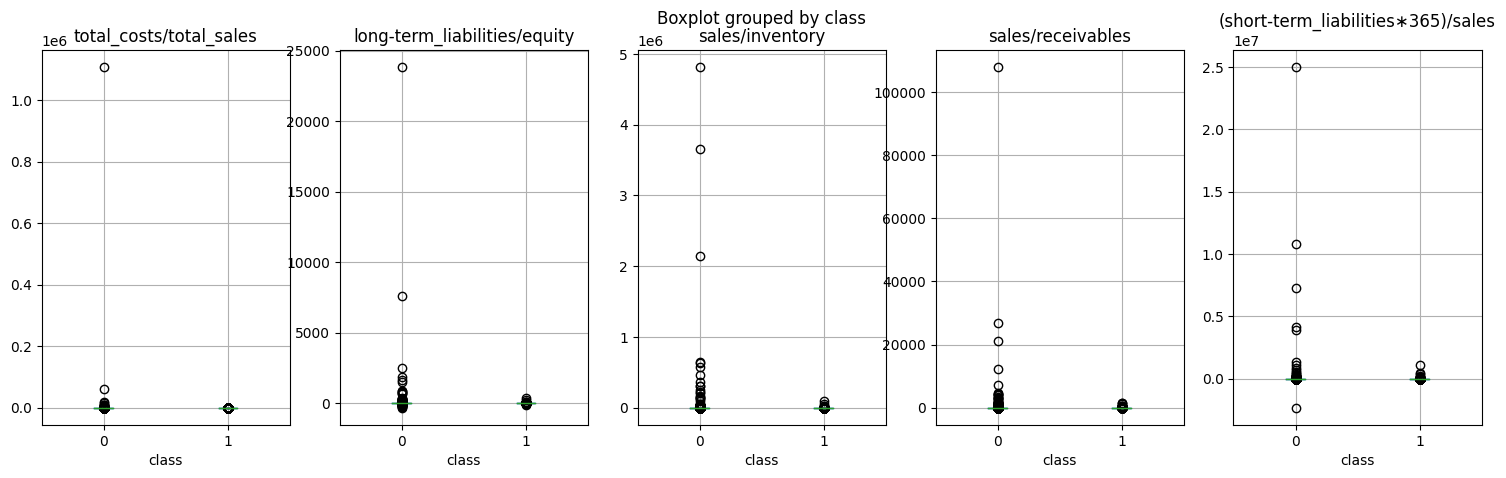

In [639]:
continuous_cols = ['total_costs/total_sales','long-term_liabilities/equity','sales/inventory','sales/receivables','(short-term_liabilities∗365)/sales']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

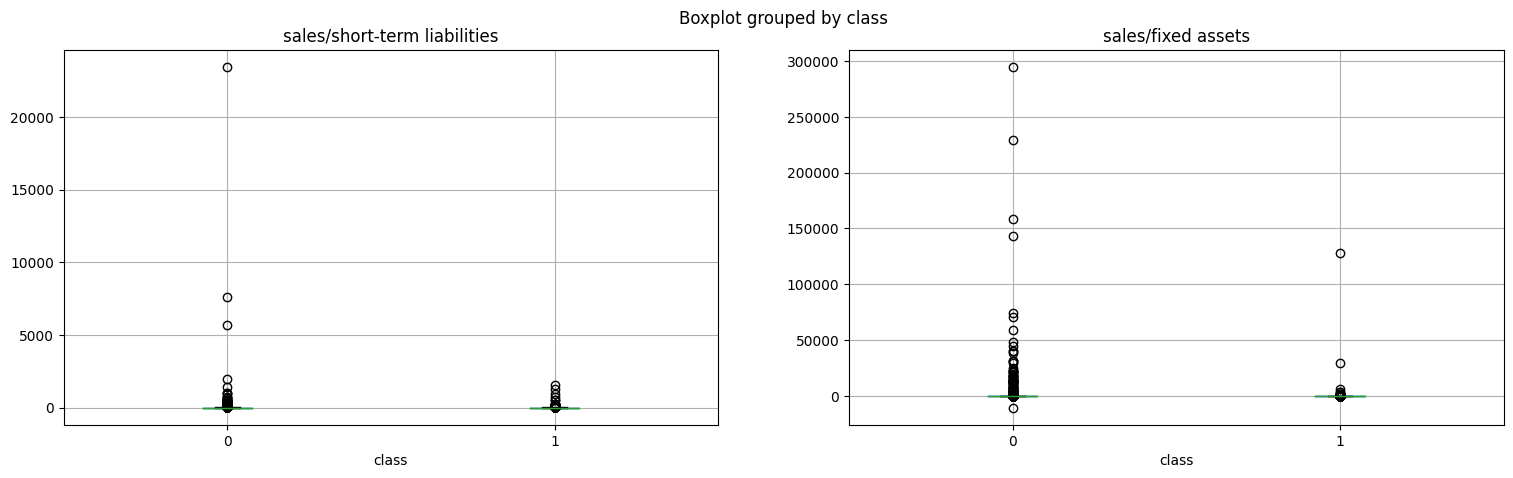

In [640]:
continuous_cols = ['sales/short-term liabilities','sales/fixed assets']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

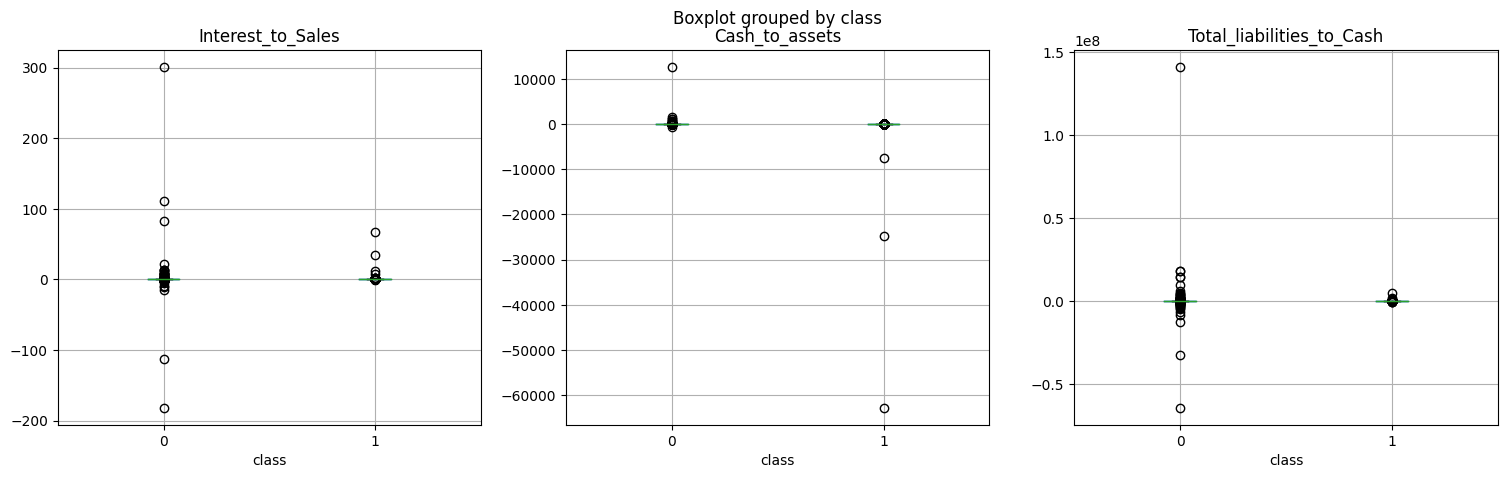

In [641]:
continuous_cols = ['Interest_to_Sales','Cash_to_assets','Total_liabilities_to_Cash']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

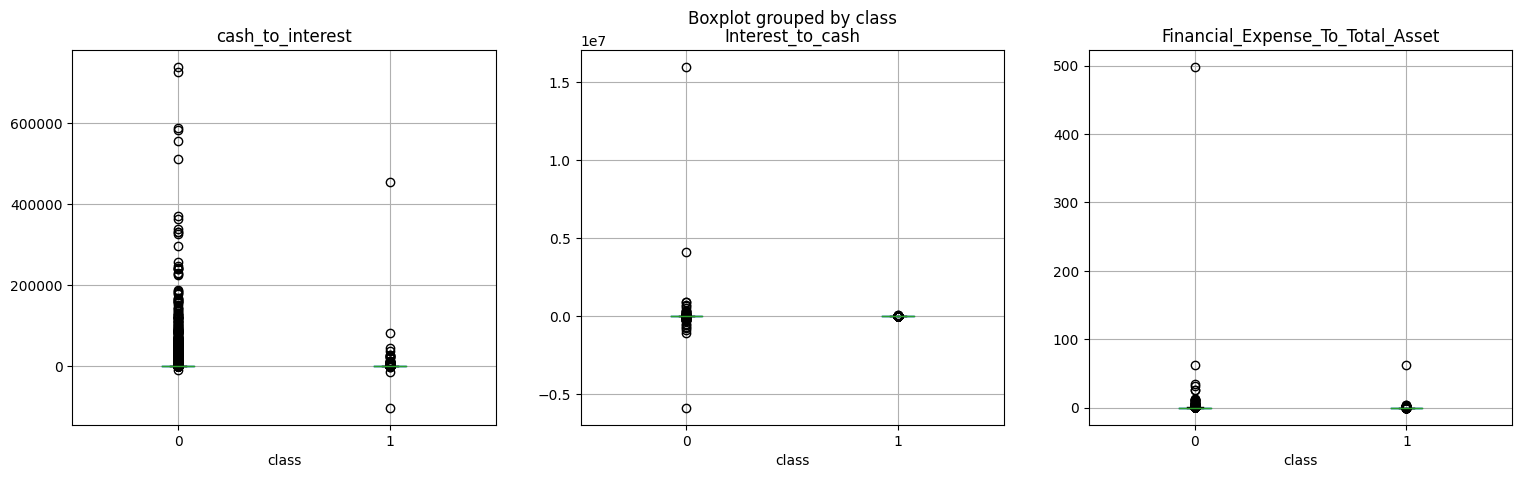

In [642]:
continuous_cols = ['cash_to_interest','Interest_to_cash','Financial_Expense_To_Total_Asset']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

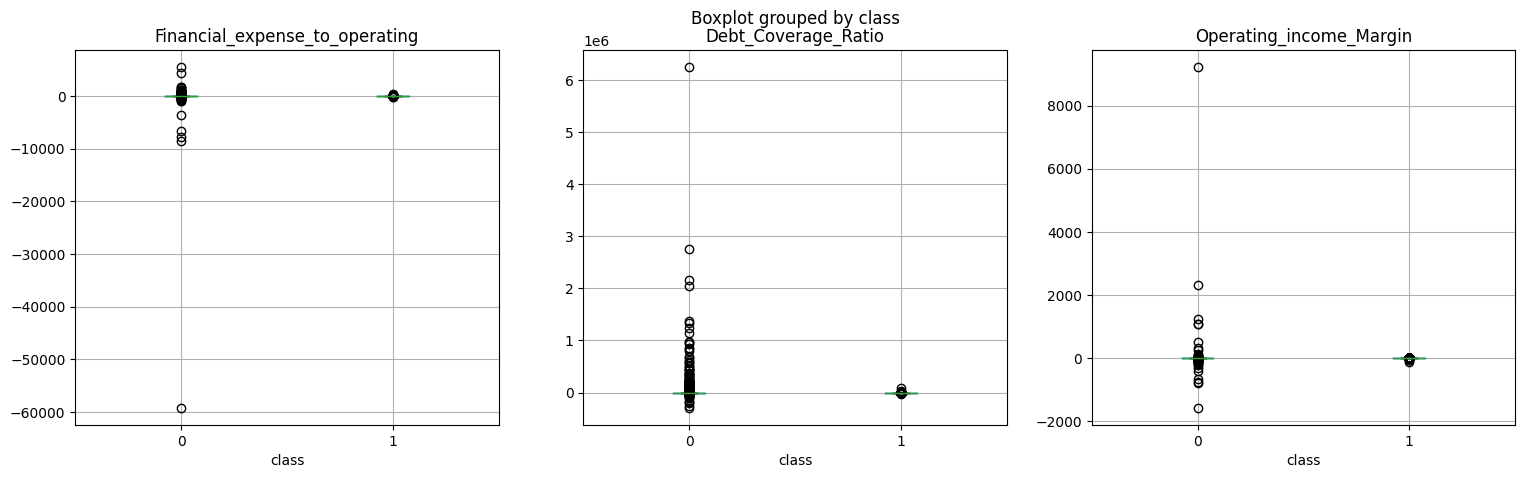

In [643]:
continuous_cols = ['Financial_expense_to_operating','Debt_Coverage_Ratio','Operating_income_Margin']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

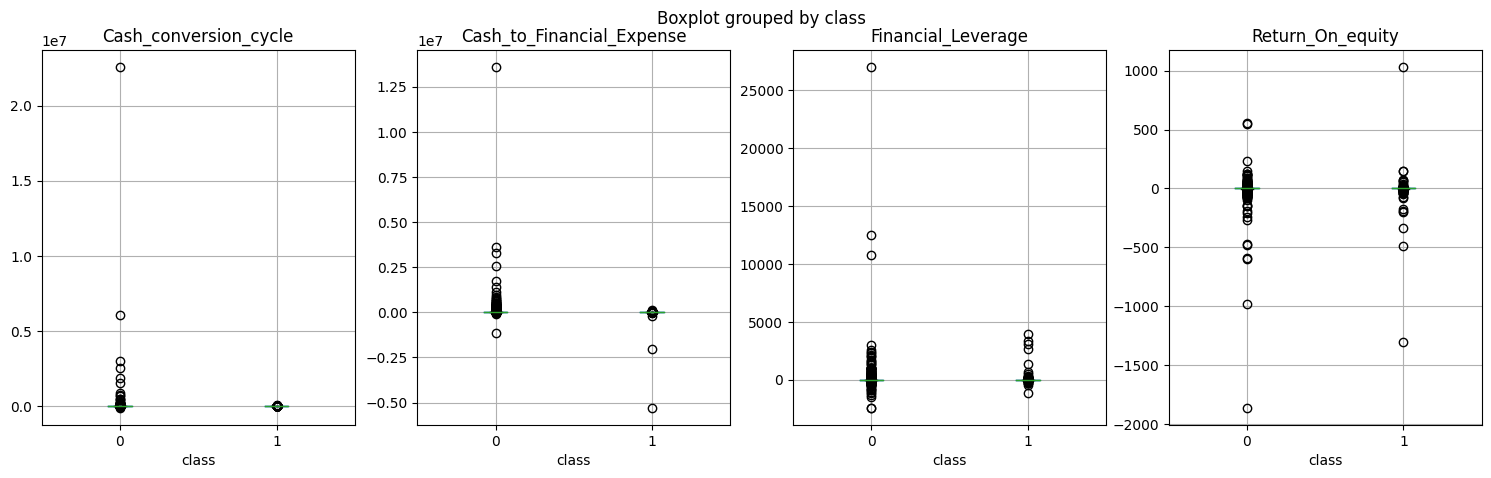

In [644]:
continuous_cols = ['Cash_conversion_cycle','Cash_to_Financial_Expense','Financial_Leverage','Return_On_equity']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()


In [645]:
polish_Dataset.isnull().any()

year                                                                                   False
net_profit/total assets                                                                 True
Total_Liabilities/total_assets                                                          True
Working_Capital_to_Total_Assets_Ratio                                                   True
Current_Ratio                                                                           True
Defensive_Interval_Ratio                                                                True
Retained_Earnings_to_Total_Assets_Ratio                                                 True
Operating_Income_to_Total_Asset_ratio                                                   True
book_value_of_equity/total_liabilities                                                  True
Asset_Turnover_Ratio                                                                    True
Equity_to_Total_Assets_Ratio                                          

In [646]:
#number of null
Features_Null=(polish_Dataset.isnull().sum())
Features_Null

year                                                                                       0
net_profit/total assets                                                                    8
Total_Liabilities/total_assets                                                             8
Working_Capital_to_Total_Assets_Ratio                                                      8
Current_Ratio                                                                            134
Defensive_Interval_Ratio                                                                  89
Retained_Earnings_to_Total_Assets_Ratio                                                    8
Operating_Income_to_Total_Asset_ratio                                                      8
book_value_of_equity/total_liabilities                                                    94
Asset_Turnover_Ratio                                                                       9
Equity_to_Total_Assets_Ratio                                          

In [647]:
polish_Dataset.corr()

year  \
year                                                                                 1.000   
net_profit/total assets                                                             -0.004   
Total_Liabilities/total_assets                                                      -0.005   
Working_Capital_to_Total_Assets_Ratio                                                0.005   
Current_Ratio                                                                        0.005   
Defensive_Interval_Ratio                                                             0.001   
Retained_Earnings_to_Total_Assets_Ratio                                             -0.000   
Operating_Income_to_Total_Asset_ratio                                               -0.019   
book_value_of_equity/total_liabilities                                               0.006   
Asset_Turnover_Ratio                                                                -0.018   
Equity_to_Total_Assets_Ratio                                                        -0.021   
gross_profit+extraordinary_items+financial_expenses)/total                          -0.019   
gross_profit/short-term_liabilities                                                 -0.001   
(gross_profit+depreciation)/sales                                                   -0.006   
(gross_profit+interest)/total_assets                                                -0.019   
(total_liabilities∗365)/(gross_profit+depreciation)                                  0.003   
(gross profit+depreciation)/total_liabilities                                       -0.000   
total_assets/total_liabilities                                                       0.006   
gross_profit/total_assets                                                           -0.019   
gross_profit/sales                                                                  -0.005   
(inventory∗365)/sales                                                               -0.007   
sales(n)/sales(n-1)                                                                 -0.009   
profit_on_operating_activities/total_assets                                         -0.016   
net_profit/sales                                                                    -0.005   
gross_profit(in3years)/total_assets                                                 -0.012   
(equity-share_capital)/total_assets                                                 -0.016   
(net_profit+depreciation)/total_liabilities                                         -0.001   
profit_on_operating_activities/financial_expenses                                   -0.006   
working_capital/fixed_assets                                                         0.013   
logarithm_of_total_assets                                                           -0.016   
(total_liabilities-cash)/sales                                                      -0.008   
(gross_profit+interest)/sales                                                       -0.005   
(current_liabilities∗365)/cost_of_products_sold                                      0.001   
operating_expenses/short-term_liabilities                                           -0.000   
operating_expenses_/_total_liabilities                                              -0.001   
profit_on_sales/total_assets                                                        -0.019   
total_sales/total_assets                                                            -0.018   
(current_assets-inventories)/long-term_liabilities                                  -0.006   
constant_capital/total_assets                                                       -0.021   
profit_on_sales/sales                                                               -0.005   
(current_assets-inventory-receivables)/short-term liabilities                        0.010   
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))           0.001   
profit_on_operating_activities/sales        

<function matplotlib.pyplot.show(close=None, block=None)>

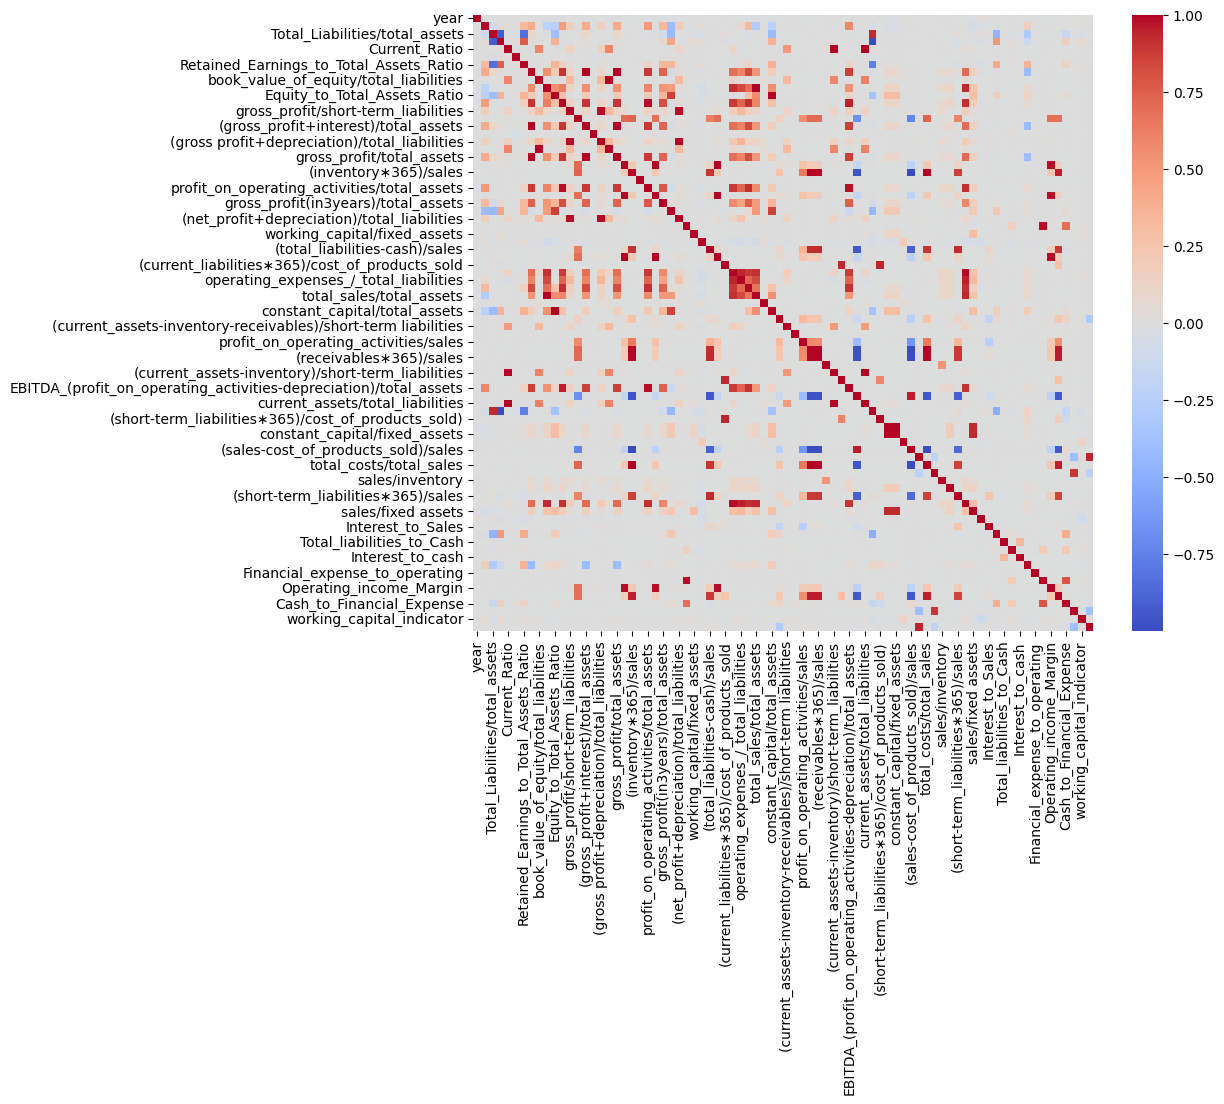

In [648]:
correlation_matrix = polish_Dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show

In [649]:
# based on initial observations, there are many extermine outliers in this dataset. The outliers are extreme in the 0 dataset.
#I will review each attribute and based on industry and financial experience will narrow the feature selections,
#before conducting any cleaning.

#Spliting Datasets into respective Years

##Year 1

In [330]:
#seperating the year. Year 1
Bankrupt_model1= polish_Dataset.loc[polish_Dataset['year']== 1]
#Bankrupt_model1 = polish_Dataset.drop(['year'],axis=1)
Bankrupt_model1.head()


year  net_profit/total assets  Total_Liabilities/total_assets  \
0     1                    0.201                           0.380   
1     1                    0.209                           0.500   
2     1                    0.249                           0.696   
3     1                    0.081                           0.307   
4     1                    0.187                           0.613   

   Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
0                                  0.396          2.047                    32.351   
1                                  0.472          1.945                    14.786   
2                                  0.267          1.555                    -1.152   
3                                  0.459          2.493                    51.952   
4                                  0.230          1.406                    -7.313   

   Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
0                                    0.388                                  0.250   
1                                    0.000                                  0.258   
2                                    0.000                                  0.309   
3                                    0.150                                  0.093   
4                                    0.187                                  0.187   

   book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
0                                   1.331                 1.139                         0.505   
1                                   0.996                 1.700                         0.498   
2                                   0.437                 1.309                         0.304   
3                                   1.866                 1.057                         0.574   
4                                   0.631                 1.156                         0.387   

   gross_profit+extraordinary_items+financial_expenses)/total  \
0                                                       0.250   
1                                                       0.261   
2                                                       0.313   
3                                                       0.093   
4                                                       0.187   

   gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
0                                0.660                              0.167   
1                                0.517                              0.158   
2                                0.642                              0.244   
3                                0.302                              0.094   
4                                0.331                              0.122   

   (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
0                                 0.250                                              497.420   
1                                 0.258                                              677.960   
2                                 0.309                                              794.160   
3                                 0.093                                              917.010   
4                                 0.187                                             1133.200   

   (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
0                                          0.734                           2.635   
1                                          0.538                           2.001   
2                                          0.460                           1.437   
3                                          0.398                           3.254   
4                                          0.322                           1.631   

   gross_profit/total_assets  gross_profit/sales  (in

In [331]:
Bankrupt_model1['class'].value_counts()

class
0    6756
1     271
Name: count, dtype: int64

In [332]:
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Handle missing values by dropping rows with missing data
Bankrupt_model1 = Bankrupt_model1.dropna()

# Ensure 'class' is categorical
Bankrupt_model1['class'] = Bankrupt_model1['class'].astype('category')

# List of continuous columns
continuous_columns = [
    'net_profit/total assets', 'Total_Liabilities/total_assets', 'Working_Capital_to_Total_Assets_Ratio',
    'Current_Ratio', 'Defensive_Interval_Ratio', 'Retained_Earnings_to_Total_Assets_Ratio',
    'Operating_Income_to_Total_Asset_ratio', 'book_value_of_equity/total_liabilities', 'Asset_Turnover_Ratio',
    'Equity_to_Total_Assets_Ratio', 'gross_profit+extraordinary_items+financial_expenses)/total',
    'gross_profit/short-term_liabilities', '(gross_profit+depreciation)/sales',
    '(gross_profit+interest)/total_assets', '(total_liabilities∗365)/(gross_profit+depreciation)',
    '(gross profit+depreciation)/total_liabilities', 'total_assets/total_liabilities',
    'gross_profit/total_assets', 'gross_profit/sales', '(inventory∗365)/sales', 'sales(n)/sales(n-1)',
    'profit_on_operating_activities/total_assets', 'net_profit/sales', 'gross_profit(in3years)/total_assets',
    '(equity-share_capital)/total_assets', '(net_profit+depreciation)/total_liabilities',
    'profit_on_operating_activities/financial_expenses', 'working_capital/fixed_assets',
    'logarithm_of_total_assets', '(total_liabilities-cash)/sales', '(gross_profit+interest)/sales',
    '(current_liabilities∗365)/cost_of_products_sold', 'operating_expenses/short-term_liabilities',
    'operating_expenses_/_total_liabilities', 'profit_on_sales/total_assets', 'total_sales/total_assets',
    '(current_assets-inventories)/long-term_liabilities', 'constant_capital/total_assets',
    'profit_on_sales/sales', '(current_assets-inventory-receivables)/short-term liabilities',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    'profit_on_operating_activities/sales', 'rotation_receivables+inventory_turnover_in_days',
    '(receivables∗365)/sales', 'net_profit/inventory', '(current_assets-inventory)/short-term_liabilities',
    '(inventory∗365)/cost_of_products_sold', 'EBITDA_(profit_on_operating_activities-depreciation)/total_assets',
    'EBITDA_(profit_on_operating_activities-depreciation)/sales', 'current_assets/total_liabilities',
    'short-term_liabilities/total_assets', '(short-term_liabilities∗365)/cost_of_products_sold)',
    'equity/fixed_assets', 'constant_capital/fixed_assets', 'working_capital', '(sales-cost_of_products_sold)/sales',
    '(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)',
    'total_costs/total_sales', 'long-term_liabilities/equity', 'sales/inventory', 'sales/receivables',
    '(short-term_liabilities∗365)/sales', 'sales/short-term liabilities', 'sales/fixed assets',
    'Interest_to_Sales', 'Cash_to_assets', 'Total_liabilities_to_Cash', 'cash_to_interest', 'Interest_to_cash',
    'Financial_Expense_To_Total_Asset', 'Financial_expense_to_operating', 'Debt_Coverage_Ratio',
    'Operating_income_Margin', 'Cash_conversion_cycle', 'Cash_to_Financial_Expense', 'Financial_Leverage',
    'Return_On_equity'
]


<ipython-input-332-08b592cc1e79>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankrupt_model1['class'] = Bankrupt_model1['class'].astype('category')


###Logistic Regression testing for Feature Selection

Optimization terminated successfully.
         Current function value: 0.111890
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.111050
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.111737
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.110126
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.114380
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.114413
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.111782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.110179
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.113145
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.111050
 

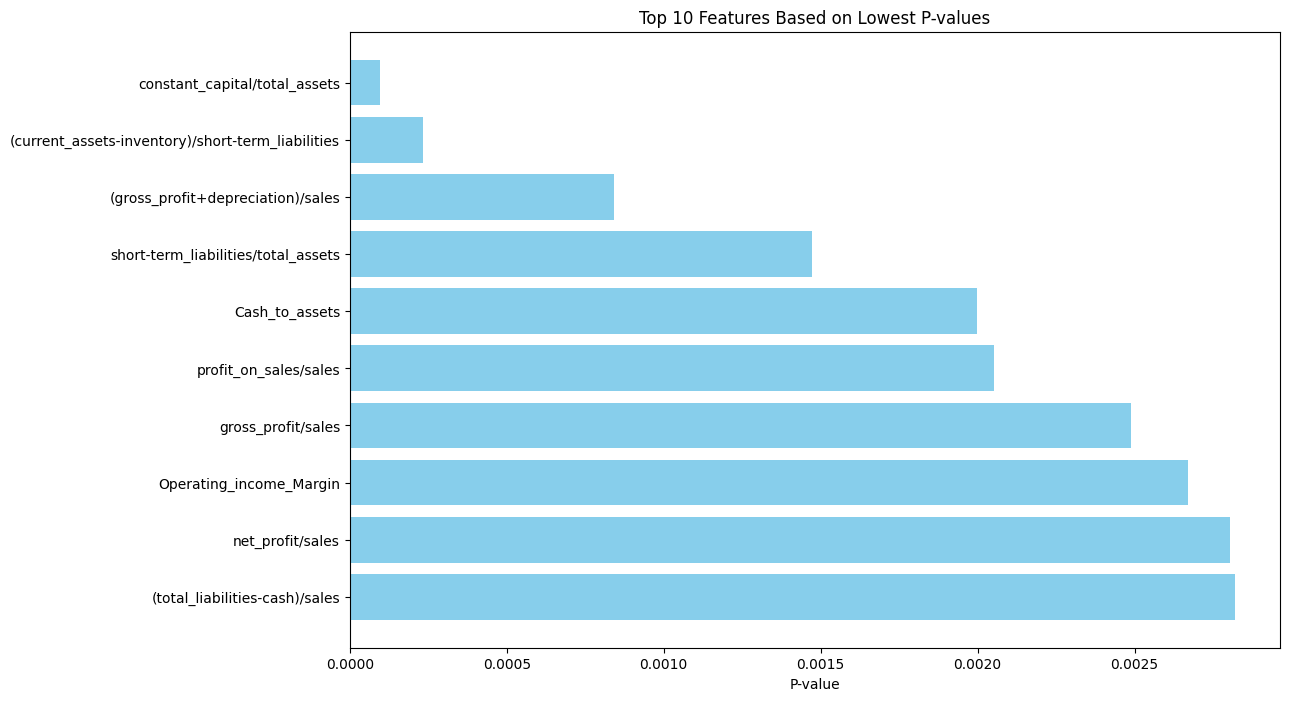

In [333]:
# Initialize a list to store the p-values and column names
p_values_list = []

# Perform logistic regression
for col in continuous_columns:
    X = Bankrupt_model1[col]
    y = Bankrupt_model1['class'].cat.codes  # Convert categorical 'class' to numerical codes

    # Add constant to X
    X = sm.add_constant(X)

    # Fit logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()

    # Get the p-value for the predictor variable (the column)
    p_val = result.pvalues[col]

    # Append the p-value and column name to the list
    p_values_list.append((col, p_val))

# Sort the list by p-value
p_values_list.sort(key=lambda x: x[1])

# Extract the top 15 features based on lowest p-values
top_features = p_values_list[:10]

# Extract feature names and p-values for plotting
feature_names = [col for col, _ in top_features]
p_values = [p_val for _, p_val in top_features]

# Display the top 10 features
print("Top 10 features based on lowest p-values:")
print(feature_names)

# Plotting the top 15 features based on their p-values
plt.figure(figsize=(12, 8))
plt.barh(feature_names, p_values, color='skyblue')
plt.xlabel('P-value')
plt.title('Top 10 Features Based on Lowest P-values')
plt.gca().invert_yaxis()
plt.show()

###Random Forest testing for Feature Selection

                                                   importance
Cash_to_assets                                          0.080
Cash_to_Financial_Expense                               0.069
cash_to_interest                                        0.051
Financial_expense_to_operating                          0.046
Financial_Expense_To_Total_Asset                        0.024
(current_assets-inventory)/short-term_liabilities       0.024
constant_capital/fixed_assets                           0.021
sales/fixed assets                                      0.020
working_capital/fixed_assets                            0.020
(total_liabilities-cash)/sales                          0.020


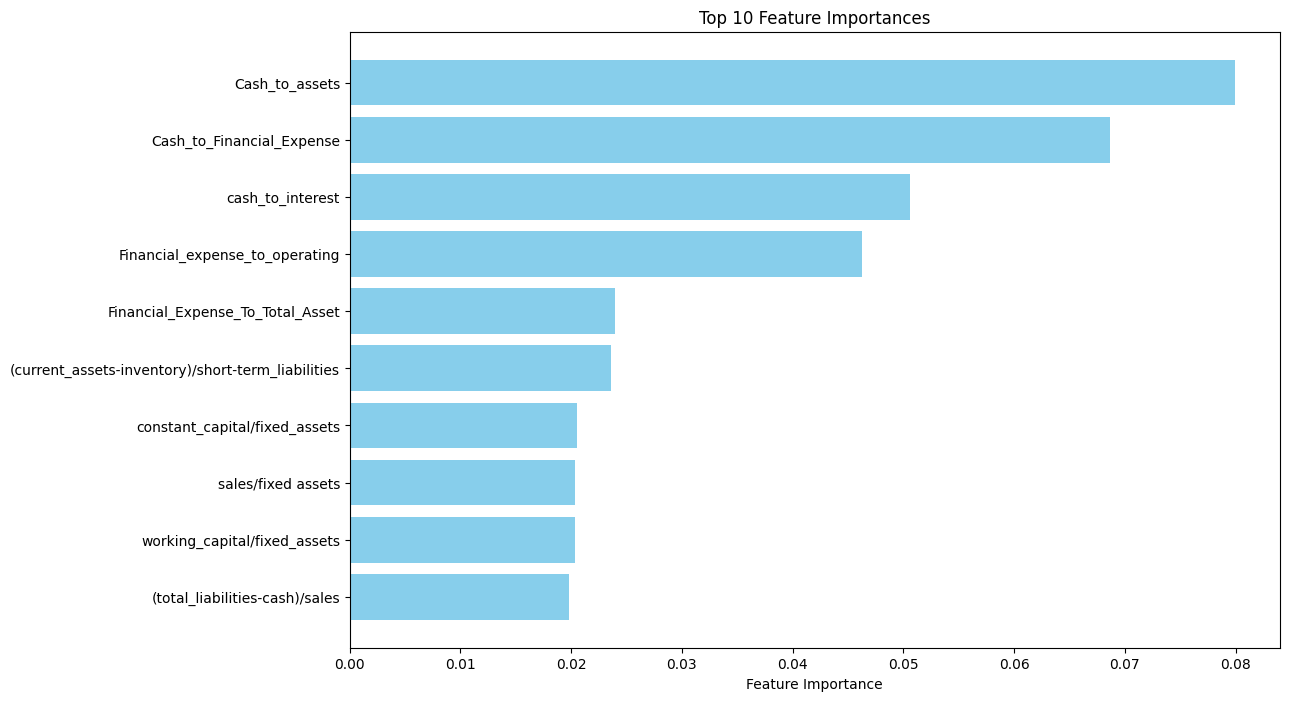

In [334]:
# Define features (X) and target (y)
X = Bankrupt_model1.drop('class', axis=1)
y = Bankrupt_model1['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=4)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index[:10], feature_importances['importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

###Prepearing new Dataset for testing


In [335]:
Bankrupt_model1 = polish_Dataset[[
    'year',
'constant_capital/total_assets',
    '(current_assets-inventory)/short-term_liabilities',
    '(gross_profit+depreciation)/sales',
    'short-term_liabilities/total_assets',
    'Cash_to_assets',
    'profit_on_sales/sales',
    'gross_profit/sales',
    'Operating_income_Margin',
    'net_profit/sales',
    '(total_liabilities-cash)/sales',
    'class'
]]
Bankrupt_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               43405 non-null  int64   
 1   Cash_to_assets                                     43270 non-null  float64 
 2   Cash_to_Financial_Expense                          37567 non-null  float64 
 3   cash_to_interest                                   23529 non-null  float64 
 4   Financial_expense_to_operating                     37635 non-null  float64 
 5   Financial_Expense_To_Total_Asset                   37664 non-null  float64 
 6   (current_assets-inventory)/short-term_liabilities  43270 non-null  float64 
 7   constant_capital/fixed_assets                      42593 non-null  float64 
 8   sales/fixed assets                                 42593 non-null  float64 


###Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

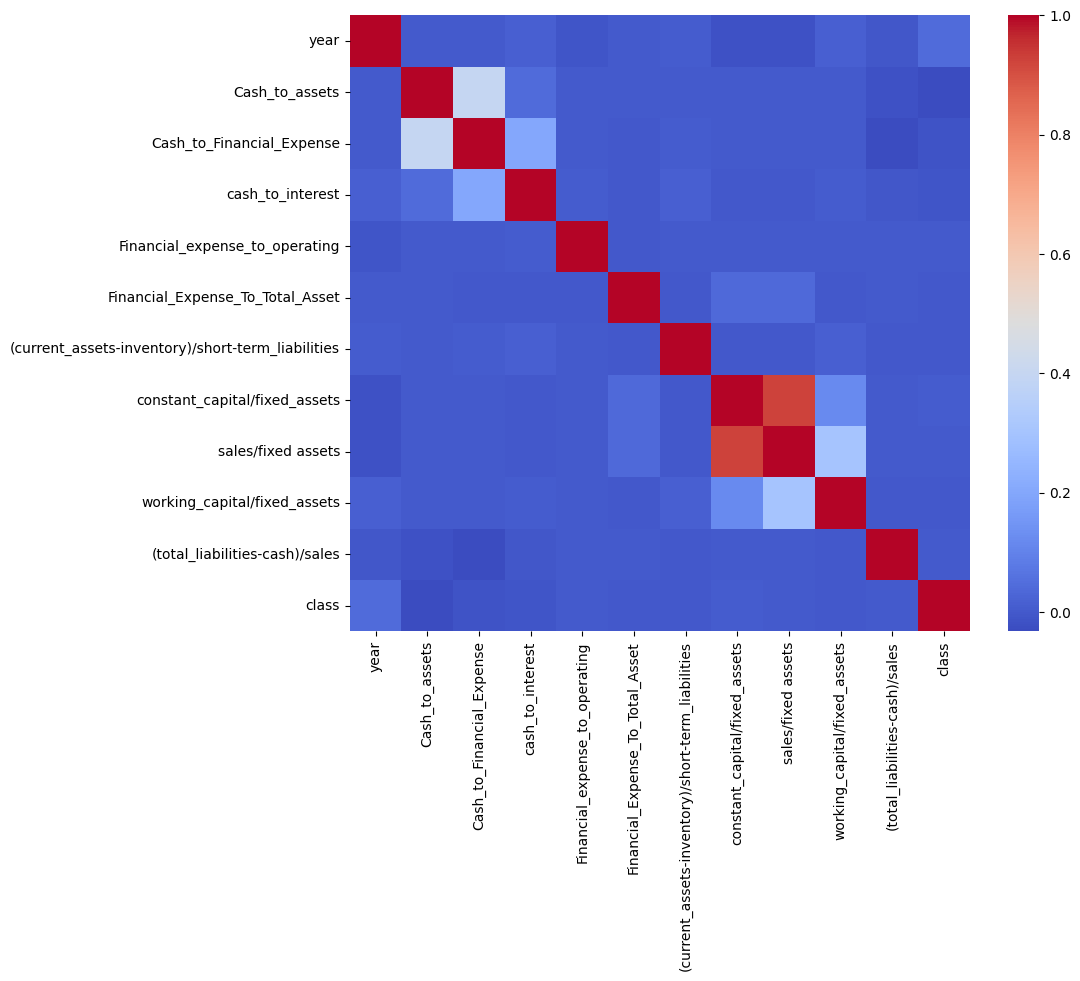

In [336]:
plt.figure(figsize=(10, 8))
sns.heatmap(Bankrupt_model1.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.show

###Review and remove outliers

In [337]:
pd.options.display.float_format = "{:.3f}".format
Bankrupt_model1.describe()

year  Cash_to_assets  Cash_to_Financial_Expense  cash_to_interest  \
count 43405.000       43270.000                  37567.000         23529.000   
mean      2.940          -1.694                   1602.862          1535.972   
std       1.284         331.746                  84176.481         15145.109   
min       1.000      -62701.320               -5282808.239       -103000.374   
25%       2.000           0.006                      0.089             0.322   
50%       3.000           0.037                      0.717             2.203   
75%       4.000           0.130                      4.571            21.143   
max       5.000       12643.204               13597750.957        738251.408   

       Financial_expense_to_operating  Financial_Expense_To_Total_Asset  \
count                       37635.000                         37664.000   
mean                            0.347                             0.108   
std                           316.997                             2.635   
min                        -59197.589                            -0.118   
25%                             0.004                             0.012   
50%                             0.248                             0.040   
75%                             1.279                             0.122   
max                          5554.244                           498.359   

       (current_assets-inventory)/short-term_liabilities  constant_capital/fixed_assets  \
count                                          43270.000                      42593.000   
mean                                               5.429                         24.655   
std                                              295.356                       1220.884   
min                                             -101.260                      -3828.900   
25%                                                0.607                          0.956   
50%                                                1.027                          1.377   
75%                                                1.911                          2.370   
max                                            53433.000                     180440.000   

       sales/fixed assets  working_capital/fixed_assets  (total_liabilities-cash)/sales  
count           42593.000                     42593.000                       43278.000  
mean               72.796                         6.003                           7.371  
std              2369.745                       153.469                         814.490  
min            -10677.000                     -3829.900                       -6351.700  
25%                 2.177                         0.038                           0.083  
50%                 4.282                         0.465                           0.217  
75%                 9.776                         1.497                           0.409  
max            294770.000                     21701.000                      152860.000

In [338]:
#adjusting for outliers
numeric_cols = Bankrupt_model1.select_dtypes(include=[float]).columns
numeric_cols

Index(['Cash_to_assets', 'Cash_to_Financial_Expense', 'cash_to_interest',
       'Financial_expense_to_operating', 'Financial_Expense_To_Total_Asset',
       '(current_assets-inventory)/short-term_liabilities', 'constant_capital/fixed_assets',
       'sales/fixed assets', 'working_capital/fixed_assets', '(total_liabilities-cash)/sales'],
      dtype='object')

In [339]:
#adjusting for outliers
numeric_cols = Bankrupt_model1.select_dtypes(include=[float, int]).columns
# Calculate Q1, Q3, and IQR for each column
Q1 = Bankrupt_model1[numeric_cols].quantile(0.25)
Q3 = Bankrupt_model1[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Create a boolean DataFrame indicating whether each value is an outlier
outliers = (Bankrupt_model1[numeric_cols] < lower_bound) | (Bankrupt_model1[numeric_cols] > upper_bound)

# Filter rows that contain any outliers
rows_with_outliers = outliers.any(axis=1)
Bankruptcleaned_model = Bankrupt_model1[~rows_with_outliers]

Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26612 entries, 0 to 43404
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               26612 non-null  int64   
 1   Cash_to_assets                                     26546 non-null  float64 
 2   Cash_to_Financial_Expense                          22411 non-null  float64 
 3   cash_to_interest                                   14450 non-null  float64 
 4   Financial_expense_to_operating                     22457 non-null  float64 
 5   Financial_Expense_To_Total_Asset                   22461 non-null  float64 
 6   (current_assets-inventory)/short-term_liabilities  26558 non-null  float64 
 7   constant_capital/fixed_assets                      26287 non-null  float64 
 8   sales/fixed assets                                 26287 non-null  float64 
 9   

In [340]:
print(len(Bankrupt_model1))
print(len(Bankruptcleaned_model))

43405
26612


In [341]:
Bankruptcleaned_model.describe()

year  Cash_to_assets  Cash_to_Financial_Expense  cash_to_interest  \
count 26612.000       26546.000                  22411.000         14450.000   
mean      2.902           0.056                      1.626             4.446   
std       1.299           0.087                      3.060            10.005   
min       1.000          -0.365                    -12.839           -45.133   
25%       2.000           0.004                      0.063             0.185   
50%       3.000           0.023                      0.462             1.050   
75%       4.000           0.076                      1.717             4.274   
max       5.000           0.501                     18.005            83.456   

       Financial_expense_to_operating  Financial_Expense_To_Total_Asset  \
count                       22457.000                         22461.000   
mean                            0.696                             0.080   
std                             1.352                             0.078   
min                            -3.811                            -0.044   
25%                             0.055                             0.019   
50%                             0.423                             0.049   
75%                             1.244                             0.124   
max                             5.103                             0.451   

       (current_assets-inventory)/short-term_liabilities  constant_capital/fixed_assets  \
count                                          26558.000                      26287.000   
mean                                               1.204                          1.479   
std                                                0.982                          1.029   
min                                               -0.343                         -3.205   
25%                                                0.569                          0.924   
50%                                                0.910                          1.245   
75%                                                1.479                          1.800   
max                                                5.813                          6.607   

       sales/fixed assets  working_capital/fixed_assets  (total_liabilities-cash)/sales  
count           26287.000                     26287.000                       26548.000  
mean                5.482                         0.579                           0.312  
std                 5.351                         1.043                           0.267  
min                 0.000                        -4.170                          -0.892  
25%                 2.078                         0.010                           0.136  
50%                 3.652                         0.326                           0.256  
75%                 6.689                         0.899                           0.428  
max                32.558                         5.865                           1.387

In [342]:
Bankruptcleaned_model.corr()

year  Cash_to_assets  \
year                                               1.000          -0.000   
Cash_to_assets                                    -0.000           1.000   
Cash_to_Financial_Expense                          0.006           0.468   
cash_to_interest                                   0.011           0.383   
Financial_expense_to_operating                     0.015           0.037   
Financial_Expense_To_Total_Asset                  -0.032           0.133   
(current_assets-inventory)/short-term_liabilities  0.019           0.473   
constant_capital/fixed_assets                      0.015           0.312   
sales/fixed assets                                -0.039           0.138   
working_capital/fixed_assets                       0.016           0.327   
(total_liabilities-cash)/sales                     0.042          -0.452   
class                                              0.037          -0.107   

                                                   Cash_to_Financial_Expense  cash_to_interest  \
year                                                                   0.006             0.011   
Cash_to_assets                                                         0.468             0.383   
Cash_to_Financial_Expense                                              1.000             0.560   
cash_to_interest                                                       0.560             1.000   
Financial_expense_to_operating                                        -0.140            -0.048   
Financial_Expense_To_Total_Asset                                      -0.327            -0.061   
(current_assets-inventory)/short-term_liabilities                      0.246             0.233   
constant_capital/fixed_assets                                          0.167             0.144   
sales/fixed assets                                                     0.108             0.073   
working_capital/fixed_assets                                           0.165             0.150   
(total_liabilities-cash)/sales                                        -0.243            -0.214   
class                                                                 -0.056            -0.065   

                                                   Financial_expense_to_operating  \
year                                                                        0.015   
Cash_to_assets                                                              0.037   
Cash_to_Financial_Expense                                                  -0.140   
cash_to_interest                                                           -0.048   
Financial_expense_to_operating                                              1.000   
Financial_Expense_To_Total_Asset                                            0.311   
(current_assets-inventory)/short-term_liabilities                           0.002   
constant_capital/fixed_assets                                               0.050   
sales/fixed assets                                                          0.001   
working_capital/fixed_assets                                                0.055   
(total_liabilities-cash)/sales                                             -0.104   
class                                                                      -0.055   

                                                   Financial_Expense_To_Total_Asset  \
year                                                                         -0.032   
Cash_to_assets                                                                0.133   
Cash_to_Financial_Expense                                                    -0.327   
cash_to_interest                                                             -0.061   
Financial_expense_to_operating                                                0.311   
Financial_Expense_To_Total_Asset                                              1.000   
(current_assets-inventory)/short-term_liabilities                        

In [343]:
for column in Bankruptcleaned_model.columns:
  countzero = (Bankruptcleaned_model[column] == 0).sum()
  print(f"{column} has {countzero} zero values")

year has 0 zero values
Cash_to_assets has 8 zero values
Cash_to_Financial_Expense has 1 zero values
cash_to_interest has 1 zero values
Financial_expense_to_operating has 10 zero values
Financial_Expense_To_Total_Asset has 10 zero values
(current_assets-inventory)/short-term_liabilities has 1 zero values
constant_capital/fixed_assets has 1 zero values
sales/fixed assets has 45 zero values
working_capital/fixed_assets has 0 zero values
(total_liabilities-cash)/sales has 10 zero values
class has 25276 zero values


In [344]:
length=len(Bankruptcleaned_model['class'])
print(f"total number of rows is: {length}")

total number of rows is: 26612


In [345]:
nulls=Bankruptcleaned_model.isnull().sum()
nulls

year                                                     0
Cash_to_assets                                          66
Cash_to_Financial_Expense                             4201
cash_to_interest                                     12162
Financial_expense_to_operating                        4155
Financial_Expense_To_Total_Asset                      4151
(current_assets-inventory)/short-term_liabilities       54
constant_capital/fixed_assets                          325
sales/fixed assets                                     325
working_capital/fixed_assets                           325
(total_liabilities-cash)/sales                          64
class                                                    0
dtype: int64

In [346]:
percentage_nulls=nulls/length*100
percentage_nulls
#to determine % of null per attribute. anything over 10% will be removed. The remainder will use random forest imputation.

year                                                 0.000
Cash_to_assets                                       0.248
Cash_to_Financial_Expense                           15.786
cash_to_interest                                    45.701
Financial_expense_to_operating                      15.613
Financial_Expense_To_Total_Asset                    15.598
(current_assets-inventory)/short-term_liabilities    0.203
constant_capital/fixed_assets                        1.221
sales/fixed assets                                   1.221
working_capital/fixed_assets                         1.221
(total_liabilities-cash)/sales                       0.240
class                                                0.000
dtype: float64

In [347]:
percentage_nulls[percentage_nulls>5]

Cash_to_Financial_Expense          15.786
cash_to_interest                   45.701
Financial_expense_to_operating     15.613
Financial_Expense_To_Total_Asset   15.598
dtype: float64

In [348]:
Bankruptcleaned_model.drop([
    'Cash_to_Financial_Expense',
    'cash_to_interest',
    'Financial_expense_to_operating',
    'Financial_Expense_To_Total_Asset'
],axis=1,inplace=True)

<ipython-input-348-fd25f6bcb95d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankruptcleaned_model.drop([


In [349]:
Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26612 entries, 0 to 43404
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               26612 non-null  int64   
 1   Cash_to_assets                                     26546 non-null  float64 
 2   (current_assets-inventory)/short-term_liabilities  26558 non-null  float64 
 3   constant_capital/fixed_assets                      26287 non-null  float64 
 4   sales/fixed assets                                 26287 non-null  float64 
 5   working_capital/fixed_assets                       26287 non-null  float64 
 6   (total_liabilities-cash)/sales                     26548 non-null  float64 
 7   class                                              26612 non-null  category
dtypes: category(1), float64(6), int64(1)
memory usage: 1.6 MB


In [350]:
 nulls=Bankruptcleaned_model.isnull().sum()
 nulls

year                                                   0
Cash_to_assets                                        66
(current_assets-inventory)/short-term_liabilities     54
constant_capital/fixed_assets                        325
sales/fixed assets                                   325
working_capital/fixed_assets                         325
(total_liabilities-cash)/sales                        64
class                                                  0
dtype: int64

In [351]:
nulls/length*100

year                                                0.000
Cash_to_assets                                      0.248
(current_assets-inventory)/short-term_liabilities   0.203
constant_capital/fixed_assets                       1.221
sales/fixed assets                                  1.221
working_capital/fixed_assets                        1.221
(total_liabilities-cash)/sales                      0.240
class                                               0.000
dtype: float64

###imputation models

In [352]:
#using 2 different methods of imputation to see which one works best
Bankrupt_modelMMM=Bankruptcleaned_model.copy()
Bankrupt_modelRF=Bankruptcleaned_model.copy()

In [353]:
# Columns with missing values in your bankrupt_model dataset
columns_with_missing = [
'Cash_to_assets',
    '(current_assets-inventory)/short-term_liabilities',
    'constant_capital/fixed_assets',
    'sales/fixed assets',
    'working_capital/fixed_assets',
    '(total_liabilities-cash)/sales'
]

In [354]:
# Perform imputation (example using SimpleImputer with mean)
imputer = SimpleImputer(strategy='mean')
Bankrupt_modelMMM[columns_with_missing] = imputer.fit_transform(Bankrupt_modelMMM[columns_with_missing])

In [355]:
#perfomring imputation with Random Forest
estimator = RandomForestRegressor(n_estimators=3, max_depth= 3)
imputer = IterativeImputer(estimator=estimator, random_state=0)
Bankrupt_modelRF[columns_with_missing] = imputer.fit_transform(Bankrupt_modelRF[columns_with_missing])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [356]:
Bankrupt_modelMMM.isnull().sum()

year                                                 0
Cash_to_assets                                       0
(current_assets-inventory)/short-term_liabilities    0
constant_capital/fixed_assets                        0
sales/fixed assets                                   0
working_capital/fixed_assets                         0
(total_liabilities-cash)/sales                       0
class                                                0
dtype: int64

In [357]:
Bankrupt_modelMMM.describe()

year  Cash_to_assets  (current_assets-inventory)/short-term_liabilities  \
count 26612.000       26612.000                                          26612.000   
mean      2.902           0.056                                              1.204   
std       1.299           0.087                                              0.981   
min       1.000          -0.365                                             -0.343   
25%       2.000           0.004                                              0.570   
50%       3.000           0.023                                              0.911   
75%       4.000           0.076                                              1.478   
max       5.000           0.501                                              5.813   

       constant_capital/fixed_assets  sales/fixed assets  working_capital/fixed_assets  \
count                      26612.000           26612.000                     26612.000   
mean                           1.479               5.482                         0.579   
std                            1.023               5.318                         1.037   
min                           -3.205               0.000                        -4.170   
25%                            0.929               2.095                         0.013   
50%                            1.256               3.700                         0.336   
75%                            1.790               6.623                         0.890   
max                            6.607              32.558                         5.865   

       (total_liabilities-cash)/sales  
count                       26612.000  
mean                            0.312  
std                             0.267  
min                            -0.892  
25%                             0.136  
50%                             0.257  
75%                             0.427  
max                             1.387

In [358]:
Bankrupt_modelRF.describe()

year  Cash_to_assets  (current_assets-inventory)/short-term_liabilities  \
count 26612.000       26612.000                                          26612.000   
mean      2.902           0.056                                              1.206   
std       1.299           0.087                                              0.982   
min       1.000          -0.365                                             -0.343   
25%       2.000           0.004                                              0.570   
50%       3.000           0.023                                              0.911   
75%       4.000           0.076                                              1.481   
max       5.000           0.501                                              5.813   

       constant_capital/fixed_assets  sales/fixed assets  working_capital/fixed_assets  \
count                      26612.000           26612.000                     26612.000   
mean                           1.478               5.470                         0.578   
std                            1.023               5.321                         1.037   
min                           -3.205               0.000                        -4.170   
25%                            0.929               2.095                         0.013   
50%                            1.256               3.681                         0.336   
75%                            1.790               6.623                         0.890   
max                            6.607              32.558                         5.865   

       (total_liabilities-cash)/sales  
count                       26612.000  
mean                            0.313  
std                             0.267  
min                            -0.892  
25%                             0.136  
50%                             0.257  
75%                             0.429  
max                             1.387

In [359]:
Bankrupt_modelRF.isnull().sum()

year                                                 0
Cash_to_assets                                       0
(current_assets-inventory)/short-term_liabilities    0
constant_capital/fixed_assets                        0
sales/fixed assets                                   0
working_capital/fixed_assets                         0
(total_liabilities-cash)/sales                       0
class                                                0
dtype: int64

In [360]:
Bankrupt_modelRF['class'].value_counts()

class
0    25276
1     1336
Name: count, dtype: int64

In [361]:
Bankrupt_model1 =Bankrupt_modelRF

##Year 2

In [375]:
#year 2
Bankrupt_model2= polish_Dataset.loc[polish_Dataset['year']== 2]
#Bankrupt_model2 = polish_Dataset.drop(['year'],axis=1)
Bankrupt_model2.head()

year  net_profit/total assets  Total_Liabilities/total_assets  \
7027     2                    0.202                           0.465   
7028     2                    0.030                           0.596   
7029     2                    0.258                           0.299   
7030     2                    0.227                           0.678   
7031     2                    0.085                           0.380   

      Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
7027                                  0.240          1.517                   -14.547   
7028                                  0.187          1.338                   -37.859   
7029                                  0.665          3.221                    71.799   
7030                                  0.043          1.083                   -88.212   
7031                                  0.359          1.944                    21.731   

      Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
7027                                    0.511                                  0.254   
7028                                   -0.000                                  0.042   
7029                                    0.000                                  0.319   
7030                                    0.000                                  0.285   
7031                                    0.188                                  0.108   

      book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
7027                                   0.918                 1.152                         0.427   
7028                                   0.679                 0.324                         0.404   
7029                                   2.332                 1.676                         0.698   
7030                                   0.474                 1.324                         0.322   
7031                                   1.371                 1.113                         0.522   

      gross_profit+extraordinary_items+financial_expenses)/total  \
7027                                                       0.254   
7028                                                       0.042   
7029                                                       0.325   
7030                                                       0.381   
7031                                                       0.108   

      gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
7027                                0.546                              0.179   
7028                                0.075                              0.146   
7029                                1.064                              0.197   
7030                                0.552                              0.228   
7031                                0.285                              0.089   

      (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
7027                                 0.254                                              603.200   
7028                                 0.042                                             4613.900   
7029                                 0.319                                              330.290   
7030                                 0.285                                              820.520   
7031                                 0.108                                              997.010   

      (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
7027                                          0.605                           2.151   
7028                                          0.079                           1.679   
7029                                          1.105                           3.339   
7030                                          0.445                           1.474   


In [376]:
Bankrupt_model2['class'].value_counts()

class
0    9773
1     400
Name: count, dtype: int64

In [377]:
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Handle missing values by dropping rows with missing data
Bankrupt_model2 = Bankrupt_model2.dropna()

# Ensure 'class' is categorical
Bankrupt_model2['class'] = Bankrupt_model2['class'].astype('category')

# List of continuous columns
continuous_columns = [
    'net_profit/total assets', 'Total_Liabilities/total_assets', 'Working_Capital_to_Total_Assets_Ratio',
    'Current_Ratio', 'Defensive_Interval_Ratio', 'Retained_Earnings_to_Total_Assets_Ratio',
    'Operating_Income_to_Total_Asset_ratio', 'book_value_of_equity/total_liabilities', 'Asset_Turnover_Ratio',
    'Equity_to_Total_Assets_Ratio', 'gross_profit+extraordinary_items+financial_expenses)/total',
    'gross_profit/short-term_liabilities', '(gross_profit+depreciation)/sales',
    '(gross_profit+interest)/total_assets', '(total_liabilities∗365)/(gross_profit+depreciation)',
    '(gross profit+depreciation)/total_liabilities', 'total_assets/total_liabilities',
    'gross_profit/total_assets', 'gross_profit/sales', '(inventory∗365)/sales', 'sales(n)/sales(n-1)',
    'profit_on_operating_activities/total_assets', 'net_profit/sales', 'gross_profit(in3years)/total_assets',
    '(equity-share_capital)/total_assets', '(net_profit+depreciation)/total_liabilities',
    'profit_on_operating_activities/financial_expenses', 'working_capital/fixed_assets',
    'logarithm_of_total_assets', '(total_liabilities-cash)/sales', '(gross_profit+interest)/sales',
    '(current_liabilities∗365)/cost_of_products_sold', 'operating_expenses/short-term_liabilities',
    'operating_expenses_/_total_liabilities', 'profit_on_sales/total_assets', 'total_sales/total_assets',
    '(current_assets-inventories)/long-term_liabilities', 'constant_capital/total_assets',
    'profit_on_sales/sales', '(current_assets-inventory-receivables)/short-term liabilities',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    'profit_on_operating_activities/sales', 'rotation_receivables+inventory_turnover_in_days',
    '(receivables∗365)/sales', 'net_profit/inventory', '(current_assets-inventory)/short-term_liabilities',
    '(inventory∗365)/cost_of_products_sold', 'EBITDA_(profit_on_operating_activities-depreciation)/total_assets',
    'EBITDA_(profit_on_operating_activities-depreciation)/sales', 'current_assets/total_liabilities',
    'short-term_liabilities/total_assets', '(short-term_liabilities∗365)/cost_of_products_sold)',
    'equity/fixed_assets', 'constant_capital/fixed_assets', 'working_capital', '(sales-cost_of_products_sold)/sales',
    '(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)',
    'total_costs/total_sales', 'long-term_liabilities/equity', 'sales/inventory', 'sales/receivables',
    '(short-term_liabilities∗365)/sales', 'sales/short-term liabilities', 'sales/fixed assets',
    'Interest_to_Sales', 'Cash_to_assets', 'Total_liabilities_to_Cash', 'cash_to_interest', 'Interest_to_cash',
    'Financial_Expense_To_Total_Asset', 'Financial_expense_to_operating', 'Debt_Coverage_Ratio',
    'Operating_income_Margin', 'Cash_conversion_cycle', 'Cash_to_Financial_Expense', 'Financial_Leverage',
    'Return_On_equity'
]

<ipython-input-377-4d427016a945>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankrupt_model2['class'] = Bankrupt_model2['class'].astype('category')


###Logistic Regression testing for Feature Selection

Optimization terminated successfully.
         Current function value: 0.168774
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.166717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.167650
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.164550
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.171849
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.170874
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.168574
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.169952
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.171853
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.166629
  

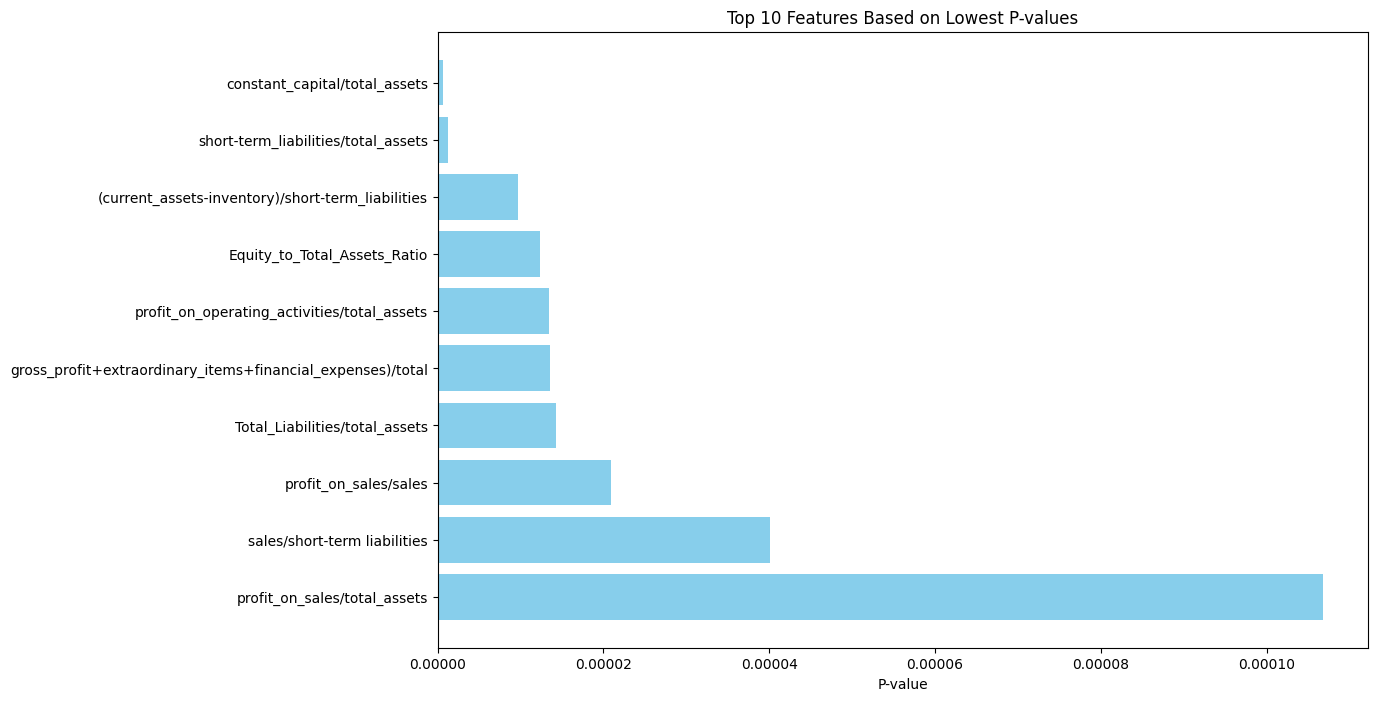

In [378]:
# Initialize a list to store the p-values and column names
p_values_list = []

# Perform logistic regression
for col in continuous_columns:
    X = Bankrupt_model2[col]
    y = Bankrupt_model2['class'].cat.codes  # Convert categorical 'class' to numerical codes

    # Add constant to X
    X = sm.add_constant(X)

    # Fit logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()

    # Get the p-value for the predictor variable (the column)
    p_val = result.pvalues[col]

    # Append the p-value and column name to the list
    p_values_list.append((col, p_val))

# Sort the list by p-value
p_values_list.sort(key=lambda x: x[1])

# Extract the top 15 features based on lowest p-values
top_features = p_values_list[:10]

# Extract feature names and p-values for plotting
feature_names = [col for col, _ in top_features]
p_values = [p_val for _, p_val in top_features]

# Display the top 10 features
print("Top 10 features based on lowest p-values:")
print(feature_names)

# Plotting the top 15 features based on their p-values
plt.figure(figsize=(12, 8))
plt.barh(feature_names, p_values, color='skyblue')
plt.xlabel('P-value')
plt.title('Top 10 Features Based on Lowest P-values')
plt.gca().invert_yaxis()
plt.show()

###Random Forest testing for Feature Selection

                                                                            importance
Cash_to_Financial_Expense                                                        0.093
Cash_to_assets                                                                   0.088
cash_to_interest                                                                 0.075
Total_liabilities_to_Cash                                                        0.047
Interest_to_cash                                                                 0.026
(current_assets-inventory)/short-term_liabilities                                0.018
gross_profit(in3years)/total_assets                                              0.018
Financial_expense_to_operating                                                   0.017
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))       0.015
(total_liabilities∗365)/(gross_profit+depreciation)                              0.015


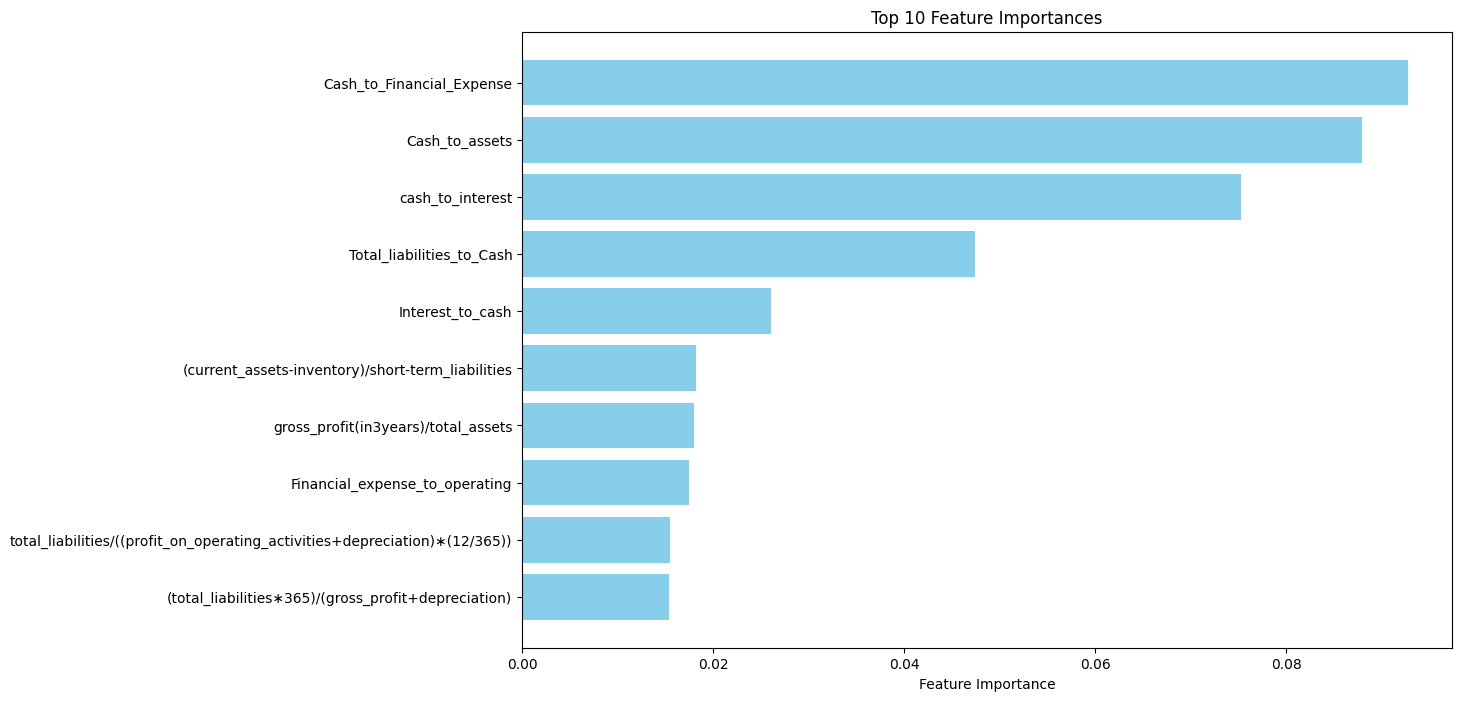

In [379]:
# Define features (X) and target (y)
X = Bankrupt_model2.drop('class', axis=1)
y = Bankrupt_model2['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=4)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index[:10], feature_importances['importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

###Preparing New Dataset for testing

In [380]:
Bankrupt_model2 = polish_Dataset[['year',
    'Cash_to_Financial_Expense',
    'Cash_to_assets',
    'cash_to_interest',
    'Total_liabilities_to_Cash',
    'Interest_to_cash',
    '(current_assets-inventory)/short-term_liabilities',
    'gross_profit(in3years)/total_assets',
    'Financial_expense_to_operating',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    '(total_liabilities∗365)/(gross_profit+depreciation)',
                                  'class'
]]
Bankrupt_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 12 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   year                                                                        43405 non-null  int64   
 1   Cash_to_Financial_Expense                                                   37567 non-null  float64 
 2   Cash_to_assets                                                              43270 non-null  float64 
 3   cash_to_interest                                                            23529 non-null  float64 
 4   Total_liabilities_to_Cash                                                   43238 non-null  float64 
 5   Interest_to_cash                                                            23511 non-null  float64 
 6   (current_assets-inventory)/short-term_

###Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

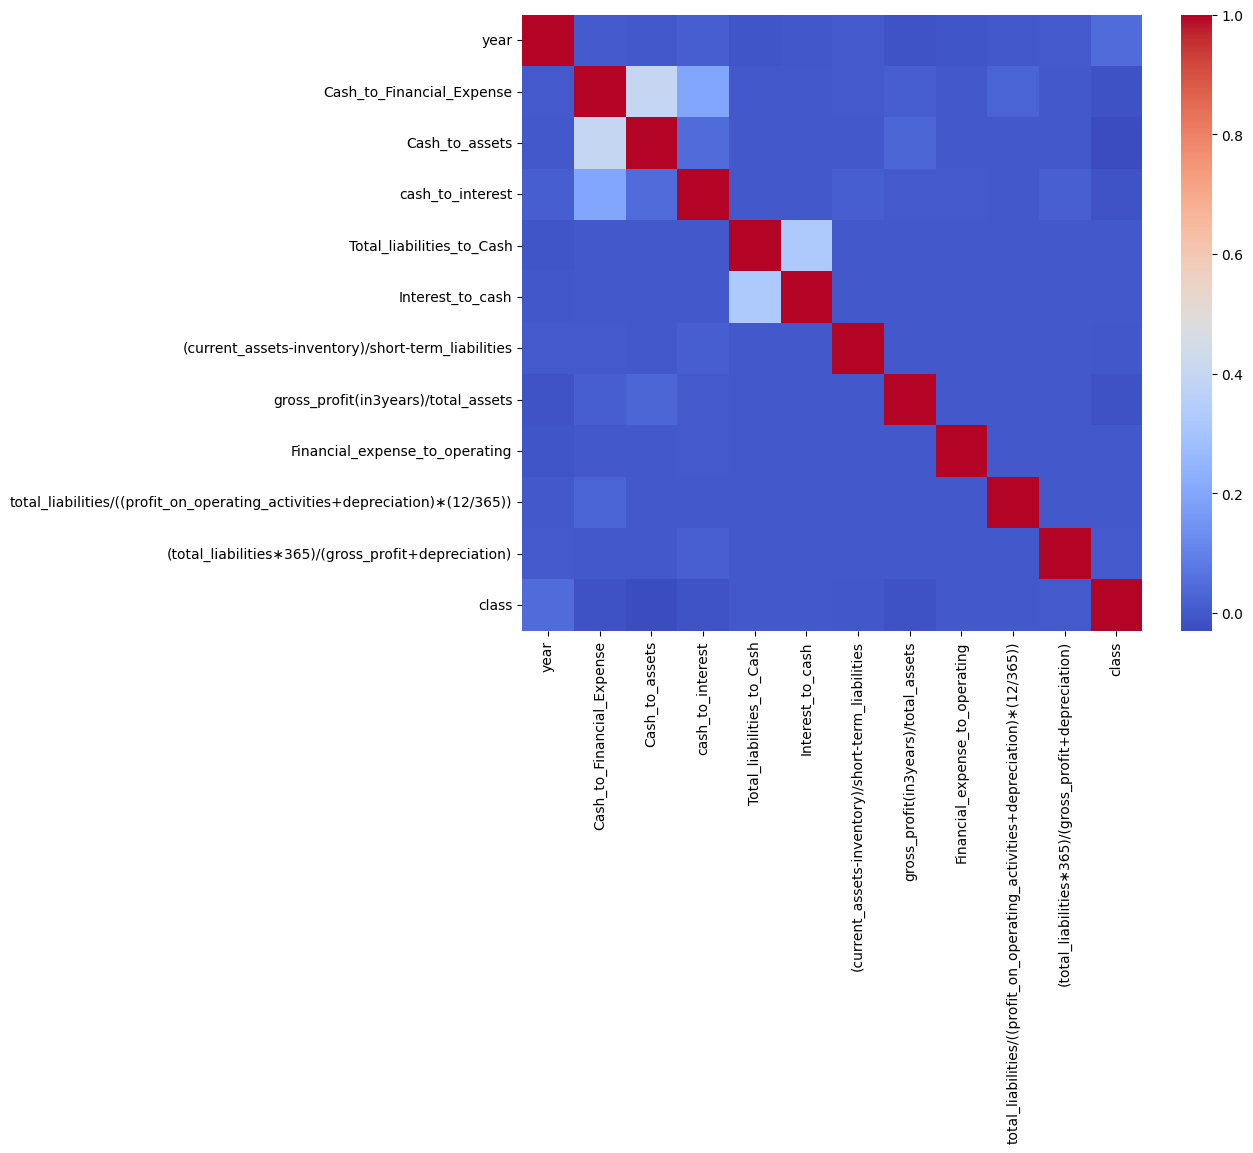

In [381]:
plt.figure(figsize=(10, 8))
sns.heatmap(Bankrupt_model2.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.show

###Review and remove outliers

In [382]:
pd.options.display.float_format = "{:.3f}".format
Bankrupt_model2.describe()

year  Cash_to_Financial_Expense  Cash_to_assets  cash_to_interest  \
count 43405.000                  37567.000       43270.000         23529.000   
mean      2.940                   1602.862          -1.694          1535.972   
std       1.284                  84176.481         331.746         15145.109   
min       1.000               -5282808.239      -62701.320       -103000.374   
25%       2.000                      0.089           0.006             0.322   
50%       3.000                      0.717           0.037             2.203   
75%       4.000                      4.571           0.130            21.143   
max       5.000               13597750.957       12643.204        738251.408   

       Total_liabilities_to_Cash  Interest_to_cash  \
count                  43238.000         23511.000   
mean                    2881.205           617.736   
std                   787900.726        115662.865   
min                -64078999.678      -5855701.082   
25%                        1.105             0.015   
50%                        6.574             0.257   
75%                       33.245             1.585   
max                140981668.045      15987106.466   

       (current_assets-inventory)/short-term_liabilities  gross_profit(in3years)/total_assets  \
count                                          43270.000                            42483.000   
mean                                               5.429                                0.270   
std                                              295.356                                7.988   
min                                             -101.260                             -463.890   
25%                                                0.607                                0.021   
50%                                                1.027                                0.155   
75%                                                1.911                                0.356   
max                                            53433.000                              831.660   

       Financial_expense_to_operating  \
count                       37635.000   
mean                            0.347   
std                           316.997   
min                        -59197.589   
25%                             0.004   
50%                             0.248   
75%                             1.279   
max                          5554.244   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  \
count                                                                   42651.000   
mean                                                                        7.723   
std                                                                      1399.951   
min                                                                     -1234.400   
25%                                                                         0.027   
50%                                                                         0.086   
75%                                                                         0.206   
max                                                                    289000.000   

       (total_liabilities∗365)/(gross_profit+depreciation)  
count                                            43369.000  
mean                                              1991.390  
std                                              96345.988  
min                                           -9632400.000  
25%                                                222.580  
50%                                                846.260  
75%                                               2226.900  
max                                           10200000.000

In [383]:
#adjusting for outliers
numeric_cols = Bankrupt_model2.select_dtypes(include=[float]).columns
numeric_cols

Index(['Cash_to_Financial_Expense', 'Cash_to_assets', 'cash_to_interest',
       'Total_liabilities_to_Cash', 'Interest_to_cash',
       '(current_assets-inventory)/short-term_liabilities', 'gross_profit(in3years)/total_assets',
       'Financial_expense_to_operating',
       'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
       '(total_liabilities∗365)/(gross_profit+depreciation)'],
      dtype='object')

In [384]:
#adjusting for outliers
numeric_cols = Bankrupt_model2.select_dtypes(include=[float, int]).columns
# Calculate Q1, Q3, and IQR for each column
Q1 = Bankrupt_model2[numeric_cols].quantile(0.25)
Q3 = Bankrupt_model2[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Create a boolean DataFrame indicating whether each value is an outlier
outliers = (Bankrupt_model2[numeric_cols] < lower_bound) | (Bankrupt_model2[numeric_cols] > upper_bound)

# Filter rows that contain any outliers
rows_with_outliers = outliers.any(axis=1)
Bankruptcleaned_model = Bankrupt_model2[~rows_with_outliers]

Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20514 entries, 0 to 43404
Data columns (total 12 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   year                                                                        20514 non-null  int64   
 1   Cash_to_Financial_Expense                                                   17927 non-null  float64 
 2   Cash_to_assets                                                              20482 non-null  float64 
 3   cash_to_interest                                                            10468 non-null  float64 
 4   Total_liabilities_to_Cash                                                   20471 non-null  float64 
 5   Interest_to_cash                                                            10465 non-null  float64 
 6   (current_assets-inventory)/short-term_liabi

In [385]:
print(len(Bankrupt_model2))
print(len(Bankruptcleaned_model))

43405
20514


In [386]:
for column in Bankruptcleaned_model.columns:
  countzero = (Bankruptcleaned_model[column] == 0).sum()
  print(f"{column} has {countzero} zero values")

year has 0 zero values
Cash_to_Financial_Expense has 3 zero values
Cash_to_assets has 11 zero values
cash_to_interest has 3 zero values
Total_liabilities_to_Cash has 11 zero values
Interest_to_cash has 0 zero values
(current_assets-inventory)/short-term_liabilities has 0 zero values
gross_profit(in3years)/total_assets has 14 zero values
Financial_expense_to_operating has 10 zero values
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365)) has 33 zero values
(total_liabilities∗365)/(gross_profit+depreciation) has 30 zero values
class has 19616 zero values


In [387]:
length=len(Bankruptcleaned_model['class'])
print(f"total number of rows is: {length}")

total number of rows is: 20514


In [388]:
nulls=Bankruptcleaned_model.isnull().sum()
nulls

year                                                                              0
Cash_to_Financial_Expense                                                      2587
Cash_to_assets                                                                   32
cash_to_interest                                                              10046
Total_liabilities_to_Cash                                                        43
Interest_to_cash                                                              10049
(current_assets-inventory)/short-term_liabilities                                47
gross_profit(in3years)/total_assets                                             370
Financial_expense_to_operating                                                 2563
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))      333
(total_liabilities∗365)/(gross_profit+depreciation)                               8
class                                                                       

In [389]:
percentage_nulls=nulls/length*100
percentage_nulls
#to determine % of null per attribute. anything over 10% will be removed. The remainder will use random forest imputation.

year                                                                          0.000
Cash_to_Financial_Expense                                                    12.611
Cash_to_assets                                                                0.156
cash_to_interest                                                             48.971
Total_liabilities_to_Cash                                                     0.210
Interest_to_cash                                                             48.986
(current_assets-inventory)/short-term_liabilities                             0.229
gross_profit(in3years)/total_assets                                           1.804
Financial_expense_to_operating                                               12.494
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    1.623
(total_liabilities∗365)/(gross_profit+depreciation)                           0.039
class                                                                       

In [390]:
percentage_nulls[percentage_nulls>5]

Cash_to_Financial_Expense        12.611
cash_to_interest                 48.971
Interest_to_cash                 48.986
Financial_expense_to_operating   12.494
dtype: float64

In [391]:
Bankruptcleaned_model.drop([
     'Cash_to_Financial_Expense',
    'cash_to_interest',
    'Interest_to_cash',
    'Financial_expense_to_operating'
],axis=1,inplace=True)

<ipython-input-391-c136147fc934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankruptcleaned_model.drop([


In [392]:
Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20514 entries, 0 to 43404
Data columns (total 8 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   year                                                                        20514 non-null  int64   
 1   Cash_to_assets                                                              20482 non-null  float64 
 2   Total_liabilities_to_Cash                                                   20471 non-null  float64 
 3   (current_assets-inventory)/short-term_liabilities                           20467 non-null  float64 
 4   gross_profit(in3years)/total_assets                                         20144 non-null  float64 
 5   total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  20181 non-null  float64 
 6   (total_liabilities∗365)/(gross_profit+deprec

In [393]:
 nulls=Bankruptcleaned_model.isnull().sum()
 nulls

year                                                                            0
Cash_to_assets                                                                 32
Total_liabilities_to_Cash                                                      43
(current_assets-inventory)/short-term_liabilities                              47
gross_profit(in3years)/total_assets                                           370
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    333
(total_liabilities∗365)/(gross_profit+depreciation)                             8
class                                                                           0
dtype: int64

In [394]:
nulls/length*100

year                                                                         0.000
Cash_to_assets                                                               0.156
Total_liabilities_to_Cash                                                    0.210
(current_assets-inventory)/short-term_liabilities                            0.229
gross_profit(in3years)/total_assets                                          1.804
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))   1.623
(total_liabilities∗365)/(gross_profit+depreciation)                          0.039
class                                                                        0.000
dtype: float64

###Imputation Models

In [395]:
#using 2 different methods of imputation to see which one works best
Bankrupt_modelMMM=Bankruptcleaned_model.copy()
Bankrupt_modelRF=Bankruptcleaned_model.copy()

In [439]:
# Columns with missing values in your bankrupt_model dataset
columns_with_missing = [
    'Cash_to_assets',
    'Total_liabilities_to_Cash',
    '(current_assets-inventory)/short-term_liabilities',
    'gross_profit(in3years)/total_assets',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    '(total_liabilities∗365)/(gross_profit+depreciation)',
                                  'class'
]



In [440]:
# Perform imputation (example using SimpleImputer with mean)
imputer = SimpleImputer(strategy='mean')
Bankrupt_modelMMM[columns_with_missing] = imputer.fit_transform(Bankrupt_modelMMM[columns_with_missing])

In [441]:
#perfomring imputation with Random Forest
estimator = RandomForestRegressor(n_estimators=3, max_depth= 3)
imputer = IterativeImputer(estimator=estimator, random_state=0)
Bankrupt_modelRF[columns_with_missing] = imputer.fit_transform(Bankrupt_modelRF[columns_with_missing])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [442]:
Bankrupt_modelMMM.isnull().sum()

year                                                                          0
Cash_to_assets                                                                0
Total_liabilities_to_Cash                                                     0
(current_assets-inventory)/short-term_liabilities                             0
gross_profit(in3years)/total_assets                                           0
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    0
(total_liabilities∗365)/(gross_profit+depreciation)                           0
class                                                                         0
dtype: int64

In [443]:
Bankrupt_modelMMM.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  \
count 20514.000       20514.000                  20514.000   
mean      2.895           0.076                     16.097   
std       1.300           0.097                     29.759   
min       1.000          -0.365                    -95.119   
25%       2.000           0.014                      2.210   
50%       3.000           0.043                      7.858   
75%       4.000           0.108                     23.642   
max       5.000           0.501                    129.648   

       (current_assets-inventory)/short-term_liabilities  gross_profit(in3years)/total_assets  \
count                                          20514.000                            20514.000   
mean                                               1.359                                0.227   
std                                                1.042                                0.295   
min                                               -0.343                               -0.976   
25%                                                0.664                                0.068   
50%                                                1.045                                0.206   
75%                                                1.698                                0.374   
max                                                5.813                                1.357   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  \
count                                                                   20514.000   
mean                                                                        0.097   
std                                                                         0.145   
min                                                                        -0.510   
25%                                                                         0.035   
50%                                                                         0.079   
75%                                                                         0.148   
max                                                                         0.742   

       (total_liabilities∗365)/(gross_profit+depreciation)     class  
count                                            20514.000 20514.000  
mean                                              1175.728     0.044  
std                                               1726.715     0.205  
min                                              -5787.200     0.000  
25%                                                359.753     0.000  
50%                                                867.010     0.000  
75%                                               1804.300     0.000  
max                                               8227.800     1.000

In [444]:
Bankrupt_modelRF.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  \
count 20514.000       20514.000                  20514.000   
mean      2.895           0.076                     16.141   
std       1.300           0.097                     29.794   
min       1.000          -0.365                    -95.119   
25%       2.000           0.014                      2.210   
50%       3.000           0.043                      7.858   
75%       4.000           0.108                     23.670   
max       5.000           0.501                    129.648   

       (current_assets-inventory)/short-term_liabilities  gross_profit(in3years)/total_assets  \
count                                          20514.000                            20514.000   
mean                                               1.360                                0.228   
std                                                1.043                                0.296   
min                                               -0.343                               -0.976   
25%                                                0.664                                0.068   
50%                                                1.043                                0.200   
75%                                                1.704                                0.379   
max                                                5.813                                1.357   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  \
count                                                                   20514.000   
mean                                                                        0.097   
std                                                                         0.145   
min                                                                        -0.510   
25%                                                                         0.035   
50%                                                                         0.078   
75%                                                                         0.150   
max                                                                         0.742   

       (total_liabilities∗365)/(gross_profit+depreciation)     class  
count                                            20514.000 20514.000  
mean                                              1175.751     0.044  
std                                               1726.808     0.205  
min                                              -5787.200     0.000  
25%                                                359.753     0.000  
50%                                                866.290     0.000  
75%                                               1805.550     0.000  
max                                               8227.800     1.000

In [445]:
Bankrupt_modelRF.isnull().sum()

year                                                                          0
Cash_to_assets                                                                0
Total_liabilities_to_Cash                                                     0
(current_assets-inventory)/short-term_liabilities                             0
gross_profit(in3years)/total_assets                                           0
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    0
(total_liabilities∗365)/(gross_profit+depreciation)                           0
class                                                                         0
dtype: int64

In [446]:
Bankrupt_modelRF['class'].value_counts()

class
0.000    19616
1.000      898
Name: count, dtype: int64

In [447]:
Bankrupt_model2 =Bankrupt_modelRF

In [431]:
Bankrupt_model2.isnull().sum()

year                                                                          0
Cash_to_assets                                                                0
Total_liabilities_to_Cash                                                     0
(current_assets-inventory)/short-term_liabilities                             0
gross_profit(in3years)/total_assets                                           0
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    0
(total_liabilities∗365)/(gross_profit+depreciation)                           8
class                                                                         0
dtype: int64

##Year 3

In [91]:
#year 3
Bankrupt_model3= polish_Dataset.loc[polish_Dataset['year']== ]
Bankrupt_model3 = polish_Dataset.drop(['year'],axis=1)
Bankrupt_model3.head()

year  net_profit/total assets  Total_Liabilities/total_assets  \
17200     3                 0.174190                         0.41299   
17201     3                 0.146240                         0.46038   
17202     3                 0.000595                         0.22612   
17203     3                 0.024526                         0.43236   
17204     3                 0.188290                         0.41504   

       Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
17200                                0.14371         1.3480                  -28.9820   
17201                                0.28230         1.6294                    2.5952   
17202                                0.48839         3.1599                   84.8740   
17203                                0.27546         1.7833                  -10.1050   
17204                                0.34231         1.9279                  -58.2740   

       Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
17200                                  0.60383                               0.219460   
17201                                  0.00000                               0.171850   
17202                                  0.19114                               0.004572   
17203                                  0.56944                               0.024526   
17204                                  0.00000                               0.233580   

       book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
17200                                  1.1225                1.1961                       0.46359   
17201                                  1.1721                1.6018                       0.53962   
17202                                  2.9881                1.0077                       0.67566   
17203                                  1.3057                1.0509                       0.56453   
17204                                  1.4094                1.3393                       0.58496   

       gross_profit+extraordinary_items+financial_expenses)/total  \
17200                                                    0.219460   
17201                                                    0.175790   
17202                                                    0.004572   
17203                                                    0.024526   
17204                                                    0.238810   

       gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
17200                             0.531390                           0.142330   
17201                             0.383170                           0.126470   
17202                             0.020219                           0.030966   
17203                             0.069747                           0.036812   
17204                             0.633170                           0.187800   

       (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
17200                              0.219460                                               592.24   
17201                              0.171850                                               829.46   
17202                              0.004572                                              2094.10   
17203                              0.024526                                              3299.40   
17204                              0.233580                                               602.31   

       (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
17200                                        0.61630                          2.4213   
17201                                        0.44004                          2.1721   
17202                                        0.17430                          4.4225   
17203                                     

In [96]:
Bankrupt_model3['class'].value_counts()

class
0    10008
1      495
Name: count, dtype: int64

In [201]:
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Handle missing values by dropping rows with missing data
Bankrupt_model3 = Bankrupt_model3.dropna()

# Ensure 'class' is categorical
Bankrupt_model3['class'] = Bankrupt_model3['class'].astype('category')

# List of continuous columns
continuous_columns = [
    'net_profit/total assets', 'Total_Liabilities/total_assets', 'Working_Capital_to_Total_Assets_Ratio',
    'Current_Ratio', 'Defensive_Interval_Ratio', 'Retained_Earnings_to_Total_Assets_Ratio',
    'Operating_Income_to_Total_Asset_ratio', 'book_value_of_equity/total_liabilities', 'Asset_Turnover_Ratio',
    'Equity_to_Total_Assets_Ratio', 'gross_profit+extraordinary_items+financial_expenses)/total',
    'gross_profit/short-term_liabilities', '(gross_profit+depreciation)/sales',
    '(gross_profit+interest)/total_assets', '(total_liabilities∗365)/(gross_profit+depreciation)',
    '(gross profit+depreciation)/total_liabilities', 'total_assets/total_liabilities',
    'gross_profit/total_assets', 'gross_profit/sales', '(inventory∗365)/sales', 'sales(n)/sales(n-1)',
    'profit_on_operating_activities/total_assets', 'net_profit/sales', 'gross_profit(in3years)/total_assets',
    '(equity-share_capital)/total_assets', '(net_profit+depreciation)/total_liabilities',
    'profit_on_operating_activities/financial_expenses', 'working_capital/fixed_assets',
    'logarithm_of_total_assets', '(total_liabilities-cash)/sales', '(gross_profit+interest)/sales',
    '(current_liabilities∗365)/cost_of_products_sold', 'operating_expenses/short-term_liabilities',
    'operating_expenses_/_total_liabilities', 'profit_on_sales/total_assets', 'total_sales/total_assets',
    '(current_assets-inventories)/long-term_liabilities', 'constant_capital/total_assets',
    'profit_on_sales/sales', '(current_assets-inventory-receivables)/short-term liabilities',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    'profit_on_operating_activities/sales', 'rotation_receivables+inventory_turnover_in_days',
    '(receivables∗365)/sales', 'net_profit/inventory', '(current_assets-inventory)/short-term_liabilities',
    '(inventory∗365)/cost_of_products_sold', 'EBITDA_(profit_on_operating_activities-depreciation)/total_assets',
    'EBITDA_(profit_on_operating_activities-depreciation)/sales', 'current_assets/total_liabilities',
    'short-term_liabilities/total_assets', '(short-term_liabilities∗365)/cost_of_products_sold)',
    'equity/fixed_assets', 'constant_capital/fixed_assets', 'working_capital', '(sales-cost_of_products_sold)/sales',
    '(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)',
    'total_costs/total_sales', 'long-term_liabilities/equity', 'sales/inventory', 'sales/receivables',
    '(short-term_liabilities∗365)/sales', 'sales/short-term liabilities', 'sales/fixed assets',
    'Interest_to_Sales', 'Cash_to_assets', 'Total_liabilities_to_Cash', 'cash_to_interest', 'Interest_to_cash',
    'Financial_Expense_To_Total_Asset', 'Financial_expense_to_operating', 'Debt_Coverage_Ratio',
    'Operating_income_Margin', 'Cash_conversion_cycle', 'Cash_to_Financial_Expense', 'Financial_Leverage',
    'Return_On_equity'
]


<ipython-input-201-9143ec34fd88>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankrupt_model3['class'] = Bankrupt_model3['class'].astype('category')


###Logistic Regression testing for Feature Selection

Optimization terminated successfully.
         Current function value: 0.177999
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.177667
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.177570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.176086
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.180373
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.179203
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.177800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.175650
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.180134
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.177684
 

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.177464
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.179478
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.177473
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.179889
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180374
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.174738
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180133
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.177638
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.180392
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.179809
 

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.180059
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.180392
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.176277
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.180378
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.180360
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180392
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180378
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.180377
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180386
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180362
  

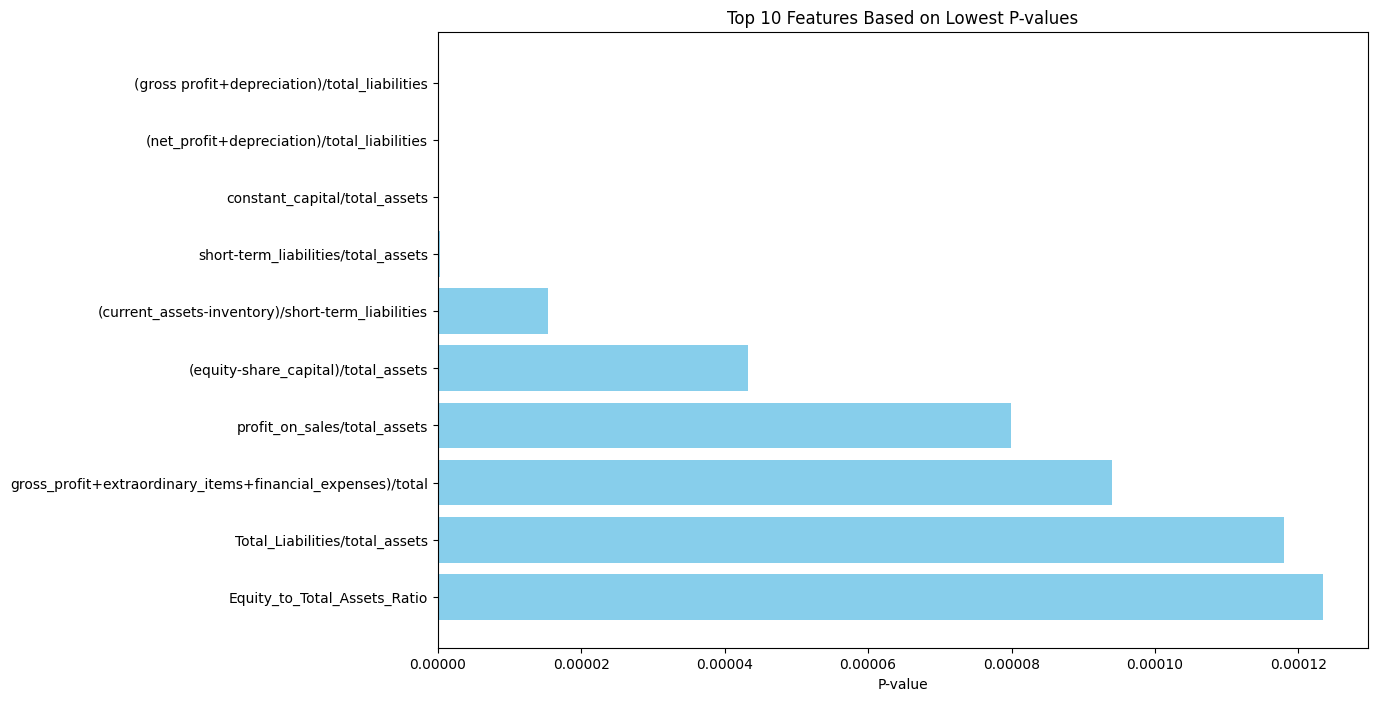

In [202]:
# Initialize a list to store the p-values and column names
p_values_list = []

# Perform logistic regression
for col in continuous_columns:
    X = Bankrupt_model3[col]
    y = Bankrupt_model3['class'].cat.codes  # Convert categorical 'class' to numerical codes

    # Add constant to X
    X = sm.add_constant(X)

    # Fit logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()

    # Get the p-value for the predictor variable (the column)
    p_val = result.pvalues[col]

    # Append the p-value and column name to the list
    p_values_list.append((col, p_val))

# Sort the list by p-value
p_values_list.sort(key=lambda x: x[1])

# Extract the top 15 features based on lowest p-values
top_features = p_values_list[:10]

# Extract feature names and p-values for plotting
feature_names = [col for col, _ in top_features]
p_values = [p_val for _, p_val in top_features]

# Display the top 10 features
print("Top 10 features based on lowest p-values:")
print(feature_names)

# Plotting the top 15 features based on their p-values
plt.figure(figsize=(12, 8))
plt.barh(feature_names, p_values, color='skyblue')
plt.xlabel('P-value')
plt.title('Top 10 Features Based on Lowest P-values')
plt.gca().invert_yaxis()
plt.show()

###Random Forest testing for Feature Selection

                                                                            importance
Cash_to_Financial_Expense                                                        0.091
Cash_to_assets                                                                   0.083
cash_to_interest                                                                 0.077
Total_liabilities_to_Cash                                                        0.044
Interest_to_cash                                                                 0.031
(total_liabilities∗365)/(gross_profit+depreciation)                              0.022
(current_assets-inventory)/short-term_liabilities                                0.021
total_costs/total_sales                                                          0.019
constant_capital/fixed_assets                                                    0.019
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))       0.015


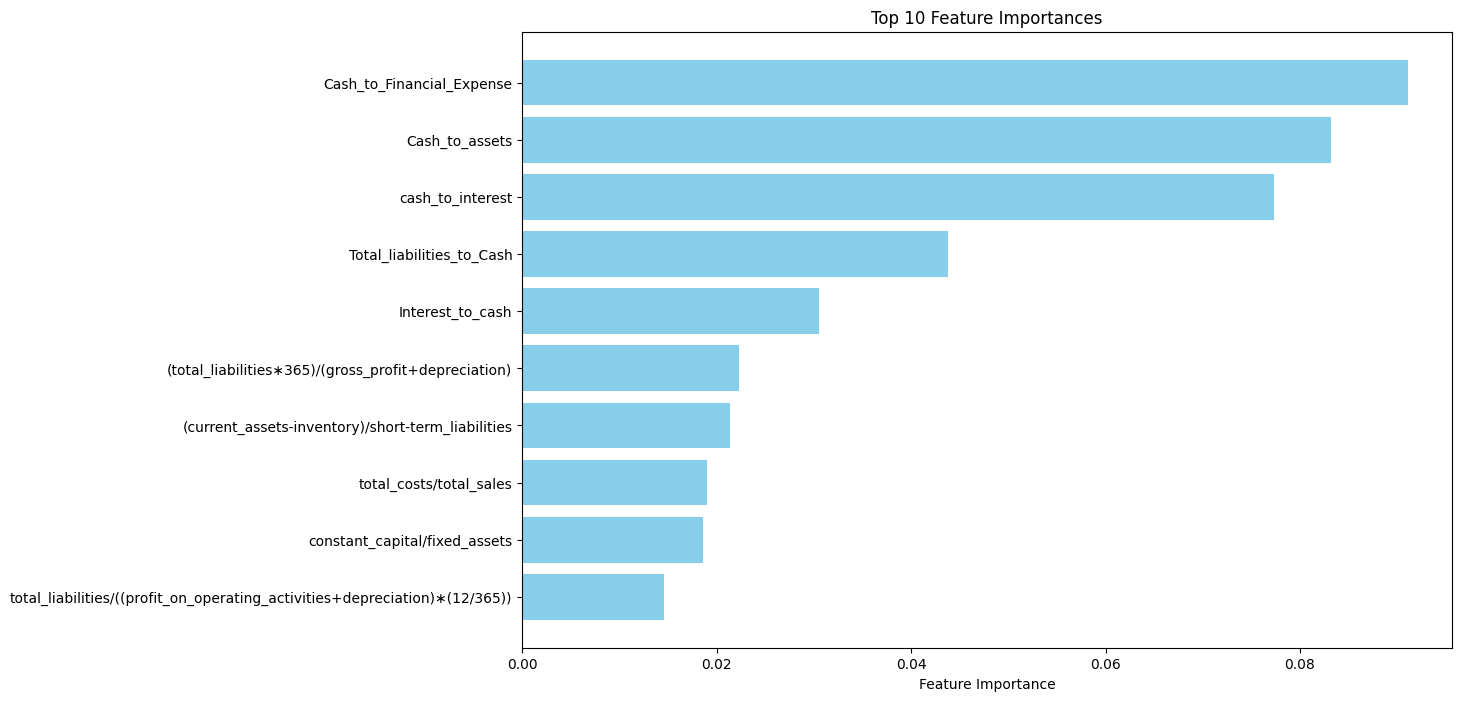

In [203]:
# Define features (X) and target (y)
X = Bankrupt_model3.drop('class', axis=1)
y = Bankrupt_model3['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=4)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index[:10], feature_importances['importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

###Preparing New Dataset for testing

In [214]:
Bankrupt_model3 = polish_Dataset[ ['year',
    'Cash_to_Financial_Expense',
    'Cash_to_assets',
    'cash_to_interest',
    'Total_liabilities_to_Cash',
    'Interest_to_cash',
    '(total_liabilities∗365)/(gross_profit+depreciation)',
    '(current_assets-inventory)/short-term_liabilities',
    'total_costs/total_sales',
    'constant_capital/fixed_assets',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    'class'
]]
Bankrupt_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 12 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   year                                                                        43405 non-null  int64   
 1   Cash_to_Financial_Expense                                                   37567 non-null  float64 
 2   Cash_to_assets                                                              43270 non-null  float64 
 3   cash_to_interest                                                            23529 non-null  float64 
 4   Total_liabilities_to_Cash                                                   43238 non-null  float64 
 5   Interest_to_cash                                                            23511 non-null  float64 
 6   (total_liabilities∗365)/(gross_profit+

###Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

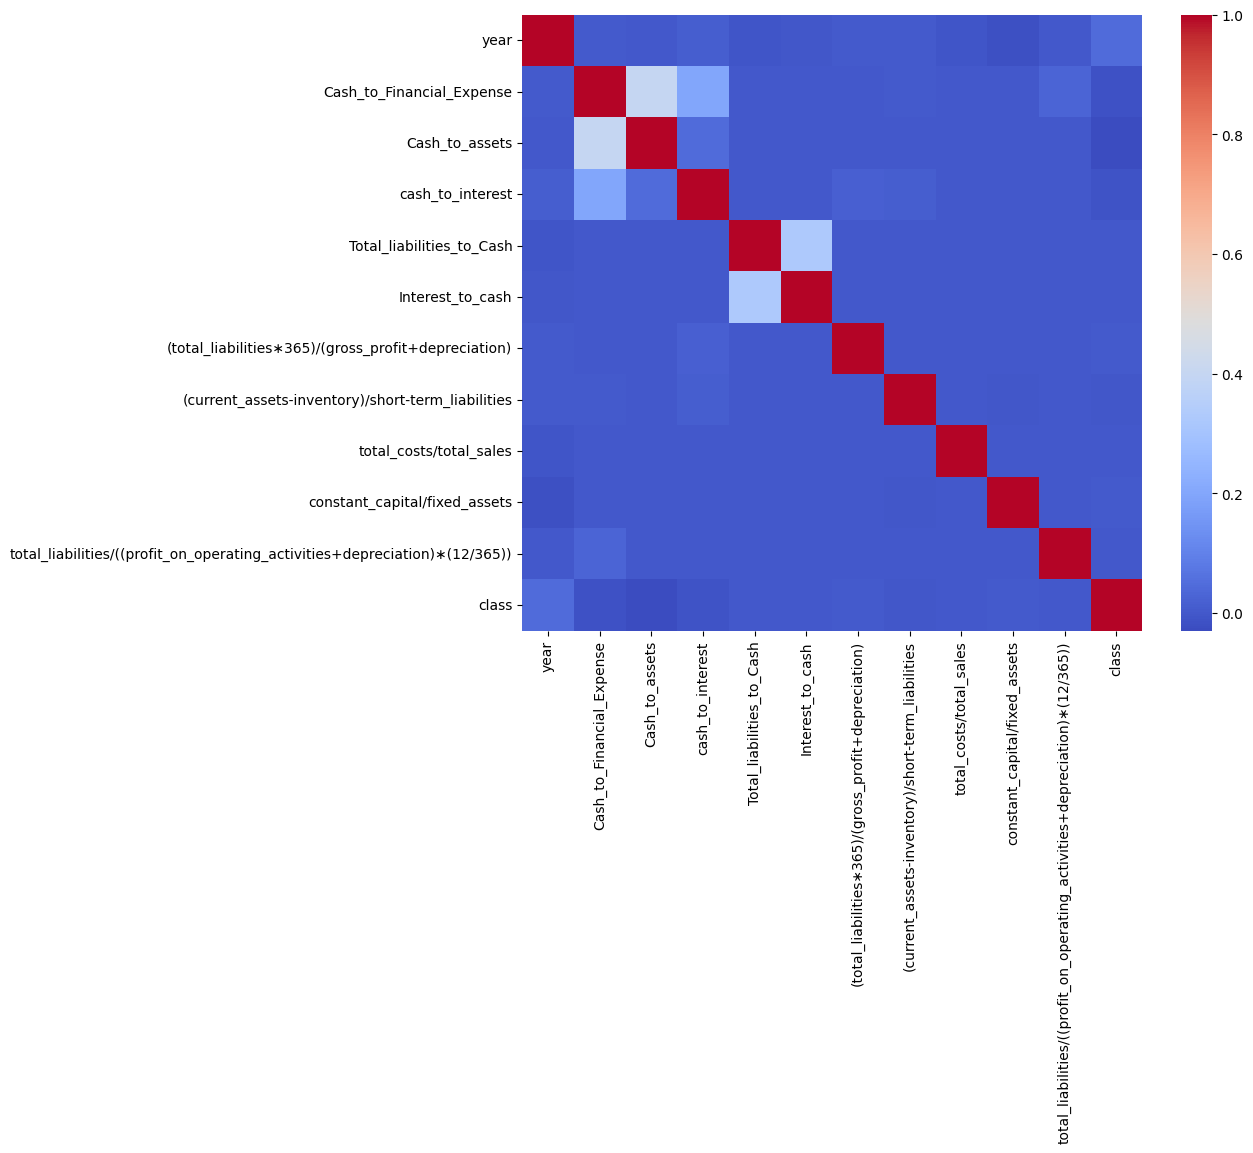

In [215]:
plt.figure(figsize=(10, 8))
sns.heatmap(Bankrupt_model3.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.show

###Review and remove outliers

In [216]:
pd.options.display.float_format = "{:.3f}".format
Bankrupt_model3.describe()

year  Cash_to_Financial_Expense  Cash_to_assets  cash_to_interest  \
count 43405.000                  37567.000       43270.000         23529.000   
mean      2.940                   1602.862          -1.694          1535.972   
std       1.284                  84176.481         331.746         15145.109   
min       1.000               -5282808.239      -62701.320       -103000.374   
25%       2.000                      0.089           0.006             0.322   
50%       3.000                      0.717           0.037             2.203   
75%       4.000                      4.571           0.130            21.143   
max       5.000               13597750.957       12643.204        738251.408   

       Total_liabilities_to_Cash  Interest_to_cash  \
count                  43238.000         23511.000   
mean                    2881.205           617.736   
std                   787900.726        115662.865   
min                -64078999.678      -5855701.082   
25%                        1.105             0.015   
50%                        6.574             0.257   
75%                       33.245             1.585   
max                140981668.045      15987106.466   

       (total_liabilities∗365)/(gross_profit+depreciation)  \
count                                            43369.000   
mean                                              1991.390   
std                                              96345.988   
min                                           -9632400.000   
25%                                                222.580   
50%                                                846.260   
75%                                               2226.900   
max                                           10200000.000   

       (current_assets-inventory)/short-term_liabilities  total_costs/total_sales  \
count                                          43270.000                43321.000   
mean                                               5.429                   30.026   
std                                              295.356                 5334.454   
min                                             -101.260                 -198.690   
25%                                                0.607                    0.875   
50%                                                1.027                    0.951   
75%                                                1.911                    0.993   
max                                            53433.000              1108300.000   

       constant_capital/fixed_assets  \
count                      42593.000   
mean                          24.655   
std                         1220.884   
min                        -3828.900   
25%                            0.956   
50%                            1.377   
75%                            2.370   
max                       180440.000   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  
count                                                                   42651.000  
mean                                                                        7.723  
std                                                                      1399.951  
min                                                                     -1234.400  
25%                                                                         0.027  
50%                                                                         0.086  
75%                                                                         0.206  
max                                                                    289000.000

In [217]:
#adjusting for outliers
numeric_cols = Bankrupt_model1.select_dtypes(include=[float]).columns
numeric_cols

Index(['Cash_to_Financial_Expense', 'Cash_to_assets', 'cash_to_interest',
       'Total_liabilities_to_Cash', 'Interest_to_cash',
       '(total_liabilities∗365)/(gross_profit+depreciation)',
       '(current_assets-inventory)/short-term_liabilities', 'total_costs/total_sales',
       'constant_capital/fixed_assets',
       'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))'],
      dtype='object')

In [218]:
#adjusting for outliers
numeric_cols = Bankrupt_model3.select_dtypes(include=[float, int]).columns
# Calculate Q1, Q3, and IQR for each column
Q1 = Bankrupt_model3[numeric_cols].quantile(0.25)
Q3 = Bankrupt_model3[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Create a boolean DataFrame indicating whether each value is an outlier
outliers = (Bankrupt_model3[numeric_cols] < lower_bound) | (Bankrupt_model3[numeric_cols] > upper_bound)

# Filter rows that contain any outliers
rows_with_outliers = outliers.any(axis=1)
Bankruptcleaned_model = Bankrupt_model3[~rows_with_outliers]

Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21154 entries, 0 to 43404
Data columns (total 12 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   year                                                                        21154 non-null  int64   
 1   Cash_to_Financial_Expense                                                   19279 non-null  float64 
 2   Cash_to_assets                                                              21126 non-null  float64 
 3   cash_to_interest                                                            9617 non-null   float64 
 4   Total_liabilities_to_Cash                                                   21121 non-null  float64 
 5   Interest_to_cash                                                            9616 non-null   float64 
 6   (total_liabilities∗365)/(gross_profit+depre

In [219]:
print(len(Bankrupt_model3))
print(len(Bankruptcleaned_model))

43405
21154


In [220]:
Bankruptcleaned_model.describe()

year  Cash_to_Financial_Expense  Cash_to_assets  cash_to_interest  \
count 21154.000                  19279.000       21126.000          9617.000   
mean      2.898                      1.850           0.070             6.433   
std       1.307                      3.165           0.092            11.530   
min       1.000                    -12.839          -0.364           -45.133   
25%       2.000                      0.175           0.013             0.785   
50%       3.000                      0.665           0.039             2.321   
75%       4.000                      2.028           0.100             6.946   
max       5.000                     18.005           0.501            83.456   

       Total_liabilities_to_Cash  Interest_to_cash  \
count                  21121.000          9616.000   
mean                      15.993             0.778   
std                       30.815             1.167   
min                      -95.252            -4.693   
25%                        2.228             0.119   
50%                        8.079             0.367   
75%                       24.629             1.073   
max                      129.648             6.267   

       (total_liabilities∗365)/(gross_profit+depreciation)  \
count                                            21147.000   
mean                                              1420.519   
std                                               1833.085   
min                                              -5787.200   
25%                                                441.845   
50%                                               1025.000   
75%                                               2140.200   
max                                               8235.100   

       (current_assets-inventory)/short-term_liabilities  total_costs/total_sales  \
count                                          21124.000                21132.000   
mean                                               1.301                    0.936   
std                                                1.007                    0.102   
min                                               -0.343                    0.524   
25%                                                0.639                    0.893   
50%                                                0.997                    0.951   
75%                                                1.605                    0.986   
max                                                5.813                    1.344   

       constant_capital/fixed_assets  \
count                      20967.000   
mean                           1.593   
std                            1.091   
min                           -3.232   
25%                            0.978   
50%                            1.312   
75%                            1.901   
max                            6.607   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  
count                                                                   20910.000  
mean                                                                        0.112  
std                                                                         0.146  
min                                                                        -0.510  
25%                                                                         0.041  
50%                                                                         0.090  
75%                                                                         0.171  
max                                                                         0.742

In [221]:
Bankruptcleaned_model.corr()

year  \
year                                                                        1.000   
Cash_to_Financial_Expense                                                   0.008   
Cash_to_assets                                                              0.002   
cash_to_interest                                                            0.008   
Total_liabilities_to_Cash                                                  -0.006   
Interest_to_cash                                                           -0.001   
(total_liabilities∗365)/(gross_profit+depreciation)                         0.019   
(current_assets-inventory)/short-term_liabilities                           0.033   
total_costs/total_sales                                                     0.049   
constant_capital/fixed_assets                                               0.020   
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  0.003   
class                                                                       0.026   

                                                                            Cash_to_Financial_Expense  \
year                                                                                            0.008   
Cash_to_Financial_Expense                                                                       1.000   
Cash_to_assets                                                                                  0.410   
cash_to_interest                                                                                0.514   
Total_liabilities_to_Cash                                                                      -0.122   
Interest_to_cash                                                                               -0.382   
(total_liabilities∗365)/(gross_profit+depreciation)                                            -0.067   
(current_assets-inventory)/short-term_liabilities                                               0.231   
total_costs/total_sales                                                                        -0.115   
constant_capital/fixed_assets                                                                   0.159   
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))                     -0.034   
class                                                                                          -0.032   

                                                                            Cash_to_assets  \
year                                                                                 0.002   
Cash_to_Financial_Expense                                                            0.410   
Cash_to_assets                                                                       1.000   
cash_to_interest                                                                     0.377   
Total_liabilities_to_Cash                                                           -0.226   
Interest_to_cash                                                                    -0.269   
(total_liabilities∗365)/(gross_profit+depreciation)                                 -0.143   
(current_assets-inventory)/short-term_liabilities                                    0.478   
total_costs/total_sales                                                             -0.172   
constant_capital/fixed_assets                                                        0.311   
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))          -0.090   
class                                                                               -0.099   

                                                                            cash_to_interest  \
year                                                                                   0.008   
Cash_to_Financial_Expense                                                              0.514   
Cash_to_assets                                                                         0.377  

In [222]:
for column in Bankruptcleaned_model.columns:
  countzero = (Bankruptcleaned_model[column] == 0).sum()
  print(f"{column} has {countzero} zero values")

year has 0 zero values
Cash_to_Financial_Expense has 1 zero values
Cash_to_assets has 5 zero values
cash_to_interest has 1 zero values
Total_liabilities_to_Cash has 6 zero values
Interest_to_cash has 0 zero values
(total_liabilities∗365)/(gross_profit+depreciation) has 19 zero values
(current_assets-inventory)/short-term_liabilities has 0 zero values
total_costs/total_sales has 0 zero values
constant_capital/fixed_assets has 2 zero values
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365)) has 22 zero values
class has 20340 zero values


In [223]:
length=len(Bankruptcleaned_model['class'])
print(f"total number of rows is: {length}")

total number of rows is: 21154


In [224]:
nulls=Bankruptcleaned_model.isnull().sum()
nulls

year                                                                              0
Cash_to_Financial_Expense                                                      1875
Cash_to_assets                                                                   28
cash_to_interest                                                              11537
Total_liabilities_to_Cash                                                        33
Interest_to_cash                                                              11538
(total_liabilities∗365)/(gross_profit+depreciation)                               7
(current_assets-inventory)/short-term_liabilities                                30
total_costs/total_sales                                                          22
constant_capital/fixed_assets                                                   187
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))      244
class                                                                       

In [225]:
percentage_nulls=nulls/length*100
percentage_nulls
#to determine % of null per attribute. anything over 10% will be removed. The remainder will use random forest imputation.

year                                                                          0.000
Cash_to_Financial_Expense                                                     8.864
Cash_to_assets                                                                0.132
cash_to_interest                                                             54.538
Total_liabilities_to_Cash                                                     0.156
Interest_to_cash                                                             54.543
(total_liabilities∗365)/(gross_profit+depreciation)                           0.033
(current_assets-inventory)/short-term_liabilities                             0.142
total_costs/total_sales                                                       0.104
constant_capital/fixed_assets                                                 0.884
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    1.153
class                                                                       

In [226]:
percentage_nulls[percentage_nulls>5]

Cash_to_Financial_Expense    8.864
cash_to_interest            54.538
Interest_to_cash            54.543
dtype: float64

In [227]:
Bankruptcleaned_model.drop(['Cash_to_Financial_Expense',
    'cash_to_interest',
    'Interest_to_cash'
],axis=1,inplace=True)

<ipython-input-227-2d1b123d7c88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankruptcleaned_model.drop(['Cash_to_Financial_Expense',


In [228]:
Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21154 entries, 0 to 43404
Data columns (total 9 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   year                                                                        21154 non-null  int64   
 1   Cash_to_assets                                                              21126 non-null  float64 
 2   Total_liabilities_to_Cash                                                   21121 non-null  float64 
 3   (total_liabilities∗365)/(gross_profit+depreciation)                         21147 non-null  float64 
 4   (current_assets-inventory)/short-term_liabilities                           21124 non-null  float64 
 5   total_costs/total_sales                                                     21132 non-null  float64 
 6   constant_capital/fixed_assets               

In [229]:
 nulls=Bankruptcleaned_model.isnull().sum()
 nulls

year                                                                            0
Cash_to_assets                                                                 28
Total_liabilities_to_Cash                                                      33
(total_liabilities∗365)/(gross_profit+depreciation)                             7
(current_assets-inventory)/short-term_liabilities                              30
total_costs/total_sales                                                        22
constant_capital/fixed_assets                                                 187
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    244
class                                                                           0
dtype: int64

In [230]:
nulls/length*100

year                                                                         0.000
Cash_to_assets                                                               0.132
Total_liabilities_to_Cash                                                    0.156
(total_liabilities∗365)/(gross_profit+depreciation)                          0.033
(current_assets-inventory)/short-term_liabilities                            0.142
total_costs/total_sales                                                      0.104
constant_capital/fixed_assets                                                0.884
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))   1.153
class                                                                        0.000
dtype: float64

###Imputation Model

In [231]:
#using 2 different methods of imputation to see which one works best
Bankrupt_modelMMM=Bankruptcleaned_model.copy()
Bankrupt_modelRF=Bankruptcleaned_model.copy()

In [232]:
# Columns with missing values in your bankrupt_model dataset
columns_with_missing = [
    'Cash_to_assets',
    'Total_liabilities_to_Cash',
    '(total_liabilities∗365)/(gross_profit+depreciation)',
    '(current_assets-inventory)/short-term_liabilities',
    'total_costs/total_sales',
    'constant_capital/fixed_assets',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))'
]

In [233]:
# Perform imputation (example using SimpleImputer with mean)
imputer = SimpleImputer(strategy='mean')
Bankrupt_modelMMM[columns_with_missing] = imputer.fit_transform(Bankrupt_modelMMM[columns_with_missing])

In [234]:
#perfomring imputation with Random Forest
estimator = RandomForestRegressor(n_estimators=3, max_depth= 3)
imputer = IterativeImputer(estimator=estimator, random_state=0)
Bankrupt_modelRF[columns_with_missing] = imputer.fit_transform(Bankrupt_modelRF[columns_with_missing])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [235]:
Bankrupt_modelMMM.isnull().sum()

year                                                                          0
Cash_to_assets                                                                0
Total_liabilities_to_Cash                                                     0
(total_liabilities∗365)/(gross_profit+depreciation)                           0
(current_assets-inventory)/short-term_liabilities                             0
total_costs/total_sales                                                       0
constant_capital/fixed_assets                                                 0
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    0
class                                                                         0
dtype: int64

In [236]:
Bankrupt_modelMMM.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  \
count 21154.000       21154.000                  21154.000   
mean      2.898           0.070                     15.993   
std       1.307           0.092                     30.791   
min       1.000          -0.364                    -95.252   
25%       2.000           0.013                      2.237   
50%       3.000           0.039                      8.099   
75%       4.000           0.100                     24.591   
max       5.000           0.501                    129.648   

       (total_liabilities∗365)/(gross_profit+depreciation)  \
count                                            21154.000   
mean                                              1420.519   
std                                               1832.782   
min                                              -5787.200   
25%                                                441.940   
50%                                               1025.400   
75%                                               2139.225   
max                                               8235.100   

       (current_assets-inventory)/short-term_liabilities  total_costs/total_sales  \
count                                          21154.000                21154.000   
mean                                               1.301                    0.936   
std                                                1.007                    0.102   
min                                               -0.343                    0.524   
25%                                                0.640                    0.893   
50%                                                0.998                    0.951   
75%                                                1.604                    0.986   
max                                                5.813                    1.344   

       constant_capital/fixed_assets  \
count                      21154.000   
mean                           1.593   
std                            1.087   
min                           -3.232   
25%                            0.982   
50%                            1.318   
75%                            1.895   
max                            6.607   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  
count                                                                   21154.000  
mean                                                                        0.112  
std                                                                         0.145  
min                                                                        -0.510  
25%                                                                         0.042  
50%                                                                         0.091  
75%                                                                         0.169  
max                                                                         0.742

In [237]:
Bankrupt_modelRF.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  \
count 21154.000       21154.000                  21154.000   
mean      2.898           0.070                     16.020   
std       1.307           0.092                     30.808   
min       1.000          -0.364                    -95.252   
25%       2.000           0.013                      2.237   
50%       3.000           0.039                      8.099   
75%       4.000           0.100                     24.612   
max       5.000           0.501                    129.648   

       (total_liabilities∗365)/(gross_profit+depreciation)  \
count                                            21154.000   
mean                                              1420.372   
std                                               1832.816   
min                                              -5787.200   
25%                                                441.940   
50%                                               1025.050   
75%                                               2139.225   
max                                               8235.100   

       (current_assets-inventory)/short-term_liabilities  total_costs/total_sales  \
count                                          21154.000                21154.000   
mean                                               1.302                    0.936   
std                                                1.007                    0.102   
min                                               -0.343                    0.524   
25%                                                0.639                    0.893   
50%                                                0.998                    0.951   
75%                                                1.610                    0.986   
max                                                5.813                    1.344   

       constant_capital/fixed_assets  \
count                      21154.000   
mean                           1.595   
std                            1.089   
min                           -3.232   
25%                            0.979   
50%                            1.316   
75%                            1.908   
max                            6.607   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  
count                                                                   21154.000  
mean                                                                        0.113  
std                                                                         0.146  
min                                                                        -0.510  
25%                                                                         0.042  
50%                                                                         0.090  
75%                                                                         0.171  
max                                                                         0.742

In [238]:
Bankrupt_modelRF.isnull().sum()

year                                                                          0
Cash_to_assets                                                                0
Total_liabilities_to_Cash                                                     0
(total_liabilities∗365)/(gross_profit+depreciation)                           0
(current_assets-inventory)/short-term_liabilities                             0
total_costs/total_sales                                                       0
constant_capital/fixed_assets                                                 0
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    0
class                                                                         0
dtype: int64

In [239]:
Bankrupt_modelRF['class'].value_counts()

class
0    20340
1      814
Name: count, dtype: int64

In [240]:
Bankrupt_model3 =Bankrupt_modelRF

##Year 4

In [92]:
#year 4
Bankrupt_model4= polish_Dataset.loc[polish_Dataset['year']== 4]
#Bankrupt_model4 = Bankrupt_model4.drop(['year'],axis=1)
Bankrupt_model4.head()


year  net_profit/total assets  Total_Liabilities/total_assets  \
27703     4                 0.159290                         0.46240   
27704     4                -0.127430                         0.46243   
27705     4                 0.070488                         0.23570   
27706     4                 0.136760                         0.40538   
27707     4                -0.110080                         0.69793   

       Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
27703                                0.07773         1.1683                   -44.853   
27704                                0.26917         1.7517                     7.597   
27705                                0.52781         3.2393                   125.680   
27706                                0.31543         1.8705                    19.115   
27707                                0.18878         1.2713                   -15.344   

       Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
27703                                 0.467020                               0.189480   
27704                                 0.000925                              -0.127430   
27705                                 0.163670                               0.086895   
27706                                 0.504970                               0.136760   
27707                                 0.000000                              -0.110080   

       book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
27703                                 0.82895                1.1223                       0.38330   
27704                                 1.16250                1.2944                       0.53757   
27705                                 2.87180                1.0574                       0.67689   
27706                                 1.45390                1.1144                       0.58938   
27707                                 0.43282                1.7350                       0.30207   

       gross_profit+extraordinary_items+financial_expenses)/total  \
27703                                                    0.189480   
27704                                                   -0.123210   
27705                                                    0.086895   
27706                                                    0.136760   
27707                                                   -0.103100   

       gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
27703                              0.41025                           0.155480   
27704                             -0.35587                          -0.069684   
27705                              0.36866                           0.104840   
27706                              0.37742                           0.106900   
27707                             -0.15820                           0.088289   

       (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
27703                              0.189480                                               771.49   
27704                             -0.127430                                             -1871.30   
27705                              0.086895                                               725.64   
27706                              0.136760                                               924.13   
27707                             -0.110080                                              1663.00   

       (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
27703                                        0.47311                          2.1626   
27704                                       -0.19506                          2.1625   
27705                                        0.50300                          4.2426   
27706                                     

In [97]:
Bankrupt_model4['class'].value_counts()

class
0    9277
1     515
Name: count, dtype: int64

In [241]:
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Handle missing values by dropping rows with missing data
Bankrupt_model4 = Bankrupt_model4.dropna()

# Ensure 'class' is categorical
Bankrupt_model4['class'] = Bankrupt_model4['class'].astype('category')

# List of continuous columns
continuous_columns = [
    'net_profit/total assets', 'Total_Liabilities/total_assets', 'Working_Capital_to_Total_Assets_Ratio',
    'Current_Ratio', 'Defensive_Interval_Ratio', 'Retained_Earnings_to_Total_Assets_Ratio',
    'Operating_Income_to_Total_Asset_ratio', 'book_value_of_equity/total_liabilities', 'Asset_Turnover_Ratio',
    'Equity_to_Total_Assets_Ratio', 'gross_profit+extraordinary_items+financial_expenses)/total',
    'gross_profit/short-term_liabilities', '(gross_profit+depreciation)/sales',
    '(gross_profit+interest)/total_assets', '(total_liabilities∗365)/(gross_profit+depreciation)',
    '(gross profit+depreciation)/total_liabilities', 'total_assets/total_liabilities',
    'gross_profit/total_assets', 'gross_profit/sales', '(inventory∗365)/sales', 'sales(n)/sales(n-1)',
    'profit_on_operating_activities/total_assets', 'net_profit/sales', 'gross_profit(in3years)/total_assets',
    '(equity-share_capital)/total_assets', '(net_profit+depreciation)/total_liabilities',
    'profit_on_operating_activities/financial_expenses', 'working_capital/fixed_assets',
    'logarithm_of_total_assets', '(total_liabilities-cash)/sales', '(gross_profit+interest)/sales',
    '(current_liabilities∗365)/cost_of_products_sold', 'operating_expenses/short-term_liabilities',
    'operating_expenses_/_total_liabilities', 'profit_on_sales/total_assets', 'total_sales/total_assets',
    '(current_assets-inventories)/long-term_liabilities', 'constant_capital/total_assets',
    'profit_on_sales/sales', '(current_assets-inventory-receivables)/short-term liabilities',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    'profit_on_operating_activities/sales', 'rotation_receivables+inventory_turnover_in_days',
    '(receivables∗365)/sales', 'net_profit/inventory', '(current_assets-inventory)/short-term_liabilities',
    '(inventory∗365)/cost_of_products_sold', 'EBITDA_(profit_on_operating_activities-depreciation)/total_assets',
    'EBITDA_(profit_on_operating_activities-depreciation)/sales', 'current_assets/total_liabilities',
    'short-term_liabilities/total_assets', '(short-term_liabilities∗365)/cost_of_products_sold)',
    'equity/fixed_assets', 'constant_capital/fixed_assets', 'working_capital', '(sales-cost_of_products_sold)/sales',
    '(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)',
    'total_costs/total_sales', 'long-term_liabilities/equity', 'sales/inventory', 'sales/receivables',
    '(short-term_liabilities∗365)/sales', 'sales/short-term liabilities', 'sales/fixed assets',
    'Interest_to_Sales', 'Cash_to_assets', 'Total_liabilities_to_Cash', 'cash_to_interest', 'Interest_to_cash',
    'Financial_Expense_To_Total_Asset', 'Financial_expense_to_operating', 'Debt_Coverage_Ratio',
    'Operating_income_Margin', 'Cash_conversion_cycle', 'Cash_to_Financial_Expense', 'Financial_Leverage',
    'Return_On_equity'
]


<ipython-input-241-bb12367aa336>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankrupt_model4['class'] = Bankrupt_model4['class'].astype('category')


###Logistic Regression testing for Feature Selection

Optimization terminated successfully.
         Current function value: 0.184400
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.187442
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.185276
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.178541
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.190742
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.190612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180436
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.182241
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.190666
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.187435
  

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


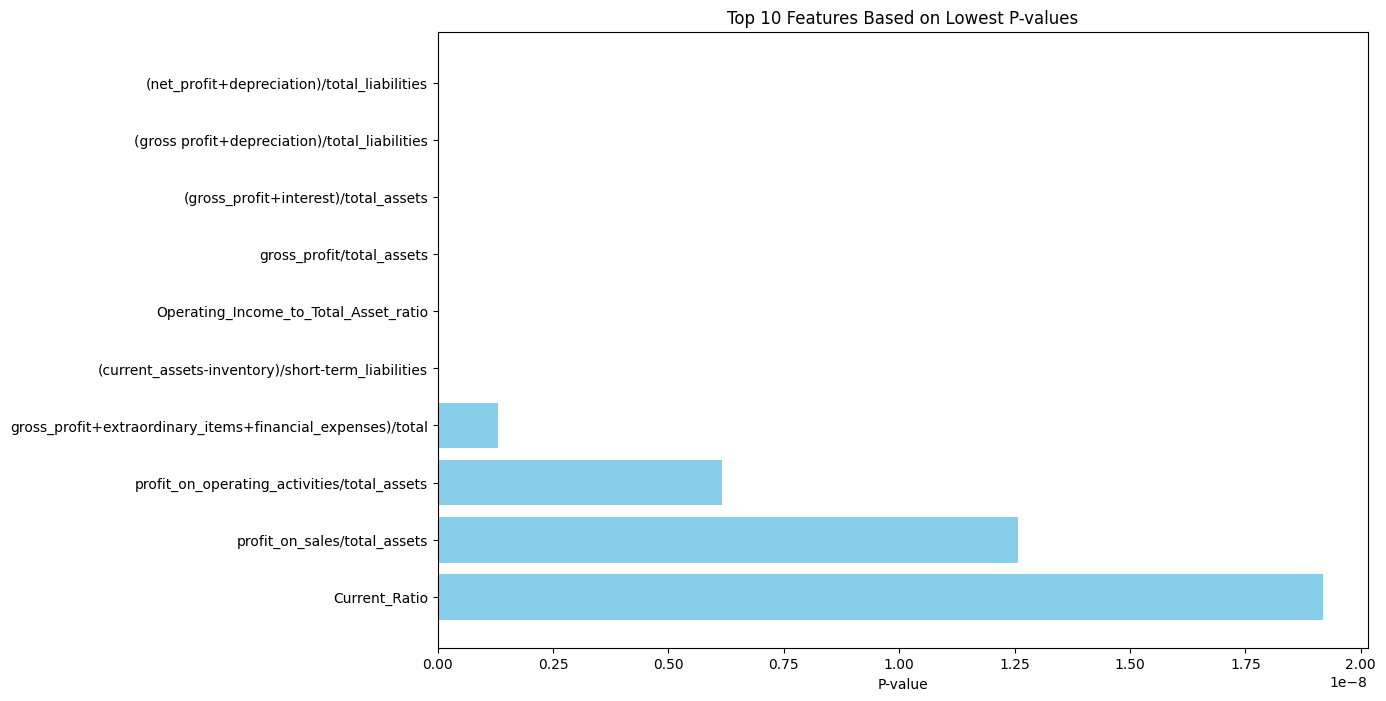

In [242]:
# Initialize a list to store the p-values and column names
p_values_list = []

# Perform logistic regression
for col in continuous_columns:
    X = Bankrupt_model4[col]
    y = Bankrupt_model4['class'].cat.codes  # Convert categorical 'class' to numerical codes

    # Add constant to X
    X = sm.add_constant(X)

    # Fit logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()

    # Get the p-value for the predictor variable (the column)
    p_val = result.pvalues[col]

    # Append the p-value and column name to the list
    p_values_list.append((col, p_val))

# Sort the list by p-value
p_values_list.sort(key=lambda x: x[1])

# Extract the top 15 features based on lowest p-values
top_features = p_values_list[:10]

# Extract feature names and p-values for plotting
feature_names = [col for col, _ in top_features]
p_values = [p_val for _, p_val in top_features]

# Display the top 10 features
print("Top 10 features based on lowest p-values:")
print(feature_names)

# Plotting the top 15 features based on their p-values
plt.figure(figsize=(12, 8))
plt.barh(feature_names, p_values, color='skyblue')
plt.xlabel('P-value')
plt.title('Top 10 Features Based on Lowest P-values')
plt.gca().invert_yaxis()
plt.show()

###Random Forest testing for Feature Selection

                                                                            importance
Cash_to_Financial_Expense                                                        0.090
Cash_to_assets                                                                   0.078
cash_to_interest                                                                 0.065
Total_liabilities_to_Cash                                                        0.053
gross_profit(in3years)/total_assets                                              0.028
Interest_to_cash                                                                 0.027
logarithm_of_total_assets                                                        0.018
Financial_Expense_To_Total_Asset                                                 0.016
(net_profit+depreciation)/total_liabilities                                      0.016
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))       0.016


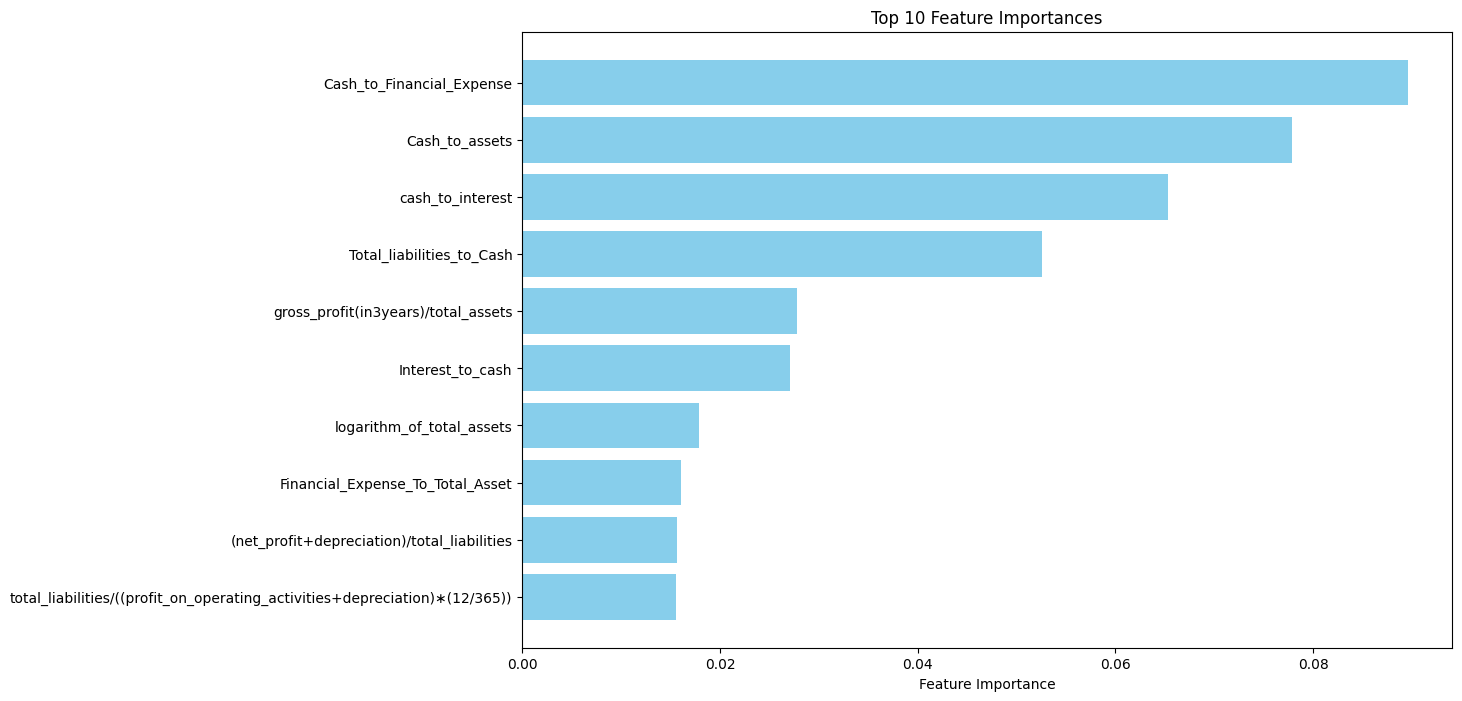

In [243]:
# Define features (X) and target (y)
X = Bankrupt_model4.drop('class', axis=1)
y = Bankrupt_model4['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=4)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index[:10], feature_importances['importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

###Preparing New Dataset for testing

In [246]:
Bankrupt_model4 = polish_Dataset[[
    'year',
    'Cash_to_Financial_Expense',
    'Cash_to_assets',
    'cash_to_interest',
    'Total_liabilities_to_Cash',
    'gross_profit(in3years)/total_assets',
    'Interest_to_cash',
    'logarithm_of_total_assets',
    'Financial_Expense_To_Total_Asset',
    '(net_profit+depreciation)/total_liabilities',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    'class']]
Bankrupt_model4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 12 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   year                                                                        43405 non-null  int64   
 1   Cash_to_Financial_Expense                                                   37567 non-null  float64 
 2   Cash_to_assets                                                              43270 non-null  float64 
 3   cash_to_interest                                                            23529 non-null  float64 
 4   Total_liabilities_to_Cash                                                   43238 non-null  float64 
 5   gross_profit(in3years)/total_assets                                         42483 non-null  float64 
 6   Interest_to_cash                      

###Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

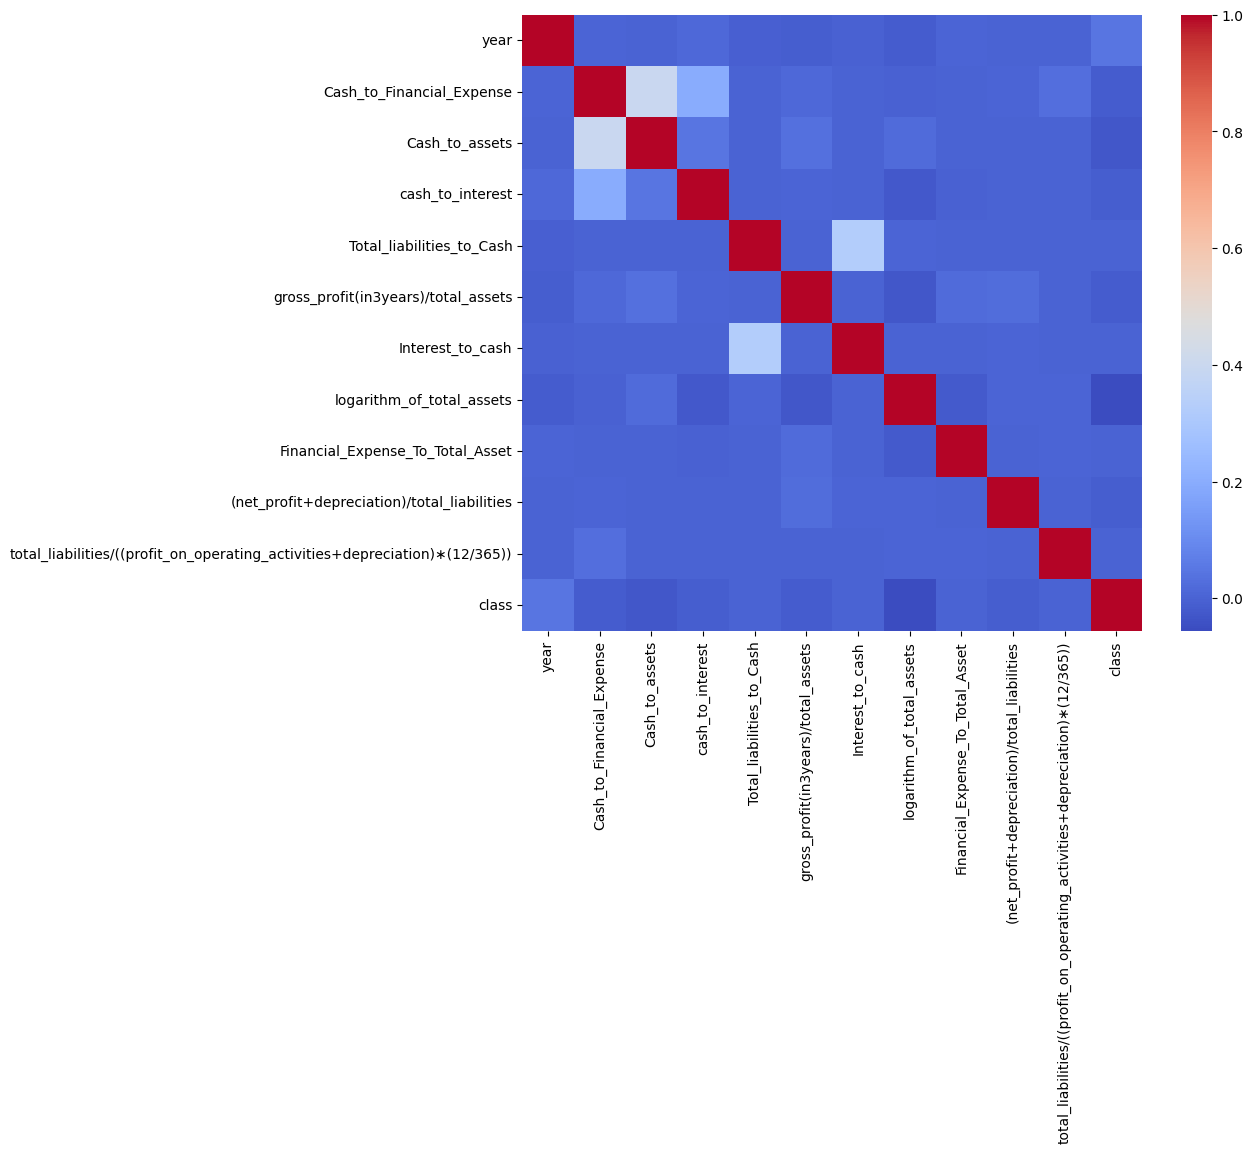

In [247]:
plt.figure(figsize=(10, 8))
sns.heatmap(Bankrupt_model4.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.show

###Review and remove outliers

In [248]:
pd.options.display.float_format = "{:.3f}".format
Bankrupt_model4.describe()

year  Cash_to_Financial_Expense  Cash_to_assets  cash_to_interest  \
count 43405.000                  37567.000       43270.000         23529.000   
mean      2.940                   1602.862          -1.694          1535.972   
std       1.284                  84176.481         331.746         15145.109   
min       1.000               -5282808.239      -62701.320       -103000.374   
25%       2.000                      0.089           0.006             0.322   
50%       3.000                      0.717           0.037             2.203   
75%       4.000                      4.571           0.130            21.143   
max       5.000               13597750.957       12643.204        738251.408   

       Total_liabilities_to_Cash  gross_profit(in3years)/total_assets  Interest_to_cash  \
count                  43238.000                            42483.000         23511.000   
mean                    2881.205                                0.270           617.736   
std                   787900.726                                7.988        115662.865   
min                -64078999.678                             -463.890      -5855701.082   
25%                        1.105                                0.021             0.015   
50%                        6.574                                0.155             0.257   
75%                       33.245                                0.356             1.585   
max                140981668.045                              831.660      15987106.466   

       logarithm_of_total_assets  Financial_Expense_To_Total_Asset  \
count                  43397.000                         37664.000   
mean                       4.005                             0.108   
std                        0.827                             2.635   
min                       -0.886                            -0.118   
25%                        3.495                             0.012   
50%                        4.014                             0.040   
75%                        4.520                             0.122   
max                        9.698                           498.359   

       (net_profit+depreciation)/total_liabilities  \
count                                    43310.000   
mean                                         1.264   
std                                         66.224   
min                                      -6331.800   
25%                                          0.067   
50%                                          0.222   
75%                                          0.599   
max                                       8262.300   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  
count                                                                   42651.000  
mean                                                                        7.723  
std                                                                      1399.951  
min                                                                     -1234.400  
25%                                                                         0.027  
50%                                                                         0.086  
75%                                                                         0.206  
max                                                                    289000.000

In [251]:
#adjusting for outliers
numeric_cols = Bankrupt_model4.select_dtypes(include=[float]).columns
numeric_cols

Index(['Cash_to_Financial_Expense', 'Cash_to_assets', 'cash_to_interest',
       'Total_liabilities_to_Cash', 'gross_profit(in3years)/total_assets', 'Interest_to_cash',
       'logarithm_of_total_assets', 'Financial_Expense_To_Total_Asset',
       '(net_profit+depreciation)/total_liabilities',
       'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))'],
      dtype='object')

In [252]:
#adjusting for outliers
numeric_cols = Bankrupt_model4.select_dtypes(include=[float, int]).columns
# Calculate Q1, Q3, and IQR for each column
Q1 = Bankrupt_model4[numeric_cols].quantile(0.25)
Q3 = Bankrupt_model4[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Create a boolean DataFrame indicating whether each value is an outlier
outliers = (Bankrupt_model4[numeric_cols] < lower_bound) | (Bankrupt_model4[numeric_cols] > upper_bound)

# Filter rows that contain any outliers
rows_with_outliers = outliers.any(axis=1)
Bankruptcleaned_model = Bankrupt_model4[~rows_with_outliers]

Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23497 entries, 0 to 43404
Data columns (total 12 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   year                                                                        23497 non-null  int64   
 1   Cash_to_Financial_Expense                                                   20959 non-null  float64 
 2   Cash_to_assets                                                              23460 non-null  float64 
 3   cash_to_interest                                                            11205 non-null  float64 
 4   Total_liabilities_to_Cash                                                   23448 non-null  float64 
 5   gross_profit(in3years)/total_assets                                         23104 non-null  float64 
 6   Interest_to_cash                           

In [253]:
print(len(Bankrupt_model4))
print(len(Bankruptcleaned_model))

43405
23497


In [254]:
Bankruptcleaned_model.describe()

year  Cash_to_Financial_Expense  Cash_to_assets  cash_to_interest  \
count 23497.000                  20959.000       23460.000         11205.000   
mean      2.917                      1.905           0.072             6.256   
std       1.300                      3.240           0.097            11.544   
min       1.000                    -12.839          -0.365           -45.133   
25%       2.000                      0.185           0.013             0.746   
50%       3.000                      0.691           0.039             2.212   
75%       4.000                      2.121           0.102             6.747   
max       5.000                     18.005           0.501            83.456   

       Total_liabilities_to_Cash  gross_profit(in3years)/total_assets  Interest_to_cash  \
count                  23448.000                            23104.000         11201.000   
mean                      16.277                                0.192             0.771   
std                       30.967                                0.279             1.197   
min                      -95.252                               -0.976            -4.693   
25%                        2.270                                0.039             0.117   
50%                        8.324                                0.161             0.367   
75%                       25.153                                0.336             1.080   
max                      129.648                                1.357             6.267   

       logarithm_of_total_assets  Financial_Expense_To_Total_Asset  \
count                  23492.000                         20985.000   
mean                       4.134                             0.093   
std                        0.760                             0.087   
min                        0.699                            -0.044   
25%                        3.652                             0.022   
50%                        4.147                             0.066   
75%                        4.605                             0.141   
max                        7.207                             0.451   

       (net_profit+depreciation)/total_liabilities  \
count                                    23459.000   
mean                                         0.361   
std                                          0.461   
min                                         -1.517   
25%                                          0.099   
50%                                          0.236   
75%                                          0.514   
max                                          2.194   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  
count                                                                   23079.000  
mean                                                                        0.124  
std                                                                         0.167  
min                                                                        -0.510  
25%                                                                         0.043  
50%                                                                         0.094  
75%                                                                         0.187  
max                                                                         0.742

In [255]:
Bankruptcleaned_model.corr()

year  \
year                                                                        1.000   
Cash_to_Financial_Expense                                                   0.017   
Cash_to_assets                                                              0.009   
cash_to_interest                                                            0.015   
Total_liabilities_to_Cash                                                  -0.006   
gross_profit(in3years)/total_assets                                        -0.020   
Interest_to_cash                                                           -0.005   
logarithm_of_total_assets                                                   0.013   
Financial_Expense_To_Total_Asset                                           -0.038   
(net_profit+depreciation)/total_liabilities                                -0.040   
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  0.004   
class                                                                       0.025   

                                                                            Cash_to_Financial_Expense  \
year                                                                                            0.017   
Cash_to_Financial_Expense                                                                       1.000   
Cash_to_assets                                                                                  0.440   
cash_to_interest                                                                                0.508   
Total_liabilities_to_Cash                                                                      -0.123   
gross_profit(in3years)/total_assets                                                             0.103   
Interest_to_cash                                                                               -0.369   
logarithm_of_total_assets                                                                      -0.265   
Financial_Expense_To_Total_Asset                                                               -0.389   
(net_profit+depreciation)/total_liabilities                                                     0.133   
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))                     -0.044   
class                                                                                          -0.042   

                                                                            Cash_to_assets  \
year                                                                                 0.009   
Cash_to_Financial_Expense                                                            0.440   
Cash_to_assets                                                                       1.000   
cash_to_interest                                                                     0.361   
Total_liabilities_to_Cash                                                           -0.225   
gross_profit(in3years)/total_assets                                                  0.201   
Interest_to_cash                                                                    -0.258   
logarithm_of_total_assets                                                           -0.105   
Financial_Expense_To_Total_Asset                                                     0.109   
(net_profit+depreciation)/total_liabilities                                          0.253   
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))          -0.093   
class                                                                               -0.104   

                                                                            cash_to_interest  \
year                                                                                   0.015   
Cash_to_Financial_Expense                                                              0.508   
Cash_to_assets                                                                         0.361  

In [256]:
for column in Bankruptcleaned_model.columns:
  countzero = (Bankruptcleaned_model[column] == 0).sum()
  print(f"{column} has {countzero} zero values")

year has 0 zero values
Cash_to_Financial_Expense has 3 zero values
Cash_to_assets has 12 zero values
cash_to_interest has 4 zero values
Total_liabilities_to_Cash has 11 zero values
gross_profit(in3years)/total_assets has 18 zero values
Interest_to_cash has 0 zero values
logarithm_of_total_assets has 0 zero values
Financial_Expense_To_Total_Asset has 8 zero values
(net_profit+depreciation)/total_liabilities has 21 zero values
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365)) has 34 zero values
class has 22492 zero values


In [257]:
length=len(Bankruptcleaned_model['class'])
print(f"total number of rows is: {length}")

total number of rows is: 23497


In [271]:
nulls=Bankruptcleaned_model.isnull().sum()
nulls

year                                                                            0
Cash_to_assets                                                                 37
Total_liabilities_to_Cash                                                      49
gross_profit(in3years)/total_assets                                           393
logarithm_of_total_assets                                                       5
(net_profit+depreciation)/total_liabilities                                    38
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    418
class                                                                           0
dtype: int64

In [272]:
percentage_nulls=nulls/length*100
percentage_nulls
#to determine % of null per attribute. anything over 10% will be removed. The remainder will use random forest imputation.

year                                                                         0.000
Cash_to_assets                                                               0.157
Total_liabilities_to_Cash                                                    0.209
gross_profit(in3years)/total_assets                                          1.673
logarithm_of_total_assets                                                    0.021
(net_profit+depreciation)/total_liabilities                                  0.162
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))   1.779
class                                                                        0.000
dtype: float64

In [273]:
percentage_nulls[percentage_nulls>5]

Series([], dtype: float64)

In [274]:
Bankruptcleaned_model.drop([
 'Cash_to_Financial_Expense',
    'cash_to_interest',
    'Interest_to_cash',
    'Financial_Expense_To_Total_Asset'
],axis=1,inplace=True)

KeyError: "['Cash_to_Financial_Expense', 'cash_to_interest', 'Interest_to_cash', 'Financial_Expense_To_Total_Asset'] not found in axis"

In [275]:
Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23497 entries, 0 to 43404
Data columns (total 8 columns):
 #   Column                                                                      Non-Null Count  Dtype   
---  ------                                                                      --------------  -----   
 0   year                                                                        23497 non-null  int64   
 1   Cash_to_assets                                                              23460 non-null  float64 
 2   Total_liabilities_to_Cash                                                   23448 non-null  float64 
 3   gross_profit(in3years)/total_assets                                         23104 non-null  float64 
 4   logarithm_of_total_assets                                                   23492 non-null  float64 
 5   (net_profit+depreciation)/total_liabilities                                 23459 non-null  float64 
 6   total_liabilities/((profit_on_operating_acti

In [276]:
 nulls=Bankruptcleaned_model.isnull().sum()
 nulls

year                                                                            0
Cash_to_assets                                                                 37
Total_liabilities_to_Cash                                                      49
gross_profit(in3years)/total_assets                                           393
logarithm_of_total_assets                                                       5
(net_profit+depreciation)/total_liabilities                                    38
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    418
class                                                                           0
dtype: int64

In [277]:
nulls/length*100

year                                                                         0.000
Cash_to_assets                                                               0.157
Total_liabilities_to_Cash                                                    0.209
gross_profit(in3years)/total_assets                                          1.673
logarithm_of_total_assets                                                    0.021
(net_profit+depreciation)/total_liabilities                                  0.162
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))   1.779
class                                                                        0.000
dtype: float64

###Imputation Model

In [281]:
#using 2 different methods of imputation to see which one works best
Bankrupt_modelMMM=Bankruptcleaned_model.copy()
Bankrupt_modelRF=Bankruptcleaned_model.copy()

In [285]:
# Columns with missing values in your bankrupt_model dataset
columns_with_missing = [
   'Cash_to_assets',
    'Total_liabilities_to_Cash',
    'gross_profit(in3years)/total_assets',
    'logarithm_of_total_assets',
    '(net_profit+depreciation)/total_liabilities',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))'
]

In [286]:
# Perform imputation (example using SimpleImputer with mean)
imputer = SimpleImputer(strategy='mean')
Bankrupt_modelMMM[columns_with_missing] = imputer.fit_transform(Bankrupt_modelMMM[columns_with_missing])

In [287]:
#perfomring imputation with Random Forest
estimator = RandomForestRegressor(n_estimators=3, max_depth= 3)
imputer = IterativeImputer(estimator=estimator, random_state=0)
Bankrupt_modelRF[columns_with_missing] = imputer.fit_transform(Bankrupt_modelRF[columns_with_missing])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [288]:
Bankrupt_modelMMM.isnull().sum()

year                                                                          0
Cash_to_assets                                                                0
Total_liabilities_to_Cash                                                     0
gross_profit(in3years)/total_assets                                           0
logarithm_of_total_assets                                                     0
(net_profit+depreciation)/total_liabilities                                   0
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    0
class                                                                         0
dtype: int64

In [289]:
Bankrupt_modelMMM.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  gross_profit(in3years)/total_assets  \
count 23497.000       23497.000                  23497.000                            23497.000   
mean      2.917           0.072                     16.277                                0.192   
std       1.300           0.097                     30.935                                0.277   
min       1.000          -0.365                    -95.252                               -0.976   
25%       2.000           0.013                      2.276                                0.041   
50%       3.000           0.040                      8.351                                0.166   
75%       4.000           0.102                     25.092                                0.332   
max       5.000           0.501                    129.648                                1.357   

       logarithm_of_total_assets  (net_profit+depreciation)/total_liabilities  \
count                  23497.000                                    23497.000   
mean                       4.134                                        0.361   
std                        0.760                                        0.461   
min                        0.699                                       -1.517   
25%                        3.652                                        0.099   
50%                        4.147                                        0.237   
75%                        4.605                                        0.513   
max                        7.207                                        2.194   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  
count                                                                   23497.000  
mean                                                                        0.124  
std                                                                         0.166  
min                                                                        -0.510  
25%                                                                         0.044  
50%                                                                         0.097  
75%                                                                         0.184  
max                                                                         0.742

In [290]:
Bankrupt_modelRF.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  gross_profit(in3years)/total_assets  \
count 23497.000       23497.000                  23497.000                            23497.000   
mean      2.917           0.072                     16.319                                0.192   
std       1.300           0.097                     30.966                                0.278   
min       1.000          -0.365                    -95.252                               -0.976   
25%       2.000           0.013                      2.276                                0.040   
50%       3.000           0.039                      8.351                                0.162   
75%       4.000           0.102                     25.153                                0.335   
max       5.000           0.501                    129.648                                1.357   

       logarithm_of_total_assets  (net_profit+depreciation)/total_liabilities  \
count                  23497.000                                    23497.000   
mean                       4.134                                        0.362   
std                        0.760                                        0.461   
min                        0.699                                       -1.517   
25%                        3.652                                        0.099   
50%                        4.147                                        0.237   
75%                        4.605                                        0.515   
max                        7.207                                        2.194   

       total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))  
count                                                                   23497.000  
mean                                                                        0.125  
std                                                                         0.167  
min                                                                        -0.510  
25%                                                                         0.043  
50%                                                                         0.095  
75%                                                                         0.188  
max                                                                         0.742

In [291]:
Bankrupt_modelRF.isnull().sum()

year                                                                          0
Cash_to_assets                                                                0
Total_liabilities_to_Cash                                                     0
gross_profit(in3years)/total_assets                                           0
logarithm_of_total_assets                                                     0
(net_profit+depreciation)/total_liabilities                                   0
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    0
class                                                                         0
dtype: int64

In [292]:
Bankrupt_modelRF['class'].value_counts()

class
0    22492
1     1005
Name: count, dtype: int64

In [293]:
Bankrupt_model4 =Bankrupt_modelRF

##Year 5

In [93]:
#year 5
Bankrupt_model5= polish_Dataset.loc[polish_Dataset['year']== 5]
#Bankrupt_model5 = Bankrupt_model5.drop(['year'],axis=1)
Bankrupt_model5.head()


year  net_profit/total assets  Total_Liabilities/total_assets  \
37495     5                 0.088238                         0.55472   
37496     5                -0.006202                         0.48465   
37497     5                 0.130240                         0.22142   
37498     5                -0.089951                         0.88700   
37499     5                 0.048179                         0.55041   

       Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
37495                                0.01134         1.0205                  -66.5200   
37496                                0.23298         1.5998                    6.1825   
37497                                0.57751         3.6082                  120.0400   
37498                                0.26927         1.5222                  -55.9920   
37499                                0.10765         1.2437                  -22.9590   

       Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
37495                                 0.342040                               0.109490   
37496                                 0.000000                              -0.006202   
37497                                 0.187640                               0.162120   
37498                                -0.073957                              -0.089951   
37499                                 0.000000                               0.059280   

       book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
37495                                 0.57752                1.0881                       0.32036   
37496                                 1.06340                1.2757                       0.51535   
37497                                 3.05900                1.1415                       0.67731   
37498                                 0.12740                1.2754                       0.11300   
37499                                 0.81682                1.5150                       0.44959   

       gross_profit+extraordinary_items+financial_expenses)/total  \
37495                                                    0.109490   
37496                                                    0.001329   
37497                                                    0.162120   
37498                                                   -0.080792   
37499                                                    0.091990   

       gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
37495                             0.197600                           0.096885   
37496                            -0.015967                           0.037544   
37497                             0.732180                           0.165680   
37498                            -0.174450                           0.084038   
37499                             0.134190                           0.055575   

       (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
37495                              0.109490                                              1475.20   
37496                             -0.006202                                              3693.40   
37497                              0.162120                                               431.75   
37498                             -0.089951                                              3020.50   
37499                              0.059280                                              2386.10   

       (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
37495                                       0.247420                          1.8027   
37496                                       0.098825                          2.0634   
37497                                       0.845390                          4.5164   
37498                                     

In [98]:
Bankrupt_model5['class'].value_counts()

class
0    5500
1     410
Name: count, dtype: int64

In [294]:
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Handle missing values by dropping rows with missing data
Bankrupt_model5 = Bankrupt_model5.dropna()

# Ensure 'class' is categorical
Bankrupt_model5['class'] = Bankrupt_model5['class'].astype('category')

# List of continuous columns
continuous_columns = [
    'net_profit/total assets', 'Total_Liabilities/total_assets', 'Working_Capital_to_Total_Assets_Ratio',
    'Current_Ratio', 'Defensive_Interval_Ratio', 'Retained_Earnings_to_Total_Assets_Ratio',
    'Operating_Income_to_Total_Asset_ratio', 'book_value_of_equity/total_liabilities', 'Asset_Turnover_Ratio',
    'Equity_to_Total_Assets_Ratio', 'gross_profit+extraordinary_items+financial_expenses)/total',
    'gross_profit/short-term_liabilities', '(gross_profit+depreciation)/sales',
    '(gross_profit+interest)/total_assets', '(total_liabilities∗365)/(gross_profit+depreciation)',
    '(gross profit+depreciation)/total_liabilities', 'total_assets/total_liabilities',
    'gross_profit/total_assets', 'gross_profit/sales', '(inventory∗365)/sales', 'sales(n)/sales(n-1)',
    'profit_on_operating_activities/total_assets', 'net_profit/sales', 'gross_profit(in3years)/total_assets',
    '(equity-share_capital)/total_assets', '(net_profit+depreciation)/total_liabilities',
    'profit_on_operating_activities/financial_expenses', 'working_capital/fixed_assets',
    'logarithm_of_total_assets', '(total_liabilities-cash)/sales', '(gross_profit+interest)/sales',
    '(current_liabilities∗365)/cost_of_products_sold', 'operating_expenses/short-term_liabilities',
    'operating_expenses_/_total_liabilities', 'profit_on_sales/total_assets', 'total_sales/total_assets',
    '(current_assets-inventories)/long-term_liabilities', 'constant_capital/total_assets',
    'profit_on_sales/sales', '(current_assets-inventory-receivables)/short-term liabilities',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    'profit_on_operating_activities/sales', 'rotation_receivables+inventory_turnover_in_days',
    '(receivables∗365)/sales', 'net_profit/inventory', '(current_assets-inventory)/short-term_liabilities',
    '(inventory∗365)/cost_of_products_sold', 'EBITDA_(profit_on_operating_activities-depreciation)/total_assets',
    'EBITDA_(profit_on_operating_activities-depreciation)/sales', 'current_assets/total_liabilities',
    'short-term_liabilities/total_assets', '(short-term_liabilities∗365)/cost_of_products_sold)',
    'equity/fixed_assets', 'constant_capital/fixed_assets', 'working_capital', '(sales-cost_of_products_sold)/sales',
    '(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)',
    'total_costs/total_sales', 'long-term_liabilities/equity', 'sales/inventory', 'sales/receivables',
    '(short-term_liabilities∗365)/sales', 'sales/short-term liabilities', 'sales/fixed assets',
    'Interest_to_Sales', 'Cash_to_assets', 'Total_liabilities_to_Cash', 'cash_to_interest', 'Interest_to_cash',
    'Financial_Expense_To_Total_Asset', 'Financial_expense_to_operating', 'Debt_Coverage_Ratio',
    'Operating_income_Margin', 'Cash_conversion_cycle', 'Cash_to_Financial_Expense', 'Financial_Leverage',
    'Return_On_equity'
]


<ipython-input-294-c876ce337ab7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankrupt_model5['class'] = Bankrupt_model5['class'].astype('category')


###Logistic Regression testing for Feature Selection

Optimization terminated successfully.
         Current function value: 0.226560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.252044
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.243162
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.241412
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.264791
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.262171
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226499
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.250612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.264136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.252049
  

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.264603
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.261741
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.264785
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.264789
         Iterations 6
Top 10 features based on lowest p-values:
['net_profit/total assets', '(gross_profit+interest)/total_assets', 'Operating_Income_to_Total_Asset_ratio', 'gross_profit/total_assets', 'profit_on_sales/total_assets', 'profit_on_operating_activities/total_assets', 'gross_profit+extraordinary_items+financial_expenses)/total', '(net_profit+depreciation)/total_liabilities', '(gross profit+depreciation)/total_liabilities', 'EBITDA_(profit_on_operating_activities-depreciation)/total_assets']


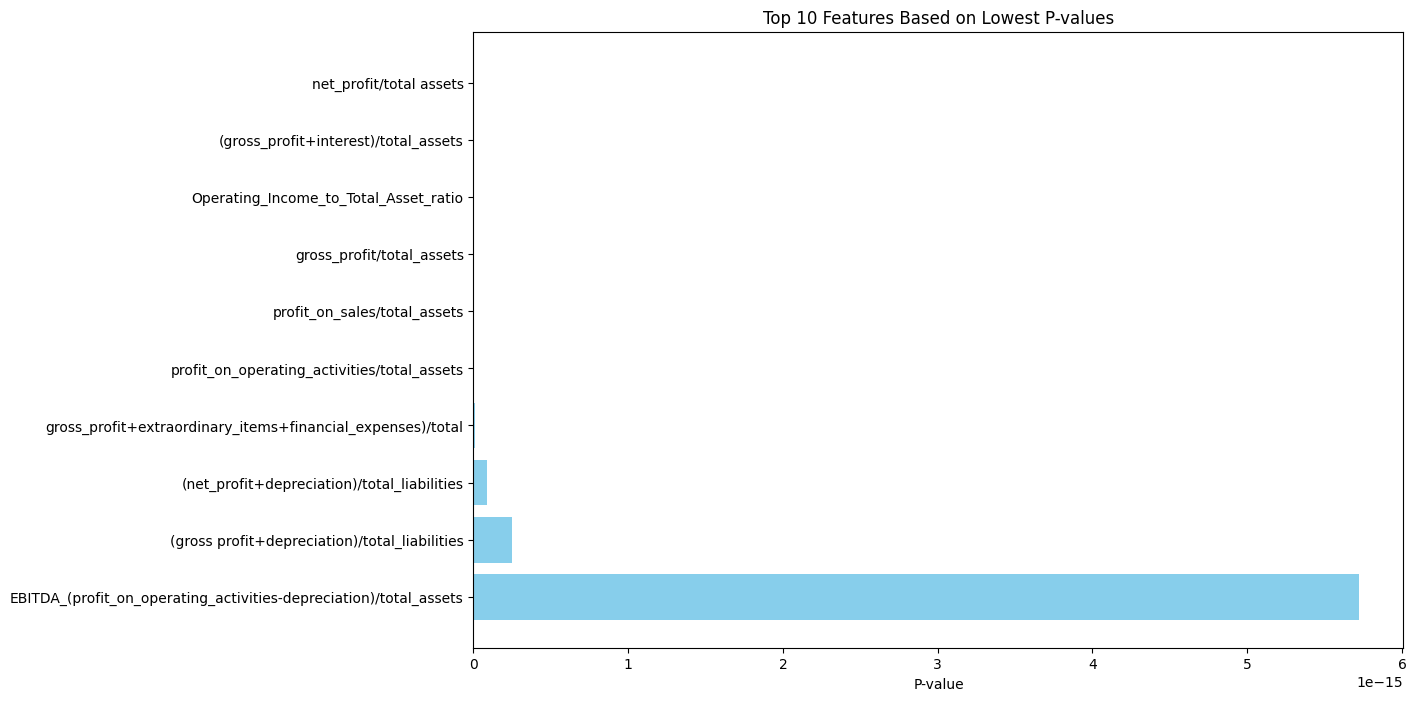

In [295]:
# Initialize a list to store the p-values and column names
p_values_list = []

# Perform logistic regression
for col in continuous_columns:
    X = Bankrupt_model5[col]
    y = Bankrupt_model5['class'].cat.codes  # Convert categorical 'class' to numerical codes

    # Add constant to X
    X = sm.add_constant(X)

    # Fit logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()

    # Get the p-value for the predictor variable (the column)
    p_val = result.pvalues[col]

    # Append the p-value and column name to the list
    p_values_list.append((col, p_val))

# Sort the list by p-value
p_values_list.sort(key=lambda x: x[1])

# Extract the top 15 features based on lowest p-values
top_features = p_values_list[:10]

# Extract feature names and p-values for plotting
feature_names = [col for col, _ in top_features]
p_values = [p_val for _, p_val in top_features]

# Display the top 10 features
print("Top 10 features based on lowest p-values:")
print(feature_names)

# Plotting the top 15 features based on their p-values
plt.figure(figsize=(12, 8))
plt.barh(feature_names, p_values, color='skyblue')
plt.xlabel('P-value')
plt.title('Top 10 Features Based on Lowest P-values')
plt.gca().invert_yaxis()
plt.show()

###Random Forest testing for Feature Selection

                                             importance
Cash_to_Financial_Expense                         0.077
cash_to_interest                                  0.076
Cash_to_assets                                    0.069
Total_liabilities_to_Cash                         0.047
gross_profit(in3years)/total_assets               0.037
Interest_to_cash                                  0.033
(net_profit+depreciation)/total_liabilities       0.024
profit_on_sales/total_assets                      0.018
logarithm_of_total_assets                         0.017
working_capital                                   0.015


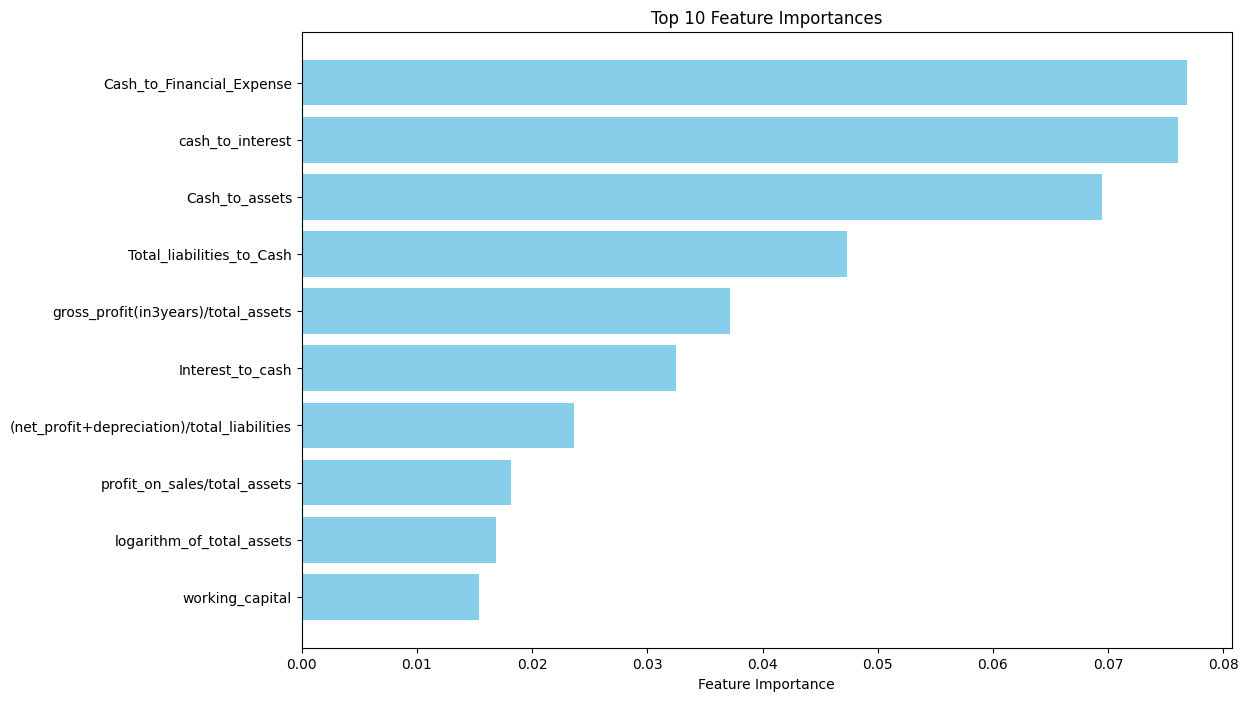

In [296]:
# Define features (X) and target (y)
X = Bankrupt_model5.drop('class', axis=1)
y = Bankrupt_model5['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=4)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index[:10], feature_importances['importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

###Preparing New Dataset for testing

In [297]:
Bankrupt_model5 = polish_Dataset[[
    'year',
    'Cash_to_Financial_Expense',
    'cash_to_interest',
    'Cash_to_assets',
    'Total_liabilities_to_Cash',
    'gross_profit(in3years)/total_assets',
    'Interest_to_cash',
    '(net_profit+depreciation)/total_liabilities',
    'profit_on_sales/total_assets',
    'logarithm_of_total_assets',
    'working_capital',
    'class'
]]
Bankrupt_model5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   year                                         43405 non-null  int64   
 1   Cash_to_Financial_Expense                    37567 non-null  float64 
 2   cash_to_interest                             23529 non-null  float64 
 3   Cash_to_assets                               43270 non-null  float64 
 4   Total_liabilities_to_Cash                    43238 non-null  float64 
 5   gross_profit(in3years)/total_assets          42483 non-null  float64 
 6   Interest_to_cash                             23511 non-null  float64 
 7   (net_profit+depreciation)/total_liabilities  43310 non-null  float64 
 8   profit_on_sales/total_assets                 43397 non-null  float64 
 9   logarithm_of_total_assets                    43397 non-null  

###Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

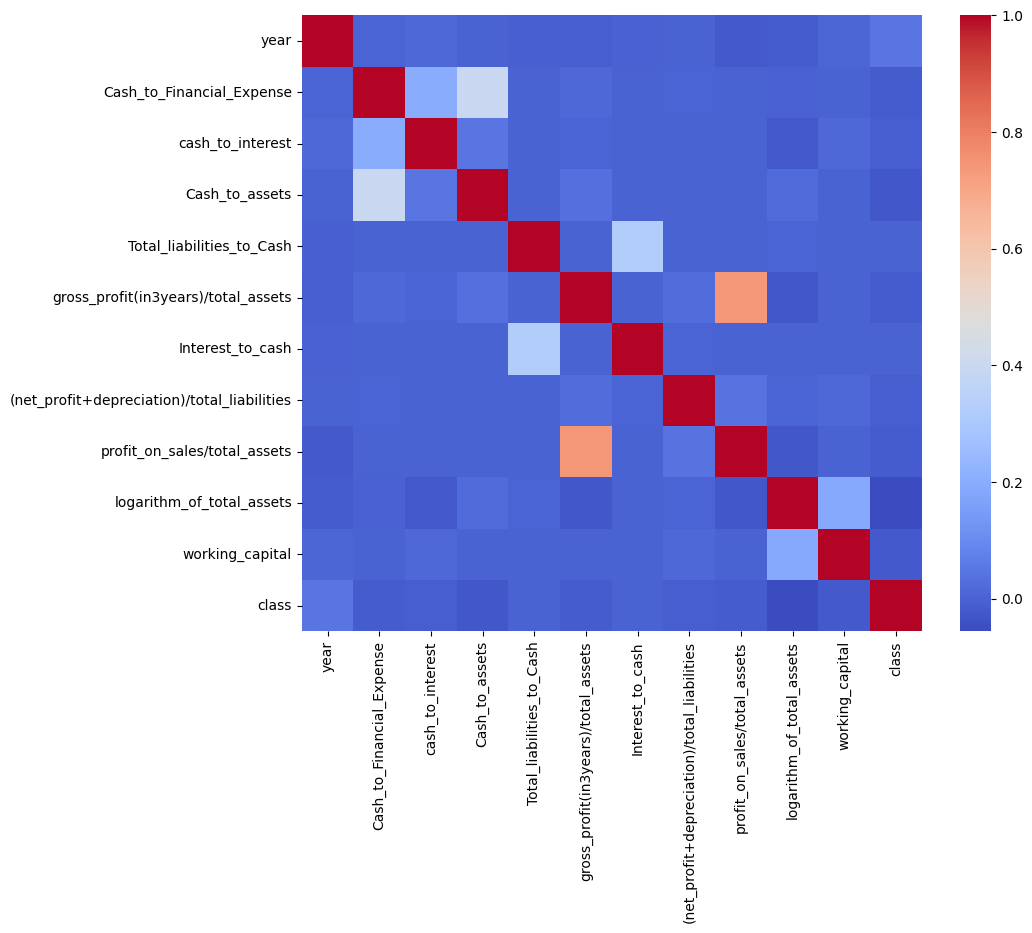

In [299]:
plt.figure(figsize=(10, 8))
sns.heatmap(Bankrupt_model5.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.show

###Review and remove outliers

In [298]:
pd.options.display.float_format = "{:.3f}".format
Bankrupt_model5.describe()

year  Cash_to_Financial_Expense  cash_to_interest  Cash_to_assets  \
count 43405.000                  37567.000         23529.000       43270.000   
mean      2.940                   1602.862          1535.972          -1.694   
std       1.284                  84176.481         15145.109         331.746   
min       1.000               -5282808.239       -103000.374      -62701.320   
25%       2.000                      0.089             0.322           0.006   
50%       3.000                      0.717             2.203           0.037   
75%       4.000                      4.571            21.143           0.130   
max       5.000               13597750.957        738251.408       12643.204   

       Total_liabilities_to_Cash  gross_profit(in3years)/total_assets  Interest_to_cash  \
count                  43238.000                            42483.000         23511.000   
mean                    2881.205                                0.270           617.736   
std                   787900.726                                7.988        115662.865   
min                -64078999.678                             -463.890      -5855701.082   
25%                        1.105                                0.021             0.015   
50%                        6.574                                0.155             0.257   
75%                       33.245                                0.356             1.585   
max                140981668.045                              831.660      15987106.466   

       (net_profit+depreciation)/total_liabilities  profit_on_sales/total_assets  \
count                                    43310.000                     43397.000   
mean                                         1.264                         0.112   
std                                         66.224                         4.783   
min                                      -6331.800                      -431.590   
25%                                          0.067                         0.006   
50%                                          0.222                         0.061   
75%                                          0.599                         0.150   
max                                       8262.300                       626.920   

       logarithm_of_total_assets  working_capital  
count                  43397.000        43404.000  
mean                       4.005         7672.346  
std                        0.827        70053.490  
min                       -0.886     -1810000.000  
25%                        3.495           27.554  
50%                        4.014         1088.350  
75%                        4.520         4993.325  
max                        9.698      6120000.000

In [300]:
#adjusting for outliers
numeric_cols = Bankrupt_model5.select_dtypes(include=[float]).columns
numeric_cols

Index(['Cash_to_Financial_Expense', 'cash_to_interest', 'Cash_to_assets',
       'Total_liabilities_to_Cash', 'gross_profit(in3years)/total_assets', 'Interest_to_cash',
       '(net_profit+depreciation)/total_liabilities', 'profit_on_sales/total_assets',
       'logarithm_of_total_assets', 'working_capital'],
      dtype='object')

In [301]:
#adjusting for outliers
numeric_cols = Bankrupt_model5.select_dtypes(include=[float, int]).columns
# Calculate Q1, Q3, and IQR for each column
Q1 = Bankrupt_model5[numeric_cols].quantile(0.25)
Q3 = Bankrupt_model5[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Create a boolean DataFrame indicating whether each value is an outlier
outliers = (Bankrupt_model5[numeric_cols] < lower_bound) | (Bankrupt_model5[numeric_cols] > upper_bound)

# Filter rows that contain any outliers
rows_with_outliers = outliers.any(axis=1)
Bankruptcleaned_model = Bankrupt_model5[~rows_with_outliers]

Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22779 entries, 1 to 43404
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   year                                         22779 non-null  int64   
 1   Cash_to_Financial_Expense                    19687 non-null  float64 
 2   cash_to_interest                             12138 non-null  float64 
 3   Cash_to_assets                               22716 non-null  float64 
 4   Total_liabilities_to_Cash                    22708 non-null  float64 
 5   gross_profit(in3years)/total_assets          22351 non-null  float64 
 6   Interest_to_cash                             12137 non-null  float64 
 7   (net_profit+depreciation)/total_liabilities  22746 non-null  float64 
 8   profit_on_sales/total_assets                 22773 non-null  float64 
 9   logarithm_of_total_assets                    22773 non-null  float

In [302]:
print(len(Bankrupt_model5))
print(len(Bankruptcleaned_model))

43405
22779


In [303]:
Bankruptcleaned_model.describe()

year  Cash_to_Financial_Expense  cash_to_interest  Cash_to_assets  \
count 22779.000                  19687.000         12138.000       22716.000   
mean      2.900                      1.950             5.939           0.069   
std       1.288                      3.314            11.323           0.093   
min       1.000                    -12.981           -52.971          -0.365   
25%       2.000                      0.187             0.691           0.013   
50%       3.000                      0.690             2.060           0.038   
75%       4.000                      2.165             6.290           0.096   
max       5.000                     18.005            83.456           0.501   

       Total_liabilities_to_Cash  gross_profit(in3years)/total_assets  Interest_to_cash  \
count                  22708.000                            22351.000         12137.000   
mean                      17.683                                0.169             0.775   
std                       31.226                                0.274             1.223   
min                      -95.252                               -0.980            -4.693   
25%                        2.733                                0.022             0.118   
50%                        9.428                                0.137             0.379   
75%                       27.052                                0.304             1.112   
max                      129.648                                1.357             6.267   

       (net_profit+depreciation)/total_liabilities  profit_on_sales/total_assets  \
count                                    22746.000                     22773.000   
mean                                         0.312                         0.072   
std                                          0.433                         0.129   
min                                         -1.517                        -0.425   
25%                                          0.070                         0.007   
50%                                          0.196                         0.057   
75%                                          0.446                         0.136   
max                                          2.192                         0.580   

       logarithm_of_total_assets  working_capital  
count                  22773.000        22778.000  
mean                       3.974         2553.000  
std                        0.642         4964.239  
min                        0.699       -14863.000  
25%                        3.577           60.986  
50%                        4.035         1129.200  
75%                        4.411         4225.225  
max                        6.584        19885.000

In [304]:
Bankruptcleaned_model.corr()

year  Cash_to_Financial_Expense  cash_to_interest  \
year                                         1.000                      0.020             0.014   
Cash_to_Financial_Expense                    0.020                      1.000             0.499   
cash_to_interest                             0.014                      0.499             1.000   
Cash_to_assets                               0.001                      0.433             0.334   
Total_liabilities_to_Cash                   -0.003                     -0.128            -0.229   
gross_profit(in3years)/total_assets         -0.021                      0.105             0.130   
Interest_to_cash                            -0.005                     -0.365            -0.260   
(net_profit+depreciation)/total_liabilities -0.049                      0.142             0.135   
profit_on_sales/total_assets                -0.107                      0.073             0.148   
logarithm_of_total_assets                   -0.013                     -0.277            -0.051   
working_capital                              0.034                     -0.028             0.100   
class                                        0.030                     -0.049            -0.075   

                                             Cash_to_assets  Total_liabilities_to_Cash  \
year                                                  0.001                     -0.003   
Cash_to_Financial_Expense                             0.433                     -0.128   
cash_to_interest                                      0.334                     -0.229   
Cash_to_assets                                        1.000                     -0.239   
Total_liabilities_to_Cash                            -0.239                      1.000   
gross_profit(in3years)/total_assets                   0.197                     -0.064   
Interest_to_cash                                     -0.248                      0.574   
(net_profit+depreciation)/total_liabilities           0.238                     -0.129   
profit_on_sales/total_assets                          0.126                     -0.023   
logarithm_of_total_assets                            -0.188                     -0.056   
working_capital                                       0.173                     -0.114   
class                                                -0.111                     -0.063   

                                             gross_profit(in3years)/total_assets  \
year                                                                      -0.021   
Cash_to_Financial_Expense                                                  0.105   
cash_to_interest                                                           0.130   
Cash_to_assets                                                             0.197   
Total_liabilities_to_Cash                                                 -0.064   
gross_profit(in3years)/total_assets                                        1.000   
Interest_to_cash                                                           0.029   
(net_profit+depreciation)/total_liabilities                                0.575   
profit_on_sales/total_assets                                               0.639   
logarithm_of_total_assets                                                  0.056   
working_capital                                                            0.248   
class                                                                     -0.136   

                                             Interest_to_cash  \
year                                                   -0.005   
Cash_to_Financial_Expense                              -0.365   
cash_to_interest                                       -0.260   
Cash_to_assets                                         -0.248   
Total_liabilities_to_Cash                               0.574   
gross_profit(in3years)/total_assets                     0.029   
Interest_to_cash                       

In [305]:
for column in Bankruptcleaned_model.columns:
  countzero = (Bankruptcleaned_model[column] == 0).sum()
  print(f"{column} has {countzero} zero values")

year has 0 zero values
Cash_to_Financial_Expense has 2 zero values
cash_to_interest has 1 zero values
Cash_to_assets has 8 zero values
Total_liabilities_to_Cash has 11 zero values
gross_profit(in3years)/total_assets has 18 zero values
Interest_to_cash has 0 zero values
(net_profit+depreciation)/total_liabilities has 13 zero values
profit_on_sales/total_assets has 67 zero values
logarithm_of_total_assets has 0 zero values
working_capital has 4 zero values
class has 21676 zero values


In [307]:
length=len(Bankruptcleaned_model['class'])
print(f"total number of rows is: {length}")

total number of rows is: 22779


In [308]:
nulls=Bankruptcleaned_model.isnull().sum()
nulls

year                                               0
Cash_to_Financial_Expense                       3092
cash_to_interest                               10641
Cash_to_assets                                    63
Total_liabilities_to_Cash                         71
gross_profit(in3years)/total_assets              428
Interest_to_cash                               10642
(net_profit+depreciation)/total_liabilities       33
profit_on_sales/total_assets                       6
logarithm_of_total_assets                          6
working_capital                                    1
class                                              0
dtype: int64

In [309]:
percentage_nulls=nulls/length*100
percentage_nulls
#to determine % of null per attribute. anything over 10% will be removed. The remainder will use random forest imputation.

year                                           0.000
Cash_to_Financial_Expense                     13.574
cash_to_interest                              46.714
Cash_to_assets                                 0.277
Total_liabilities_to_Cash                      0.312
gross_profit(in3years)/total_assets            1.879
Interest_to_cash                              46.718
(net_profit+depreciation)/total_liabilities    0.145
profit_on_sales/total_assets                   0.026
logarithm_of_total_assets                      0.026
working_capital                                0.004
class                                          0.000
dtype: float64

In [310]:
percentage_nulls[percentage_nulls>5]

Cash_to_Financial_Expense   13.574
cash_to_interest            46.714
Interest_to_cash            46.718
dtype: float64

In [311]:
Bankruptcleaned_model.drop([
  'Cash_to_Financial_Expense',
    'cash_to_interest',
    'Interest_to_cash'
],axis=1,inplace=True)

<ipython-input-311-e5c0bf0543a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankruptcleaned_model.drop([


In [312]:
Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22779 entries, 1 to 43404
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   year                                         22779 non-null  int64   
 1   Cash_to_assets                               22716 non-null  float64 
 2   Total_liabilities_to_Cash                    22708 non-null  float64 
 3   gross_profit(in3years)/total_assets          22351 non-null  float64 
 4   (net_profit+depreciation)/total_liabilities  22746 non-null  float64 
 5   profit_on_sales/total_assets                 22773 non-null  float64 
 6   logarithm_of_total_assets                    22773 non-null  float64 
 7   working_capital                              22778 non-null  float64 
 8   class                                        22779 non-null  category
dtypes: category(1), float64(7), int64(1)
memory usage: 1.6 MB


In [313]:
 nulls=Bankruptcleaned_model.isnull().sum()
 nulls

year                                             0
Cash_to_assets                                  63
Total_liabilities_to_Cash                       71
gross_profit(in3years)/total_assets            428
(net_profit+depreciation)/total_liabilities     33
profit_on_sales/total_assets                     6
logarithm_of_total_assets                        6
working_capital                                  1
class                                            0
dtype: int64

In [314]:
nulls/length*100

year                                          0.000
Cash_to_assets                                0.277
Total_liabilities_to_Cash                     0.312
gross_profit(in3years)/total_assets           1.879
(net_profit+depreciation)/total_liabilities   0.145
profit_on_sales/total_assets                  0.026
logarithm_of_total_assets                     0.026
working_capital                               0.004
class                                         0.000
dtype: float64

###Imputation Model

In [315]:
#using 2 different methods of imputation to see which one works best
Bankrupt_modelMMM=Bankruptcleaned_model.copy()
Bankrupt_modelRF=Bankruptcleaned_model.copy()

In [316]:
# Columns with missing values in your bankrupt_model dataset
columns_with_missing = [
    'Cash_to_assets',
    'Total_liabilities_to_Cash',
    'gross_profit(in3years)/total_assets',
    '(net_profit+depreciation)/total_liabilities',
    'profit_on_sales/total_assets',
    'logarithm_of_total_assets',
    'working_capital'
]

In [317]:
# Perform imputation (example using SimpleImputer with mean)
imputer = SimpleImputer(strategy='mean')
Bankrupt_modelMMM[columns_with_missing] = imputer.fit_transform(Bankrupt_modelMMM[columns_with_missing])

In [318]:
#perfomring imputation with Random Forest
estimator = RandomForestRegressor(n_estimators=3, max_depth= 3)
imputer = IterativeImputer(estimator=estimator, random_state=0)
Bankrupt_modelRF[columns_with_missing] = imputer.fit_transform(Bankrupt_modelRF[columns_with_missing])

In [319]:
Bankrupt_modelMMM.isnull().sum()

year                                           0
Cash_to_assets                                 0
Total_liabilities_to_Cash                      0
gross_profit(in3years)/total_assets            0
(net_profit+depreciation)/total_liabilities    0
profit_on_sales/total_assets                   0
logarithm_of_total_assets                      0
working_capital                                0
class                                          0
dtype: int64

In [320]:
Bankrupt_modelMMM.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  gross_profit(in3years)/total_assets  \
count 22779.000       22779.000                  22779.000                            22779.000   
mean      2.900           0.069                     17.683                                0.169   
std       1.288           0.093                     31.177                                0.272   
min       1.000          -0.365                    -95.252                               -0.980   
25%       2.000           0.014                      2.749                                0.024   
50%       3.000           0.038                      9.490                                0.142   
75%       4.000           0.096                     26.978                                0.300   
max       5.000           0.501                    129.648                                1.357   

       (net_profit+depreciation)/total_liabilities  profit_on_sales/total_assets  \
count                                    22779.000                     22779.000   
mean                                         0.312                         0.072   
std                                          0.433                         0.129   
min                                         -1.517                        -0.425   
25%                                          0.070                         0.007   
50%                                          0.197                         0.057   
75%                                          0.445                         0.136   
max                                          2.192                         0.580   

       logarithm_of_total_assets  working_capital  
count                  22779.000        22779.000  
mean                       3.974         2553.000  
std                        0.642         4964.130  
min                        0.699       -14863.000  
25%                        3.577           60.991  
50%                        4.035         1129.400  
75%                        4.410         4224.950  
max                        6.584        19885.000

In [321]:
Bankrupt_modelRF.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  gross_profit(in3years)/total_assets  \
count 22779.000       22779.000                  22779.000                            22779.000   
mean      2.900           0.069                     17.724                                0.169   
std       1.288           0.093                     31.200                                0.273   
min       1.000          -0.365                    -95.252                               -0.980   
25%       2.000           0.014                      2.749                                0.022   
50%       3.000           0.038                      9.490                                0.137   
75%       4.000           0.096                     27.009                                0.304   
max       5.000           0.501                    129.648                                1.357   

       (net_profit+depreciation)/total_liabilities  profit_on_sales/total_assets  \
count                                    22779.000                     22779.000   
mean                                         0.311                         0.072   
std                                          0.433                         0.129   
min                                         -1.517                        -0.425   
25%                                          0.070                         0.007   
50%                                          0.196                         0.057   
75%                                          0.445                         0.136   
max                                          2.192                         0.580   

       logarithm_of_total_assets  working_capital  
count                  22779.000        22779.000  
mean                       3.974         2553.057  
std                        0.642         4964.138  
min                        0.699       -14863.000  
25%                        3.577           60.991  
50%                        4.035         1129.400  
75%                        4.411         4224.950  
max                        6.584        19885.000

In [322]:
Bankrupt_modelRF.isnull().sum()

year                                           0
Cash_to_assets                                 0
Total_liabilities_to_Cash                      0
gross_profit(in3years)/total_assets            0
(net_profit+depreciation)/total_liabilities    0
profit_on_sales/total_assets                   0
logarithm_of_total_assets                      0
working_capital                                0
class                                          0
dtype: int64

In [323]:
Bankrupt_modelRF['class'].value_counts()

class
0    21676
1     1103
Name: count, dtype: int64

In [324]:
Bankrupt_model5 =Bankrupt_modelRF

#Approach



#Preparing to model

This step includes spliting the datasets into training and testing sets. Will be using K-Fold Cross-Vaildation to split the sets. Using a K=10 as it is standard.

##Random Oversampling and Undersampling
Because the dataset is imbalanced, will be using Synthetic Minority Oversampling Technique (SMOTE) to increase the Class "1" to better balance the dataset.

As well as Undersampling, removing rows from the Majority Class"0" to balance the dataset.

Both will be used to go into the models and will test the performance.

In [325]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [326]:
#defining the number of folds
from sklearn.model_selection import RepeatedStratifiedKFold
kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)

In [ ]:
##Year 1

In [362]:
Bankrupt_model1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26612 entries, 0 to 43404
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               26612 non-null  int64   
 1   Cash_to_assets                                     26612 non-null  float64 
 2   (current_assets-inventory)/short-term_liabilities  26612 non-null  float64 
 3   constant_capital/fixed_assets                      26612 non-null  float64 
 4   sales/fixed assets                                 26612 non-null  float64 
 5   working_capital/fixed_assets                       26612 non-null  float64 
 6   (total_liabilities-cash)/sales                     26612 non-null  float64 
 7   class                                              26612 non-null  category
dtypes: category(1), float64(6), int64(1)
memory usage: 1.6 MB


In [363]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x1 =Bankrupt_model1.drop(['class'],axis=1)
Bankrupt_model_y1 =Bankrupt_model1['class']

In [364]:
for train_index, test_index in kf.split(Bankrupt_model_x1,Bankrupt_model_y1):
    # Split data into train and test sets
    X_train1, X_test1 = Bankrupt_model_x1.iloc[train_index], Bankrupt_model_x1.iloc[test_index]
    y_train1, y_test1 = Bankrupt_model_y1.iloc[train_index], Bankrupt_model_y1.iloc[test_index]

In [365]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote1, y_train_Smote1 = smote.fit_resample(X_train1, y_train1)

In [366]:
y_train_Smote1.value_counts()

class
0    22749
1    22749
Name: count, dtype: int64

In [367]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under1, y_train_Under1 = UnderSampling.fit_resample(X_train1, y_train1)

In [368]:
y_train_Under1.value_counts()

class
0    1202
1    1202
Name: count, dtype: int64

In [369]:
y_test1.value_counts()

class
0    2527
1     134
Name: count, dtype: int64

In [370]:
##Year 2

In [449]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x2 =Bankrupt_model2.drop(['class'],axis=1)
Bankrupt_model_y2 =Bankrupt_model2['class']

In [450]:
for train_index, test_index in kf.split(Bankrupt_model_x2,Bankrupt_model_y2):
    # Split data into train and test sets
    X_train2, X_test2 = Bankrupt_model_x2.iloc[train_index], Bankrupt_model_x2.iloc[test_index]
    y_train2, y_test2 = Bankrupt_model_y2.iloc[train_index], Bankrupt_model_y2.iloc[test_index]

In [451]:
y_test2.value_counts()

class
0.000    1961
1.000      90
Name: count, dtype: int64

In [452]:
Bankrupt_model2.isnull().sum()

year                                                                          0
Cash_to_assets                                                                0
Total_liabilities_to_Cash                                                     0
(current_assets-inventory)/short-term_liabilities                             0
gross_profit(in3years)/total_assets                                           0
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    0
(total_liabilities∗365)/(gross_profit+depreciation)                           0
class                                                                         0
dtype: int64

In [453]:
X_train2.isnull().sum()

year                                                                          0
Cash_to_assets                                                                0
Total_liabilities_to_Cash                                                     0
(current_assets-inventory)/short-term_liabilities                             0
gross_profit(in3years)/total_assets                                           0
total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))    0
(total_liabilities∗365)/(gross_profit+depreciation)                           0
dtype: int64

In [454]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote2, y_train_Smote2 = smote.fit_resample(X_train2, y_train2)

In [ ]:
y_train_Smote2.value_counts()

class
0    3814
1    3814
Name: count, dtype: int64

In [455]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under2, y_train_Under2 = UnderSampling.fit_resample(X_train2, y_train2)

In [456]:
##Year 3

In [457]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x3 =Bankrupt_model3.drop(['class'],axis=1)
Bankrupt_model_y3 =Bankrupt_model3['class']

In [458]:
for train_index, test_index in kf.split(Bankrupt_model_x3,Bankrupt_model_y3):
    # Split data into train and test sets
    X_train3, X_test3 = Bankrupt_model_x3.iloc[train_index], Bankrupt_model_x3.iloc[test_index]
    y_train3, y_test3 = Bankrupt_model_y3.iloc[train_index], Bankrupt_model_y3.iloc[test_index]

In [459]:
y_test3.value_counts()

class
0    2034
1      81
Name: count, dtype: int64

In [460]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote3, y_train_Smote3 = smote.fit_resample(X_train3, y_train3)

In [461]:
y_train_Smote3.value_counts()

class
0    18306
1    18306
Name: count, dtype: int64

In [462]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under3, y_train_Under3 = UnderSampling.fit_resample(X_train3, y_train3)

In [463]:
##Year 4

In [464]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x4 =Bankrupt_model4.drop(['class'],axis=1)
Bankrupt_model_y4 =Bankrupt_model4['class']

In [465]:
for train_index, test_index in kf.split(Bankrupt_model_x4,Bankrupt_model_y4):
    # Split data into train and test sets
    X_train4, X_test4 = Bankrupt_model_x4.iloc[train_index], Bankrupt_model_x4.iloc[test_index]
    y_train4, y_test4 = Bankrupt_model_y4.iloc[train_index], Bankrupt_model_y4.iloc[test_index]

In [466]:
y_test4.value_counts()

class
0    2249
1     100
Name: count, dtype: int64

In [467]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote4, y_train_Smote4 = smote.fit_resample(X_train4, y_train4)

In [468]:
y_train_Smote4.value_counts()

class
0    20243
1    20243
Name: count, dtype: int64

In [469]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under4, y_train_Under4 = UnderSampling.fit_resample(X_train4, y_train4)

In [470]:
##Year 5

In [471]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x5 =Bankrupt_model5.drop(['class'],axis=1)
Bankrupt_model_y5 =Bankrupt_model5['class']

In [472]:
for train_index, test_index in kf.split(Bankrupt_model_x5,Bankrupt_model_y5):
    # Split data into train and test sets
    X_train5, X_test5 = Bankrupt_model_x5.iloc[train_index], Bankrupt_model_x5.iloc[test_index]
    y_train5, y_test5 = Bankrupt_model_y5.iloc[train_index], Bankrupt_model_y5.iloc[test_index]

In [473]:
y_test5.value_counts()

class
0    2167
1     110
Name: count, dtype: int64

In [474]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote5, y_train_Smote5 = smote.fit_resample(X_train5, y_train5)

In [475]:
y_train_Smote5.value_counts()

class
0    19509
1    19509
Name: count, dtype: int64

In [476]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under5, y_train_Under5 = UnderSampling.fit_resample(X_train5, y_train5)

In [477]:
X_train_Smote5.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  gross_profit(in3years)/total_assets  \
count 39018.000       39018.000                  39018.000                            39018.000   
mean      2.810           0.049                     13.153                                0.092   
std       1.199           0.090                     32.888                                0.261   
min       1.000          -0.365                    -95.252                               -0.976   
25%       2.000           0.007                      0.982                               -0.039   
50%       3.000           0.027                      8.462                                0.056   
75%       4.000           0.075                     25.427                                0.209   
max       5.000           0.500                    129.648                                1.357   

       (net_profit+depreciation)/total_liabilities  profit_on_sales/total_assets  \
count                                    39018.000                     39018.000   
mean                                         0.189                         0.036   
std                                          0.389                         0.135   
min                                         -1.517                        -0.425   
25%                                          0.002                        -0.027   
50%                                          0.112                         0.034   
75%                                          0.294                         0.102   
max                                          2.192                         0.580   

       logarithm_of_total_assets  working_capital  
count                  39018.000        39018.000  
mean                       3.926         1594.180  
std                        0.643         4966.567  
min                        0.779       -14863.000  
25%                        3.532         -256.964  
50%                        3.991          496.281  
75%                        4.376         2857.828  
max                        6.584        19885.000

#Models

    1.Logistic Regression
    2.Decision Tree
    3.Random Forest
    4.AdaBoost
    5.Gradient Boosting

In [478]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [479]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

##Logistic Regression

In [480]:
#Logistic Regression
classifierLRSMOTE1 = LogisticRegression()
classifierLRSMOTE2 = LogisticRegression()
classifierLRSMOTE3 = LogisticRegression()
classifierLRSMOTE4 = LogisticRegression()
classifierLRSMOTE5 = LogisticRegression()
classifierLRUnder1 = LogisticRegression()
classifierLRUnder2 = LogisticRegression()
classifierLRUnder3 = LogisticRegression()
classifierLRUnder4 = LogisticRegression()
classifierLRUnder5 = LogisticRegression()

classifierLRSMOTE1.fit(X_train_Smote1, y_train_Smote1)
classifierLRSMOTE2.fit(X_train_Smote2, y_train_Smote2)
classifierLRSMOTE3.fit(X_train_Smote3, y_train_Smote3)
classifierLRSMOTE4.fit(X_train_Smote4, y_train_Smote4)
classifierLRSMOTE5.fit(X_train_Smote5, y_train_Smote5)
classifierLRUnder1.fit(X_train_Under1, y_train_Under1)
classifierLRUnder2.fit(X_train_Under2, y_train_Under2)
classifierLRUnder3.fit(X_train_Under3, y_train_Under3)
classifierLRUnder4.fit(X_train_Under4, y_train_Under4)
classifierLRUnder5.fit(X_train_Under5, y_train_Under5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()

In [739]:
y_predLROver1 =pd.Series(classifierLRSMOTE1.predict(X_test1))
y_pred_LROverProba1 = classifierLRSMOTE1.predict_proba(X_test1)[:, 1]
y_predLROver1
y_predLROver1.value_counts()

0    1548
1    1113
Name: count, dtype: int64

In [740]:
y_predLROver2 =pd.Series(classifierLRSMOTE2.predict(X_test2))
y_pred_LROverProba2 = classifierLRSMOTE2.predict_proba(X_test2)[:, 1]
y_predLROver2
y_predLROver2.value_counts()

0.000    1429
1.000     622
Name: count, dtype: int64

In [741]:
y_predLROver3 =pd.Series(classifierLRSMOTE3.predict(X_test3))
y_pred_LROverProba3 = classifierLRSMOTE3.predict_proba(X_test3)[:, 1]
y_predLROver3
y_predLROver3.value_counts()

0    1276
1     839
Name: count, dtype: int64

In [742]:
y_predLROver4 =pd.Series(classifierLRSMOTE4.predict(X_test4))
y_pred_LROverProba4 = classifierLRSMOTE4.predict_proba(X_test4)[:, 1]
y_predLROver4
y_predLROver4.value_counts()

0    1605
1     744
Name: count, dtype: int64

In [743]:
y_predLROver5 =pd.Series(classifierLRSMOTE5.predict(X_test5))
y_pred_LROverProba5 = classifierLRSMOTE5.predict_proba(X_test5)[:, 1]
y_predLROver5
y_predLROver5.value_counts()

0    1456
1     821
Name: count, dtype: int64

In [744]:
y_predLRUnder1 =pd.Series(classifierLRUnder1.predict(X_test1))
y_pred_LRUnderProba1 = classifierLRUnder1.predict_proba(X_test1)[:, 1]
y_predLRUnder1
y_predLRUnder1.value_counts()

0    1583
1    1078
Name: count, dtype: int64

In [745]:
y_predLRUnder2 =pd.Series(classifierLRUnder2.predict(X_test2))
y_pred_LRUnderProba2 = classifierLRUnder2.predict_proba(X_test2)[:, 1]
y_predLRUnder2
y_predLRUnder2.value_counts()

0.000    1380
1.000     671
Name: count, dtype: int64

In [746]:
y_predLRUnder3 =pd.Series(classifierLRUnder3.predict(X_test3))
y_pred_LRUnderProba3 = classifierLRUnder3.predict_proba(X_test3)[:, 1]
y_predLRUnder3
y_predLRUnder3.value_counts()

0    1292
1     823
Name: count, dtype: int64

In [747]:
y_predLRUnder4 =pd.Series(classifierLRUnder4.predict(X_test4))
y_pred_LRUnderProba4 = classifierLRUnder4.predict_proba(X_test4)[:, 1]
y_predLRUnder4
y_predLRUnder4.value_counts()

0    1553
1     796
Name: count, dtype: int64

In [748]:
y_predLRUnder5 =pd.Series(classifierLRUnder5.predict(X_test5))
y_pred_LRUnderProba5 = classifierLRUnder5.predict_proba(X_test5)[:, 1]
y_predLRUnder5
y_predLRUnder5.value_counts()

0    1498
1     779
Name: count, dtype: int64

##Decision Tree

In [491]:
#Decision tree :

classifierDTSmote1 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote2 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote3 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote4 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote5 =  DecisionTreeClassifier(random_state=7)

classifierDTUnder1 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder2 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder3 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder4 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder5 =  DecisionTreeClassifier(random_state=7)


classifierDTSmote1.fit(X_train1, y_train1)
classifierDTSmote2.fit(X_train2, y_train2)
classifierDTSmote3.fit(X_train3, y_train3)
classifierDTSmote4.fit(X_train4, y_train4)
classifierDTSmote5.fit(X_train5, y_train5)

classifierDTUnder1.fit(X_train1, y_train1)
classifierDTUnder2.fit(X_train2, y_train2)
classifierDTUnder3.fit(X_train3, y_train3)
classifierDTUnder4.fit(X_train4, y_train4)
classifierDTUnder5.fit(X_train5, y_train5)


DecisionTreeClassifier(random_state=7)

In [749]:
y_predDTOver1 = pd.Series(classifierDTSmote1.predict(X_test1))
y_predDTOverProba1 = classifierDTSmote1.predict_proba(X_test1)[:, 1]

y_predDTOver2 = pd.Series(classifierDTSmote2.predict(X_test2))
y_predDTOverProba2 = classifierDTSmote2.predict_proba(X_test2)[:, 1]

y_predDTOver3 = pd.Series(classifierDTSmote3.predict(X_test3))
y_predDTOverProba3 = classifierDTSmote3.predict_proba(X_test3)[:, 1]

y_predDTOver4 = pd.Series(classifierDTSmote4.predict(X_test4))
y_predDTOverProba4 = classifierDTSmote4.predict_proba(X_test4)[:, 1]

y_predDTOver5 = pd.Series(classifierDTSmote5.predict(X_test5))
y_predDTOverProba5 = classifierDTSmote5.predict_proba(X_test5)[:, 1]

print("Year 1: " + str(y_predDTOver1.value_counts()))
print("Year 2: " + str(y_predDTOver2.value_counts()))
print("Year 3: " + str(y_predDTOver3.value_counts()))
print("Year 4: " + str(y_predDTOver4.value_counts()))
print("Year 5: " + str(y_predDTOver5.value_counts()))

Year 1: 0    2511
1     150
Name: count, dtype: int64
Year 2: 0.000    1959
1.000      92
Name: count, dtype: int64
Year 3: 0    2036
1      79
Name: count, dtype: int64
Year 4: 0    2245
1     104
Name: count, dtype: int64
Year 5: 0    2157
1     120
Name: count, dtype: int64


In [750]:
y_predDTUnder1 = pd.Series(classifierDTUnder1.predict(X_test1))
y_predDTUnderProba1 = classifierDTUnder1.predict_proba(X_test1)[:, 1]

y_predDTUnder2 = pd.Series(classifierDTUnder2.predict(X_test2))
y_predDTUnderProba2 = classifierDTUnder2.predict_proba(X_test2)[:, 1]

y_predDTUnder3 = pd.Series(classifierDTUnder3.predict(X_test3))
y_predDTUnderProba3 = classifierDTUnder3.predict_proba(X_test3)[:, 1]

y_predDTUnder4 = pd.Series(classifierDTUnder4.predict(X_test4))
y_predDTUnderProba4 = classifierDTUnder4.predict_proba(X_test4)[:, 1]

y_predDTUnder5 = pd.Series(classifierDTUnder5.predict(X_test5))
y_predDTUnderProba5 = classifierDTUnder5.predict_proba(X_test5)[:, 1]


print("Year 1: " + str(y_predDTUnder1.value_counts()))
print("Year 2: " + str(y_predDTUnder2.value_counts()))
print("Year 3: " + str(y_predDTUnder3.value_counts()))
print("Year 4: " + str(y_predDTUnder4.value_counts()))
print("Year 5: " + str(y_predDTUnder5.value_counts()))

Year 1: 0    2511
1     150
Name: count, dtype: int64
Year 2: 0.000    1959
1.000      92
Name: count, dtype: int64
Year 3: 0    2036
1      79
Name: count, dtype: int64
Year 4: 0    2245
1     104
Name: count, dtype: int64
Year 5: 0    2157
1     120
Name: count, dtype: int64


##Random Forest

In [494]:
#Random Forest
classifierRFOver1 = RandomForestClassifier(random_state=7)
classifierRFOver2 = RandomForestClassifier(random_state=7)
classifierRFOver3 = RandomForestClassifier(random_state=7)
classifierRFOver4 = RandomForestClassifier(random_state=7)
classifierRFOver5 = RandomForestClassifier(random_state=7)

classifierRFUnder1 = RandomForestClassifier(random_state=7)
classifierRFUnder2 = RandomForestClassifier(random_state=7)
classifierRFUnder3 = RandomForestClassifier(random_state=7)
classifierRFUnder4 = RandomForestClassifier(random_state=7)
classifierRFUnder5 = RandomForestClassifier(random_state=7)

classifierRFOver1.fit(X_train1, y_train1)
classifierRFOver2.fit(X_train2, y_train2)
classifierRFOver3.fit(X_train3, y_train3)
classifierRFOver4.fit(X_train4, y_train4)
classifierRFOver5.fit(X_train5, y_train5)

classifierRFUnder1.fit(X_train1, y_train1)
classifierRFUnder2.fit(X_train2, y_train2)
classifierRFUnder3.fit(X_train3, y_train3)
classifierRFUnder4.fit(X_train4, y_train4)
classifierRFUnder5.fit(X_train5, y_train5)

RandomForestClassifier(random_state=7)

In [751]:
y_predRFOver1 = pd.Series(classifierRFOver1.predict(X_test1))
y_predRFOverProba1 = classifierRFOver1.predict_proba(X_test1)[:, 1]

y_predRFOver2 = pd.Series(classifierRFOver2.predict(X_test2))
y_predRFOverProba2 = classifierRFOver2.predict_proba(X_test2)[:, 1]

y_predRFOver3 = pd.Series(classifierRFOver3.predict(X_test3))
y_predRFOverProba3 = classifierRFOver3.predict_proba(X_test3)[:, 1]

y_predRFOver4 = pd.Series(classifierRFOver4.predict(X_test4))
y_predRFOverProba4 = classifierRFOver4.predict_proba(X_test4)[:, 1]

y_predRFOver5 = pd.Series(classifierRFOver5.predict(X_test5))
y_predRFOverProba5 = classifierRFOver5.predict_proba(X_test5)[:, 1]



print("Year 1: " + str(y_predRFOver1.value_counts()))
print("Year 2: " + str(y_predRFOver2.value_counts()))
print("Year 3: " + str(y_predRFOver3.value_counts()))
print("Year 4: " + str(y_predRFOver4.value_counts()))
print("Year 5: " + str(y_predRFOver5.value_counts()))

Year 1: 0    2642
1      19
Name: count, dtype: int64
Year 2: 0.000    2039
1.000      12
Name: count, dtype: int64
Year 3: 0    2107
1       8
Name: count, dtype: int64
Year 4: 0    2328
1      21
Name: count, dtype: int64
Year 5: 0    2253
1      24
Name: count, dtype: int64


In [752]:
y_predRFUnder1 = pd.Series(classifierRFUnder1.predict(X_test1))
y_predRFUnderProba1 = classifierRFUnder1.predict_proba(X_test1)[:, 1]

y_predRFUnder2 = pd.Series(classifierRFUnder2.predict(X_test2))
y_predRFUnderProba2 = classifierRFUnder2.predict_proba(X_test2)[:, 1]

y_predRFUnder3 = pd.Series(classifierRFUnder3.predict(X_test3))
y_predRFUnderProba3 = classifierRFUnder3.predict_proba(X_test3)[:, 1]

y_predRFUnder4 = pd.Series(classifierRFUnder4.predict(X_test4))
y_predRFUnderProba4 = classifierRFUnder4.predict_proba(X_test4)[:, 1]

y_predRFUnder5 = pd.Series(classifierRFUnder5.predict(X_test5))
y_predRFUnderProba5 = classifierRFUnder5.predict_proba(X_test5)[:, 1]

print("Year 1: " + str(y_predRFUnder1.value_counts()))
print("Year 2: " + str(y_predRFUnder2.value_counts()))
print("Year 3: " + str(y_predRFUnder3.value_counts()))
print("Year 4: " + str(y_predRFUnder4.value_counts()))
print("Year 5: " + str(y_predRFUnder5.value_counts()))

Year 1: 0    2642
1      19
Name: count, dtype: int64
Year 2: 0.000    2039
1.000      12
Name: count, dtype: int64
Year 3: 0    2107
1       8
Name: count, dtype: int64
Year 4: 0    2328
1      21
Name: count, dtype: int64
Year 5: 0    2253
1      24
Name: count, dtype: int64


##AdaBoost

In [497]:
#AdaBoost
classifierABOver1 = AdaBoostClassifier(random_state=7)
classifierABOver2 = AdaBoostClassifier(random_state=7)
classifierABOver3 = AdaBoostClassifier(random_state=7)
classifierABOver4 = AdaBoostClassifier(random_state=7)
classifierABOver5 = AdaBoostClassifier(random_state=7)

classifierABUnder1 = AdaBoostClassifier(random_state=7)
classifierABUnder2 = AdaBoostClassifier(random_state=7)
classifierABUnder3 = AdaBoostClassifier(random_state=7)
classifierABUnder4 = AdaBoostClassifier(random_state=7)
classifierABUnder5 = AdaBoostClassifier(random_state=7)


classifierABOver1.fit(X_train1, y_train1)
classifierABOver2.fit(X_train2, y_train2)
classifierABOver3.fit(X_train3, y_train3)
classifierABOver4.fit(X_train4, y_train4)
classifierABOver5.fit(X_train5, y_train5)

classifierABUnder1.fit(X_train1, y_train1)
classifierABUnder2.fit(X_train2, y_train2)
classifierABUnder3.fit(X_train3, y_train3)
classifierABUnder4.fit(X_train4, y_train4)
classifierABUnder5.fit(X_train5, y_train5)




AdaBoostClassifier(random_state=7)

In [782]:
y_predABOver1 = pd.Series(classifierABOver1.predict(X_test1))
y_predABOverProba1 = classifierABOver1.predict_proba(X_test1)[:, 1]

y_predABOver2 = pd.Series(classifierABOver2.predict(X_test2))
y_predABOverProba2 = classifierABOver2.predict_proba(X_test2)[:, 1]

y_predABOver3 = pd.Series(classifierABOver3.predict(X_test3))
y_predABOverProba3 = classifierABOver3.predict_proba(X_test3)[:, 1]

y_predABOver4 = pd.Series(classifierABOver4.predict(X_test4))
y_predABOverProba4 = classifierABOver4.predict_proba(X_test4)[:, 1]

y_predABOver5 = pd.Series(classifierABOver5.predict(X_test5))
y_predABOverProba5 = classifierABOver5.predict_proba(X_test5)[:, 1]


print("Year 1: " + str(y_predABOver1.value_counts()))
print("Year 2: " + str(y_predABOver2.value_counts()))
print("Year 3: " + str(y_predABOver3.value_counts()))
print("Year 4: " + str(y_predABOver4.value_counts()))
print("Year 5: " + str(y_predABOver5.value_counts()))

Year 1: 0    2647
1      14
Name: count, dtype: int64
Year 2: 0.000    2029
1.000      22
Name: count, dtype: int64
Year 3: 0    2109
1       6
Name: count, dtype: int64
Year 4: 0    2339
1      10
Name: count, dtype: int64
Year 5: 0    2264
1      13
Name: count, dtype: int64


In [753]:
y_predABUnder1 = pd.Series(classifierABUnder1.predict(X_test1))
y_predABUnderProba1 = classifierABUnder1.predict_proba(X_test1)[:, 1]

y_predABUnder2 = pd.Series(classifierABUnder2.predict(X_test2))
y_predABUnderProba2 = classifierABUnder2.predict_proba(X_test2)[:, 1]

y_predABUnder3 = pd.Series(classifierABUnder3.predict(X_test3))
y_predABUnderProba3 = classifierABUnder3.predict_proba(X_test3)[:, 1]

y_predABUnder4 = pd.Series(classifierABUnder4.predict(X_test4))
y_predABUnderProba4 = classifierABUnder4.predict_proba(X_test4)[:, 1]

y_predABUnder5 = pd.Series(classifierABUnder5.predict(X_test5))
y_predABUnderProba5 = classifierABUnder5.predict_proba(X_test5)[:, 1]

print("Year 1: " + str(y_predABUnder1.value_counts()))
print("Year 2: " + str(y_predABUnder2.value_counts()))
print("Year 3: " + str(y_predABUnder3.value_counts()))
print("Year 4: " + str(y_predABUnder4.value_counts()))
print("Year 5: " + str(y_predABUnder5.value_counts()))

Year 1: 0    2647
1      14
Name: count, dtype: int64
Year 2: 0.000    2029
1.000      22
Name: count, dtype: int64
Year 3: 0    2109
1       6
Name: count, dtype: int64
Year 4: 0    2339
1      10
Name: count, dtype: int64
Year 5: 0    2264
1      13
Name: count, dtype: int64


#Performance Metrics

In [651]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

##Specificity

In [797]:
# Function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[1, 1]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) > 0 else 0.0

###Decision Trees

####Year 1

In [798]:
#Over
specificity_DTOver = specificity_score(y_test1, y_predDTOver1)
print("Specificity Over:", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test1, y_predDTUnder1)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over: 0.16
Specificity Under: 0.16


####Year 2

In [799]:
#Over
specificity_DTOver = specificity_score(y_test2, y_predDTOver2)
print("Specificity Over:", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test2, y_predDTUnder2)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over: 0.1956521739130435
Specificity Under: 0.1956521739130435


####Year 3

In [800]:
#Over
specificity_DTOver = specificity_score(y_test3, y_predDTOver3)
print("Specificity Over :", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test3, y_predDTUnder3)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over : 0.189873417721519
Specificity Under: 0.189873417721519


####Year 4

In [801]:
#Over
specificity_DTOver = specificity_score(y_test4, y_predDTOver4)
print("Specificity Over :", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test4, y_predDTUnder4)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over : 0.22115384615384615
Specificity Under: 0.22115384615384615


####Year 5

In [802]:
#Over
specificity_DTOver = specificity_score(y_test5, y_predDTOver5)
print("Specificity Over :", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test5, y_predDTUnder5)
print("Specificity Under :" ,specificity_DTUnder)

Specificity Over : 0.225
Specificity Under : 0.225


###Logistic Regression

####Year 1

In [803]:
specificity_LROver = specificity_score(y_test1, y_predLROver1)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test1, y_predLRUnder1)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.08176100628930817
Specificity Under: 0.0862708719851577


####Year 2

In [804]:
specificity_LROver = specificity_score(y_test2, y_predLROver2)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test2, y_predLRUnder2)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.0932475884244373
Specificity Under: 0.08941877794336811


####Year 3

In [805]:
specificity_LROver = specificity_score(y_test3, y_predLROver3)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test3, y_predLRUnder3)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.06436233611442194
Specificity Under: 0.06682867557715674


####Year 4

In [806]:
specificity_LROver = specificity_score(y_test4, y_predLROver4)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test4, y_predLRUnder4)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.08736559139784947
Specificity Under: 0.08165829145728644


####Year 5

In [807]:
specificity_LROver = specificity_score(y_test5, y_predLROver5)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test5, y_predLRUnder5)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.09622411693057248
Specificity Under: 0.09242618741976893


###Random Forest

####Year 1


In [808]:
specificity_RFOver = specificity_score(y_test1, y_predRFOver1)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test1, y_predRFUnder1)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.5789473684210527
Specificity Under: 0.5789473684210527


####Year 2

In [809]:
specificity_RFOver = specificity_score(y_test2, y_predRFOver2)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test2, y_predRFUnder2)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.3333333333333333
Specificity Under: 0.3333333333333333


####Year 3

In [810]:
specificity_RFOver = specificity_score(y_test3, y_predRFOver3)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test3, y_predRFUnder3)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.5
Specificity Under: 0.5


####Year 4

In [811]:
specificity_RFOver = specificity_score(y_test4, y_predRFOver4)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test4, y_predRFUnder4)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.8571428571428571
Specificity Under: 0.8571428571428571


####Year 5

In [812]:
specificity_RFOver = specificity_score(y_test5, y_predRFOver5)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test5, y_predRFUnder5)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.625
Specificity Under: 0.625


###AdaBoost

####Year 1

In [813]:
specificity_ABOver = specificity_score(y_test1, y_predABOver1)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test1, y_predABUnder1)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.5
Specificity Under: 0.5


####Year 2

In [814]:
specificity_ABOver = specificity_score(y_test2, y_predABOver2)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test2, y_predABUnder2)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.45454545454545453
Specificity Under: 0.45454545454545453


####Year 3

In [815]:
specificty_ABover = specificity_score(y_test3, y_predABOver3)
print("Specificity Over :", specificty_ABover)
specificty_ABUnder = specificity_score(y_test3, y_predABUnder3)
print("Specificity Under:", specificty_ABUnder)

Specificity Over : 0.6666666666666666
Specificity Under: 0.6666666666666666


####Year 4

In [816]:
specificity_ABOver = specificity_score(y_test4, y_predABOver4)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test4, y_predABUnder4)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.8
Specificity Under: 0.8


####Year 5

In [817]:
specificity_ABOver = specificity_score(y_test5, y_predABOver5)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test5, y_predABUnder5)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.6153846153846154
Specificity Under: 0.6153846153846154


##Area Under the Curve

###Decison Trees

####Year 1

In [764]:
auc_rocDTOver = roc_auc_score(y_test1, y_predDTOverProba1)
print("AUC Over:", auc_rocDTOver)

auc_rocDTUnder = roc_auc_score(y_test1, y_predDTUnderProba1)
print("AUC Under:", auc_rocDTUnder)


AUC Over: 0.5644590659681411
AUC Under: 0.5644590659681411


####Year 2

In [765]:
auc_rocDTOver = roc_auc_score(y_test2, y_predDTOverProba2)
print("AUC Over:", auc_rocDTOver)

auc_rocDTUnder = roc_auc_score(y_test2, y_predDTUnderProba2)
print("AUC Under:", auc_rocDTUnder)

AUC Over: 0.5811320754716981
AUC Under: 0.5811320754716981


####Year 3

In [766]:
auc_rocDTOver = roc_auc_score(y_test3, y_predDTOverProba3)
print("AUC Over:", auc_rocDTOver)

auc_rocDTUnder = roc_auc_score(y_test3, y_predDTUnderProba3)
print("AUC Under:", auc_rocDTUnder)

AUC Over: 0.5768600458865945
AUC Under: 0.5768600458865945


####Year 4

In [767]:
auc_rocDTOver = roc_auc_score(y_test4, y_predDTOverProba4)
print("AUC Over:", auc_rocDTOver)

auc_rocDTUnder = roc_auc_score(y_test4, y_predDTUnderProba4)
print("AUC Under:", auc_rocDTUnder)

AUC Over: 0.5969919964428635
AUC Under: 0.5969919964428635


####Year 5

In [768]:
auc_rocDTOver = roc_auc_score(y_test5, y_predDTOverProba5)
print("AUC Over:", auc_rocDTOver)

auc_rocDTUnder = roc_auc_score(y_test5, y_predDTUnderProba5)
print("AUC Under:", auc_rocDTUnder)

AUC Over: 0.6012690355329949
AUC Under: 0.6012690355329949


###Logistic Regression

####Year 1

In [771]:
auc_rocLROver = roc_auc_score(y_test1, y_pred_LROverProba1)
print("AUC Over:", auc_rocLROver)

auc_rocLRUnder = roc_auc_score(y_test1, y_pred_LRUnderProba1)
print("AUC Under:", auc_rocLRUnder)

AUC Over: 0.7320579532098117
AUC Under: 0.7284403073670035


####Year 2

In [772]:
auc_rocLROver = roc_auc_score(y_test2, y_pred_LROverProba2)
print("AUC Over:", auc_rocLROver)

auc_rocLRUnder = roc_auc_score(y_test2, y_pred_LRUnderProba2)
print("AUC Under:", auc_rocLRUnder)

AUC Over: 0.7199501388180634
AUC Under: 0.7501614822369539


####Year 3

In [773]:
auc_rocLROver = roc_auc_score(y_test3, y_pred_LROverProba3)
print("AUC Over:", auc_rocLROver)

auc_rocLRUnder = roc_auc_score(y_test3, y_pred_LRUnderProba3)
print("AUC Under:", auc_rocLRUnder)

AUC Over: 0.7251113781759471
AUC Under: 0.7307925755975576


####Year 4

In [774]:
auc_rocLROver = roc_auc_score(y_test4, y_pred_LROverProba4)
print("AUC Over:", auc_rocLROver)

auc_rocLRUnder = roc_auc_score(y_test4, y_pred_LRUnderProba4)
print("AUC Under:", auc_rocLRUnder)

AUC Over: 0.7120853712761228
AUC Under: 0.7085415740329036


####Year 5

In [775]:
auc_rocLROver = roc_auc_score(y_test5, y_pred_LROverProba5)
print("AUC Over:", auc_rocLROver)

auc_rocLRUnder = roc_auc_score(y_test5, y_pred_LRUnderProba5)
print("AUC Under:", auc_rocLRUnder)

AUC Over: 0.7235600117464447
AUC Under: 0.7160842387884381


###Random Forest

####Year 1

In [776]:
auc_rocRFOver = roc_auc_score(y_test1, y_predRFOverProba1)
print("AUC Over:", auc_rocRFOver)

auc_rocRFUnder = roc_auc_score(y_test1, y_predRFUnderProba1)
print("AUC Under:", auc_rocRFUnder)

AUC Over: 0.7423867012385639
AUC Under: 0.7423867012385639


####Year 2

In [777]:
auc_rocRFOver = roc_auc_score(y_test2, y_predRFOverProba2)
print("AUC Over:", auc_rocRFOver)

auc_rocRFUnder = roc_auc_score(y_test2, y_predRFUnderProba2)
print("AUC Under:", auc_rocRFUnder)

AUC Over: 0.7990566037735849
AUC Under: 0.7990566037735849


####Year 3

In [778]:
auc_rocRFOver = roc_auc_score(y_test3, y_predRFOverProba3)
print("AUC Over:", auc_rocRFOver)

auc_rocRFUnder = roc_auc_score(y_test3, y_predRFUnderProba3)
print("AUC Under:", auc_rocRFUnder)

AUC Over: 0.7163346565182027
AUC Under: 0.7163346565182027


####Year 4

In [779]:
auc_rocRFOver = roc_auc_score(y_test4, y_predRFOverProba4)
print("AUC Over:", auc_rocRFOver)

auc_rocRFUnder = roc_auc_score(y_test4, y_predRFUnderProba4)
print("AUC Under:", auc_rocRFUnder)

AUC Over: 0.7661805246776345
AUC Under: 0.7661805246776345


####Year 5

In [780]:
auc_rocRFOver = roc_auc_score(y_test5, y_predRFOverProba5)
print("AUC Over:", auc_rocRFOver)

auc_rocRFUnder = roc_auc_score(y_test5, y_predRFUnderProba5)
print("AUC Under:", auc_rocRFUnder)

AUC Over: 0.7941288752779292
AUC Under: 0.7941288752779292


###AdaBoost

####Year 1

In [783]:
auc_rocABOver = roc_auc_score(y_test1, y_predABOverProba1)
print("AUC Over:", auc_rocABOver)

auc_rocABUnder = roc_auc_score(y_test1, y_predABUnderProba1)
print("AUC Under:", auc_rocABUnder)

AUC Over: 0.7572190491940771
AUC Under: 0.7572190491940771


####Year 2

In [784]:
auc_rocABOver = roc_auc_score(y_test2, y_predABOverProba2)
print("AUC Over:", auc_rocABOver)

auc_rocABUnder = roc_auc_score(y_test2, y_predABUnderProba2)
print("AUC Under:", auc_rocABUnder)

AUC Over: 0.775338546093263
AUC Under: 0.775338546093263


####Year 3

In [785]:
auc_rocABOver = roc_auc_score(y_test3, y_predABOverProba3)
print("AUC Over:", auc_rocABOver)

auc_rocABUnder = roc_auc_score(y_test3, y_predABUnderProba3)
print("AUC Under:", auc_rocABUnder)

AUC Over: 0.7757262342644184
AUC Under: 0.7757262342644184


####Year 4

In [786]:
auc_rocABOver = roc_auc_score(y_test4, y_predABOverProba4)
print("AUC Over:", auc_rocABOver)

auc_rocABUnder = roc_auc_score(y_test4, y_predABUnderProba4)
print("AUC Under:", auc_rocABUnder)

AUC Over: 0.7480035571365051
AUC Under: 0.7480035571365051


####Year 5

In [787]:
auc_rocABOver = roc_auc_score(y_test5, y_predABOverProba5)
print("AUC Over:", auc_rocABOver)

auc_rocABUnder = roc_auc_score(y_test5, y_predABUnderProba5)
print("AUC Under:", auc_rocABUnder)

AUC Over: 0.7964194319755002
AUC Under: 0.7964194319755002


##Confusion Matrix

### Descision trees

In [788]:
cm = confusion_matrix(y_test1, y_predDTOver1)
print(cm)


[[2401  126]
 [ 110   24]]


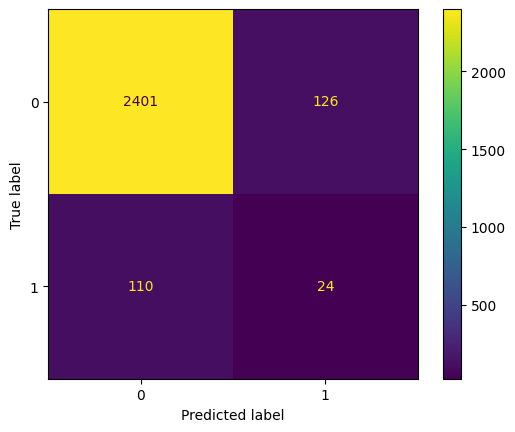

In [ ]:
#Confusion matrix for |SMOTE  Decision Tree year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predDTOver1, labels=classifierDTSmote1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote1.classes_)
disp.plot()
plt.show()


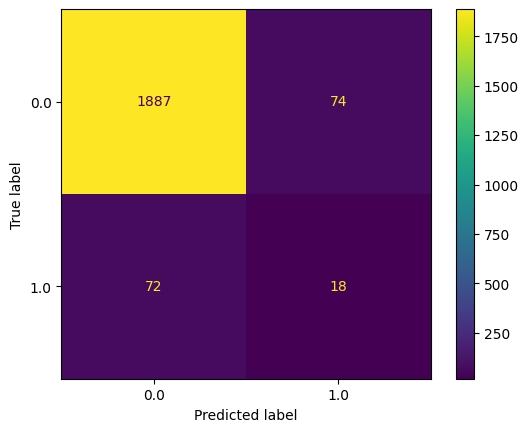

In [ ]:
#Confusion matrix for SMOTE Decision Tree year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predDTOver2, labels=classifierDTSmote2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote2.classes_)
disp.plot()
plt.show()

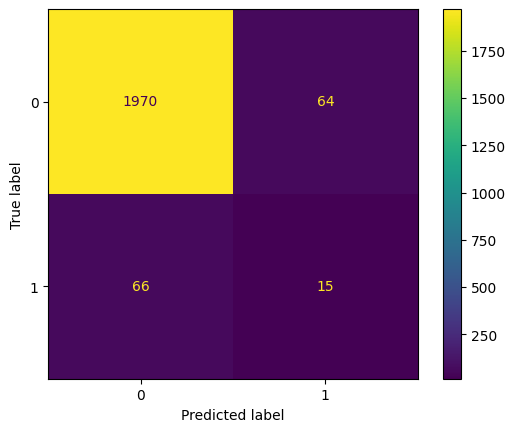

In [ ]:
#Confusion matrix for SMOTE Decision Tree year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predDTOver3, labels=classifierDTSmote3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote3.classes_)
disp.plot()
plt.show()

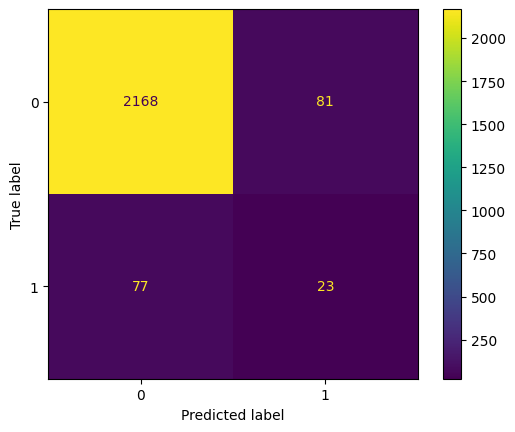

In [ ]:
#Confusion matrix for SMOTE Decision Tree year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predDTOver4, labels=classifierDTSmote4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote4.classes_)
disp.plot()
plt.show()

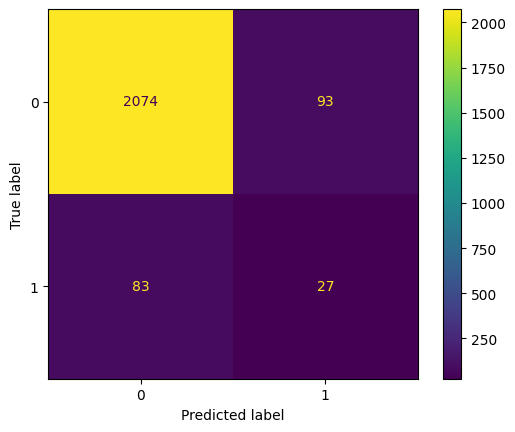

In [ ]:
#Confusion matrix for SMOTE Decision Tree year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predDTOver5, labels=classifierDTSmote5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote5.classes_)
disp.plot()
plt.show()

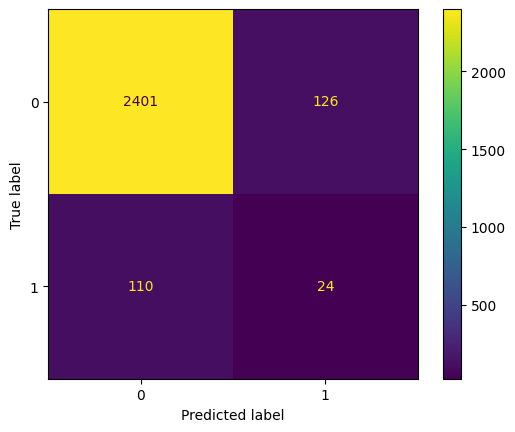

In [ ]:
#Confusion matrix for under Decision Tree year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predDTUnder1, labels=classifierDTUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder1.classes_)
disp.plot()
plt.show()

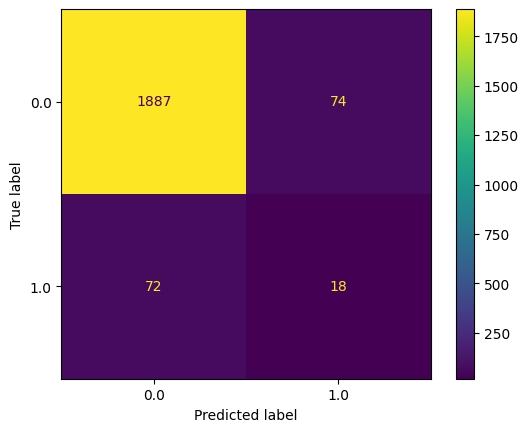

In [ ]:
#Confusion matrix for under Decision Tree year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predDTUnder2, labels=classifierDTUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder2.classes_)
disp.plot()
plt.show()

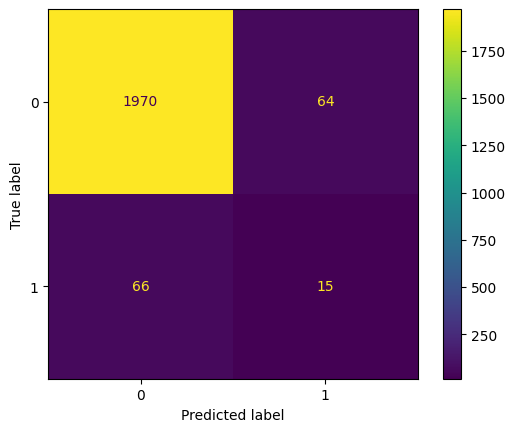

In [ ]:
#Confusion matrix for under Decision Tree year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predDTUnder3, labels=classifierDTUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder3.classes_)
disp.plot()
plt.show()

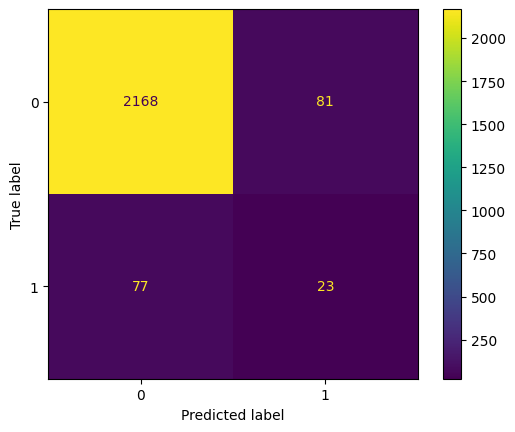

In [ ]:
#Confusion matrix for under Decision Tree year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predDTUnder4, labels=classifierDTUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder4.classes_)
disp.plot()
plt.show()

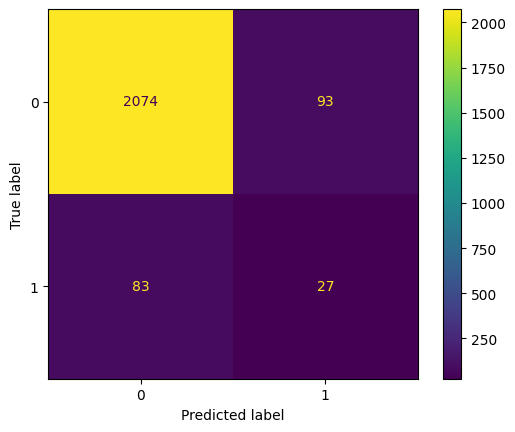

In [ ]:
#Confusion matrix for under Decision Tree year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predDTUnder5, labels=classifierDTUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder5.classes_)
disp.plot()
plt.show()

###Losistic Regression


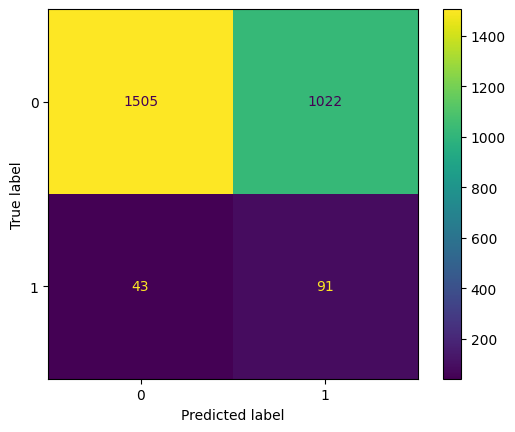

In [ ]:
#Confusion matrix for SMOTE 1 Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predLROver1, labels=classifierLRSMOTE1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE1.classes_)
disp.plot()
plt.show()

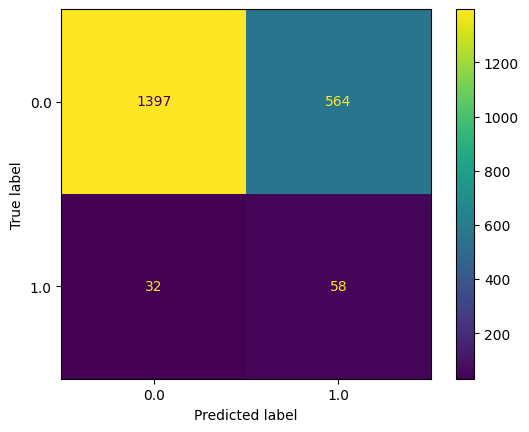

In [ ]:
#Confusion matrix for SMOTE Logistic Regression year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predLROver2, labels=classifierLRSMOTE2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE2.classes_)
disp.plot()
plt.show()

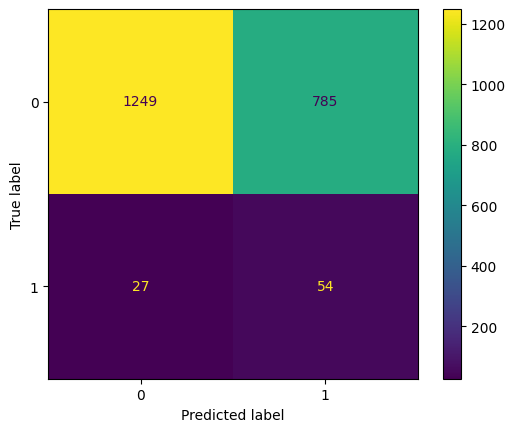

In [ ]:
#Confusion matrix for SMOTE  Logistic Regression  year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predLROver3, labels=classifierLRSMOTE3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE3.classes_)
disp.plot()
plt.show()

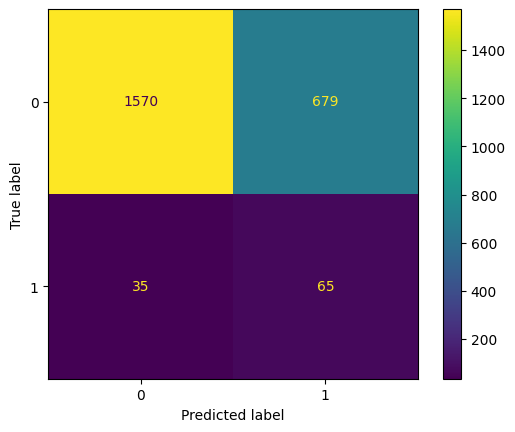

In [ ]:
#Confusion matrix for SMOTE  Logistic Regression  year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predLROver4, labels=classifierLRSMOTE4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE4.classes_)
disp.plot()
plt.show()

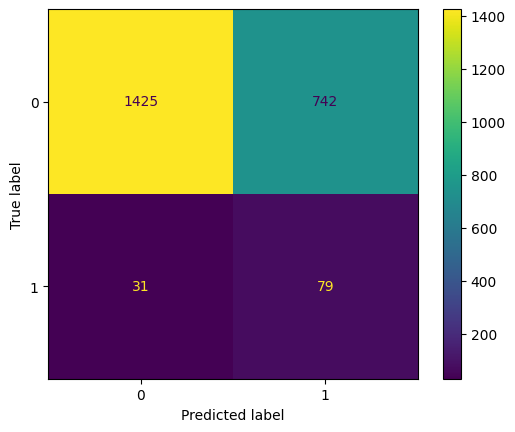

In [ ]:
#Confusion matrix for SMOTE  Logistic Regression  year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predLROver5, labels=classifierLRSMOTE5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE5.classes_)
disp.plot()
plt.show()

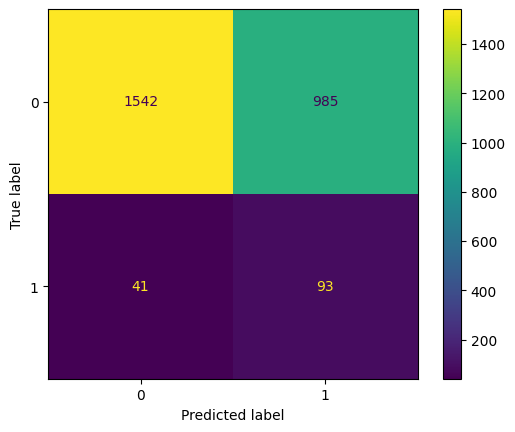

In [ ]:
#Confusion matrix for Under  Logistic Regression  year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predLRUnder1, labels=classifierLRUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder1.classes_)
disp.plot()
plt.show()

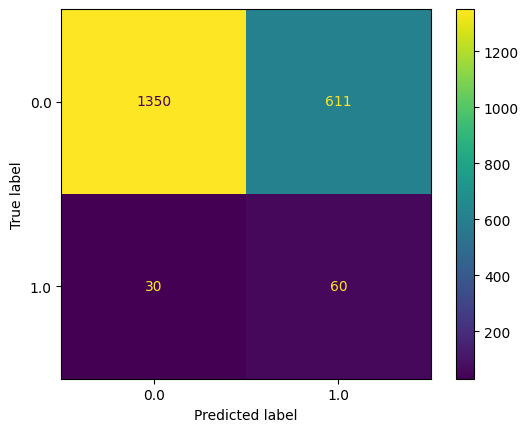

In [ ]:
#Confusion matrix for Under  Logistic Regression  year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predLRUnder2, labels=classifierLRUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder2.classes_)
disp.plot()
plt.show()

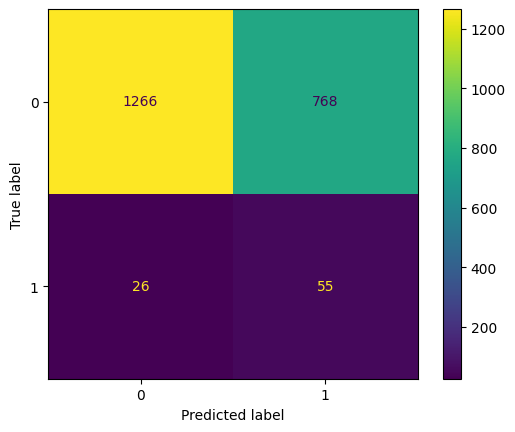

In [ ]:
#Confusion matrix for Under  Logistic Regression  year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predLRUnder3, labels=classifierLRUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder3.classes_)
disp.plot()
plt.show()

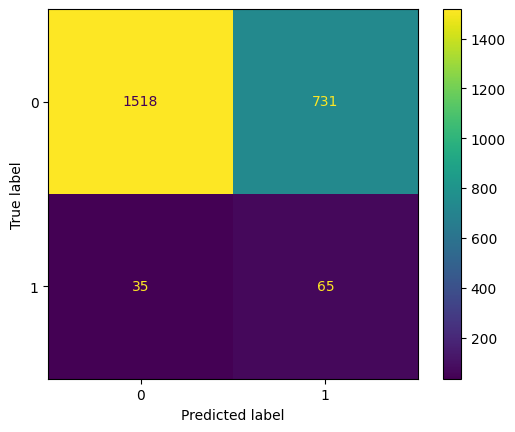

In [ ]:
#Confusion matrix for Under  Logistic Regression  year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predLRUnder4, labels=classifierLRUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder4.classes_)
disp.plot()
plt.show()

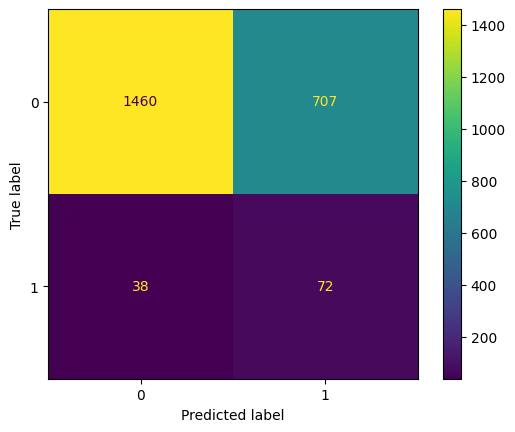

In [ ]:
#Confusion matrix for Under  Logistic Regression  year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predLRUnder5, labels=classifierLRUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder5.classes_)
disp.plot()
plt.show()

###Random Forest

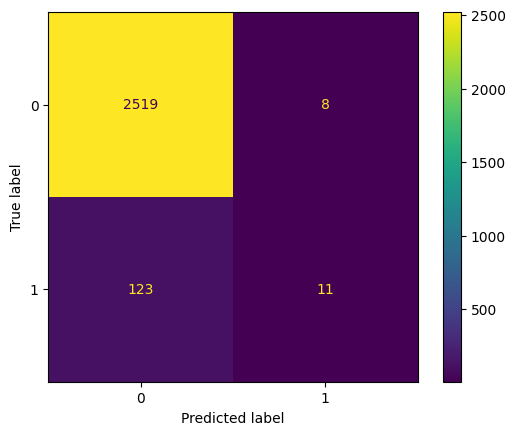

In [ ]:
#Confusion matrix for Random Forest SMOTE Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predRFOver1, labels=classifierRFOver1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver1.classes_)
disp.plot()
plt.show()

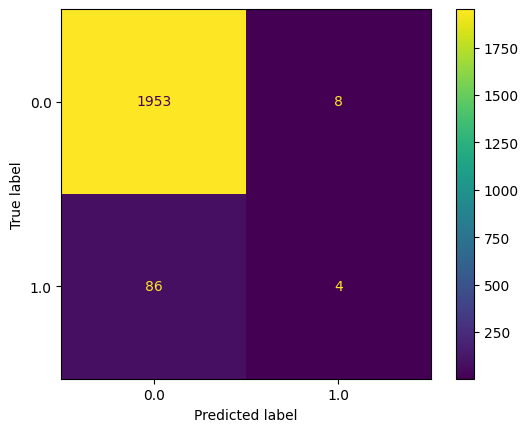

In [ ]:
#Confusion matrix for Random Forest SMOTE Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predRFOver2, labels=classifierRFOver2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver2.classes_)
disp.plot()
plt.show()

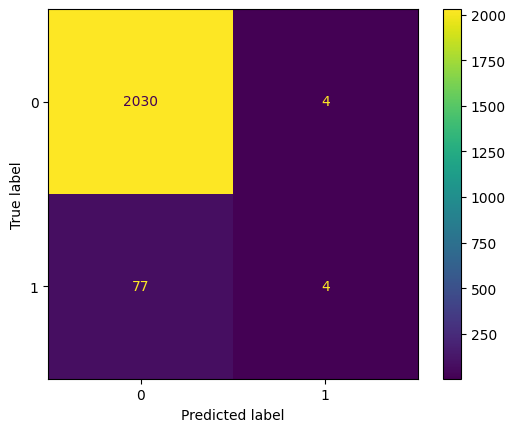

In [ ]:
#Confusion matrix for Random Forest SMOTE Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predRFOver3, labels=classifierRFOver3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver3.classes_)
disp.plot()
plt.show()

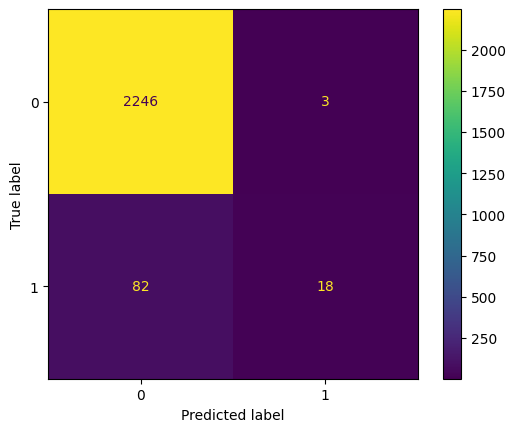

In [ ]:
#Confusion matrix for Random Forest SMOTE Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predRFOver4, labels=classifierRFOver4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver4.classes_)
disp.plot()
plt.show()

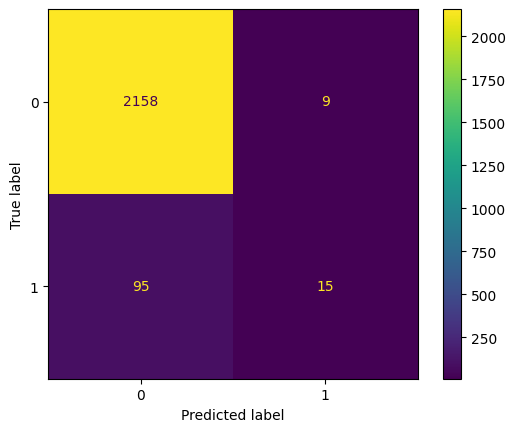

In [ ]:
#Confusion matrix for Random Forest SMOTE Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predRFOver5, labels=classifierRFOver5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver5.classes_)
disp.plot()
plt.show()

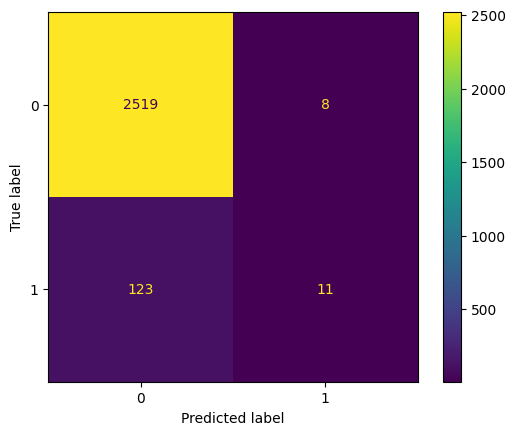

In [ ]:
#Confusion matrix for Random Forest Under Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predRFUnder1, labels=classifierRFUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder1.classes_)
disp.plot()
plt.show()

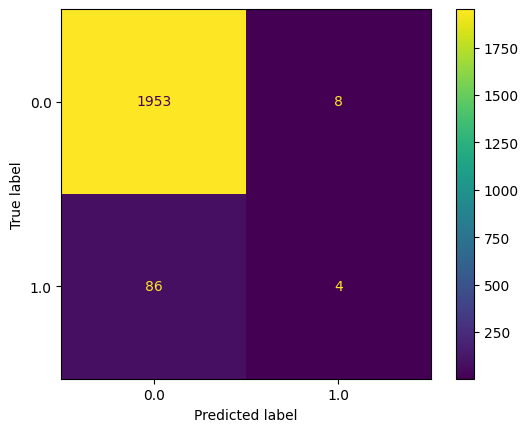

In [ ]:
#Confusion matrix for Random Forest Under Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predRFUnder2, labels=classifierRFUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder2.classes_)
disp.plot()
plt.show()

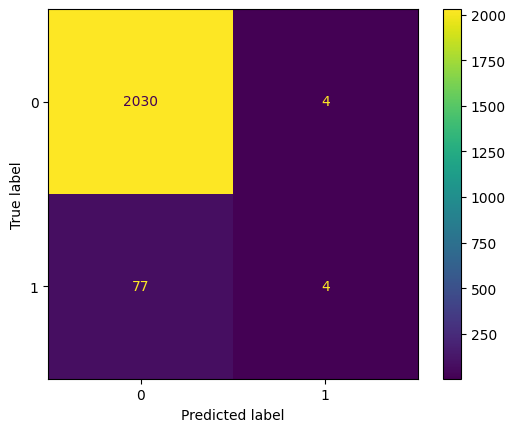

In [ ]:
#Confusion matrix for Random Forest Under Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predRFUnder3, labels=classifierRFUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder3.classes_)
disp.plot()
plt.show()

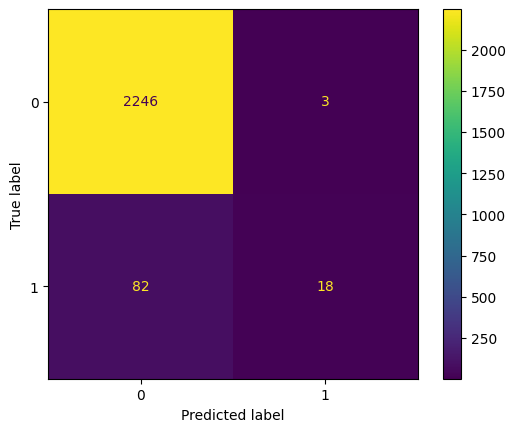

In [ ]:
#Confusion matrix for Random Forest Under Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predRFUnder4, labels=classifierRFUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder4.classes_)
disp.plot()
plt.show()

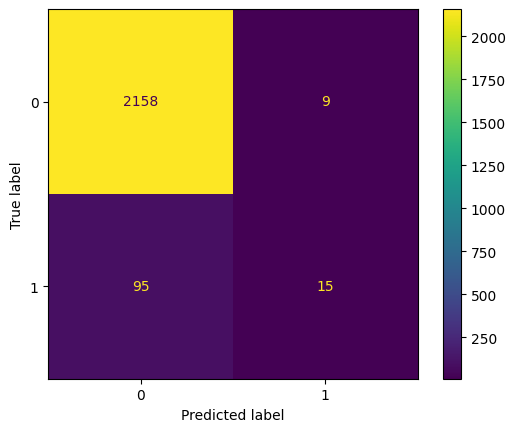

In [ ]:
#Confusion matrix for Random Forest Under Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predRFUnder5, labels=classifierRFUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder5.classes_)
disp.plot()
plt.show()

###AdaBoost

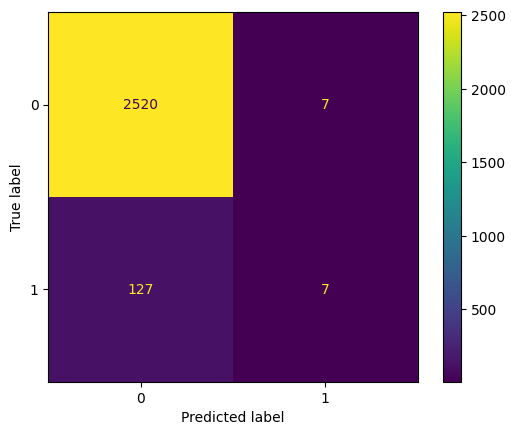

In [ ]:
#Confusion matrix for AdaBoost SMOTE Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predABOver1, labels=classifierABOver1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver1.classes_)
disp.plot()
plt.show()

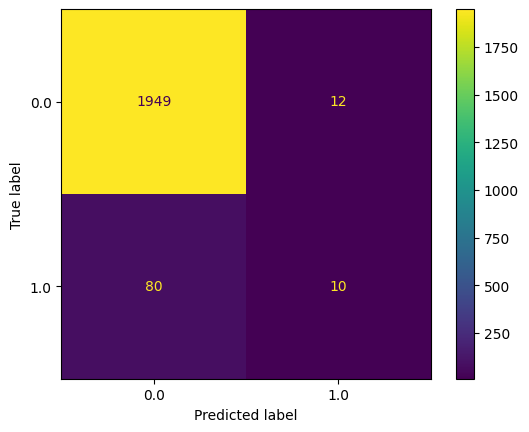

In [ ]:
#Confusion matrix for AdaBoost SMOTE Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predABOver2, labels=classifierABOver2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver2.classes_)
disp.plot()
plt.show()

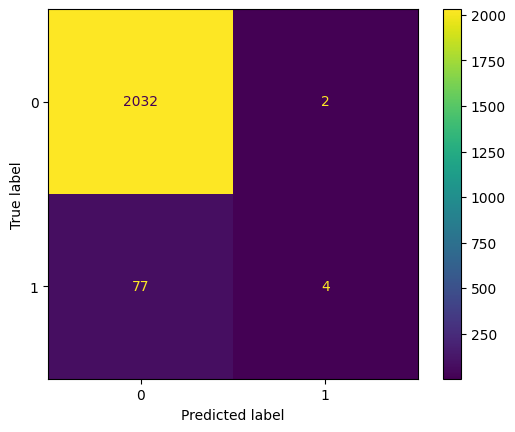

In [ ]:
#Confusion matrix for AdaBoost SMOTE Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predABOver3, labels=classifierABOver3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver3.classes_)
disp.plot()
plt.show()

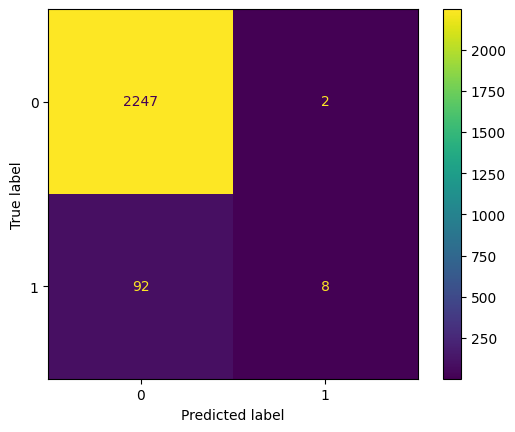

In [ ]:
#Confusion matrix for AdaBoost SMOTE Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predABOver4, labels=classifierABOver4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver4.classes_)
disp.plot()
plt.show()

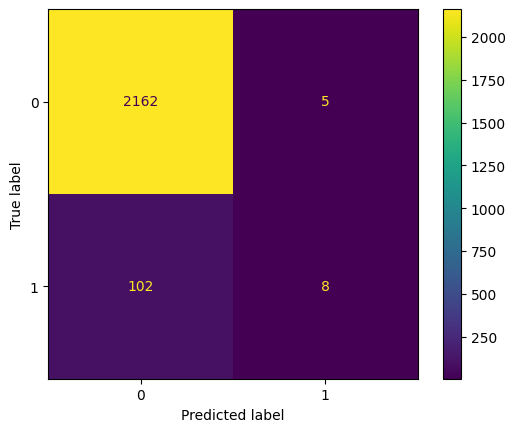

In [ ]:
#Confusion matrix for AdaBoost SMOTE Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predABOver5, labels=classifierABOver5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver5.classes_)
disp.plot()
plt.show()

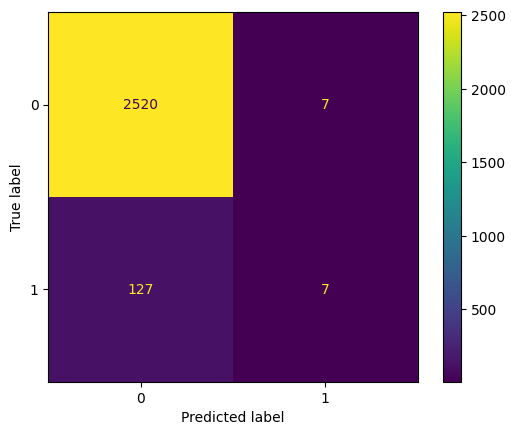

In [ ]:
#Confusion matrix for AdaBoost Under Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predABUnder1, labels=classifierABUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder1.classes_)
disp.plot()
plt.show()

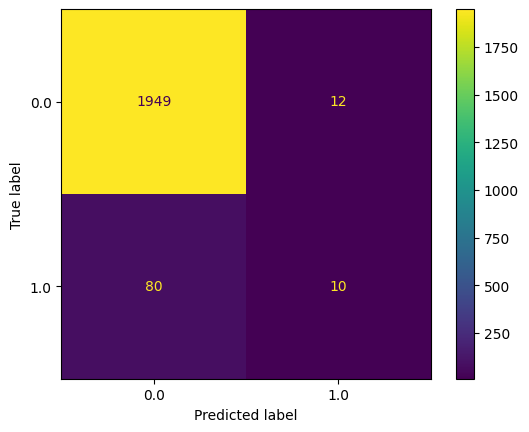

In [ ]:
#Confusion matrix for AdaBoost Under Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predABUnder2, labels=classifierABUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder2.classes_)
disp.plot()
plt.show()

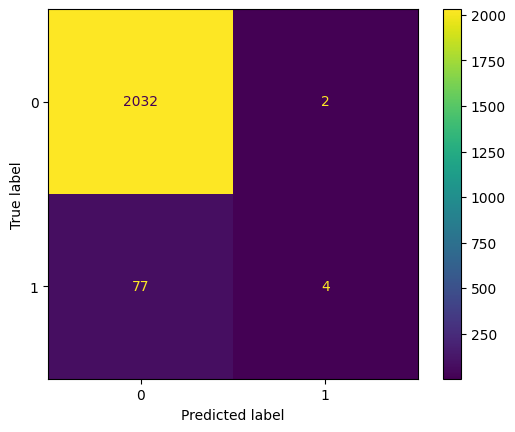

In [ ]:
#Confusion matrix for AdaBoost Under Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predABUnder3, labels=classifierABUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder3.classes_)
disp.plot()
plt.show()

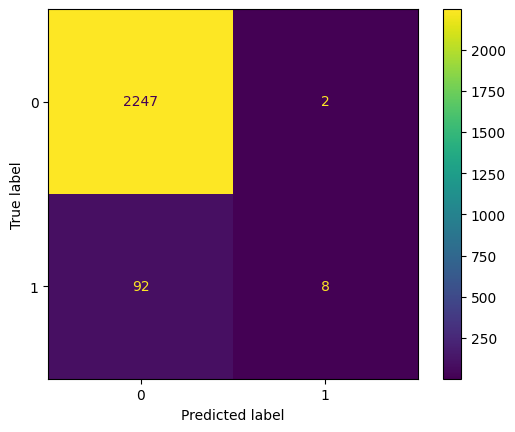

In [ ]:
#Confusion matrix for AdaBoost Under Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predABUnder4, labels=classifierABUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder4.classes_)
disp.plot()
plt.show()

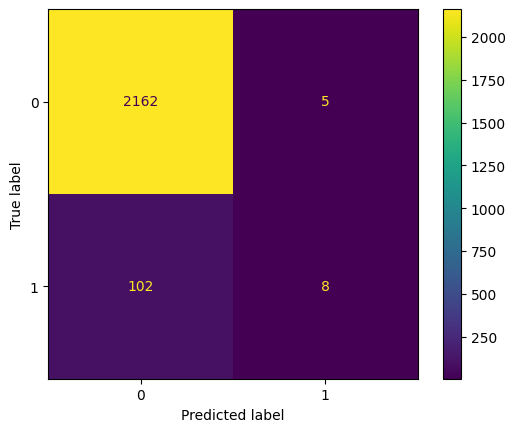

In [ ]:
#Confusion matrix for AdaBoost Under Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predABUnder5, labels=classifierABUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder5.classes_)
disp.plot()
plt.show()